<a href="https://colab.research.google.com/github/Redwolf0023/AutoMLvsBayesian/blob/main/Job_Classification_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# download and install the dependencies
!sudo apt-get install swig -y
!pip install Cython numpy
!pip install scikit-learn
!apt-get install default-jre
!java -version
!pip install h2o

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 16 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 1s (1,587 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline


In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# import input file as a dataset
df = pd.read_csv('jobclassinfo2.csv')

In [ ]:
df.head()

ID  JobFamily    JobFamilyDescription  JobClass JobClassDescription  \
0   1          1  Accounting And Finance         1        Accountant I   
1   2          1  Accounting And Finance         2       Accountant II   
2   3          1  Accounting And Finance         3      Accountant III   
3   4          1  Accounting And Finance         4       Accountant IV   
4   5          2  Administrative Support         5     Admin Support I   

   PayGrade  EducationLevel  Experience  OrgImpact  ProblemSolving  \
0         5               3           1          3               3   
1         6               4           1          5               4   
2         8               4           2          6               5   
3        10               5           5          6               6   
4         1               1           0          1               1   

   Supervision  ContactLevel  FinancialBudget    PG  
0            4             3                5  PG05  
1            5             7                7  PG06  
2            6             7               10  PG08  
3            7             8               11  PG10  
4            1             1                1  PG01

In [ ]:
from sklearn.preprocessing import LabelEncoder
# List of columns to be label encoded
columns_to_encode = ['JobFamilyDescription', 'JobClassDescription', 'PG']

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Create a new DataFrame to store the encoded values
encoded_df = df.copy()

# Apply LabelEncoder to each column and replace the original values
for col in columns_to_encode:
    encoded_df[col] = encoder.fit_transform(df[col])

In [ ]:
encoded_df.head()

ID  JobFamily  JobFamilyDescription  JobClass  JobClassDescription  \
0   1          1                     0         1                    0   
1   2          1                     0         2                    1   
2   3          1                     0         3                    2   
3   4          1                     0         4                    3   
4   5          2                     1         5                    4   

   PayGrade  EducationLevel  Experience  OrgImpact  ProblemSolving  \
0         5               3           1          3               3   
1         6               4           1          5               4   
2         8               4           2          6               5   
3        10               5           5          6               6   
4         1               1           0          1               1   

   Supervision  ContactLevel  FinancialBudget  PG  
0            4             3                5   4  
1            5             7                7   5  
2            6             7               10   7  
3            7             8               11   9  
4            1             1                1   0

In [ ]:
encoded_df.drop(['JobFamilyDescription','JobClassDescription','ID'],axis=1, inplace=True)


In [ ]:
encoded_df.head()

JobFamily  JobClass  PayGrade  EducationLevel  Experience  OrgImpact  \
0          1         1         5               3           1          3   
1          1         2         6               4           1          5   
2          1         3         8               4           2          6   
3          1         4        10               5           5          6   
4          2         5         1               1           0          1   

   ProblemSolving  Supervision  ContactLevel  FinancialBudget  PG  
0               3            4             3                5   4  
1               4            5             7                7   5  
2               5            6             7               10   7  
3               6            7             8               11   9  
4               1            1             1                1   0

In [ ]:
# initaialise the cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20" 2023-07-18; OpenJDK Runtime Environment (build 11.0.20+8-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20+8-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmplmyt915f
  JVM stdout: /tmp/tmplmyt915f/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmplmyt915f/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    3 days
H2O_cluster_name:           H2O_from_python_unknownUser_cspcgu
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
# parse the dataset
data = h2o.H2OFrame(encoded_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
target_col = data.columns[-1]
feature_col = data.columns[:-1]
data[target_col] = data[target_col].asfactor()

In [ ]:
train, test, validation = data.split_frame(ratios=[0.8, 0.15], seed = 12)

In [ ]:
# train the model
model = H2OAutoML(max_models=5, seed = 1234)
model.train(x = feature_col, y = target_col, training_frame=train)

AutoML progress: |█████
20:03:39.236: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 57.0.

██████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20230825_200324


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    29                 290                         33629                  1            8            3.22414       2             12            4.58276

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.18052625299005878
RMSE: 0.42488381116495694
LogLoss: 0.5316383454157297
Mean Per-Class Error: 0.20102564102564102
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    3    4    5    6    7    8    9    Error      Rate
---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---------  ------
1    1    0    0    0    0    0    0    0    0    0.5        1 / 2
0    4    1    0    0    0    0    0    0    0    0.2        1 / 5
0    0    6    0    0    0    0    0    0    0    0          0 / 6
0    0    0    3    2    0    0    0    0    0    0.4        2 / 5
0    0    0    0    12   1    0    0    0    0    0.0769231  1 / 13
0    0    0    0    0    6    0    0    0    0    0          0 / 6
0    0    0    0    0    2    1    0    0    0    0.666667   2 / 3
0    0    0    0    0    0    0    5    0    0    0          0 / 5
0    0    0    1    0    0    0    0    5    0    0.166667   1 / 6
0    0    0    0    0    0    0    0    0    6    0          0 / 6
1    5    7    4    14   9    1    5    5    6    0.140351   8 / 57

Top-10 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.859649
2    0.982456
3    0.982456
4    0.982456
5    0.982456
6    0.982456
7    0.982456
8    0.982456
9    0.982456
10   1

ModelMetricsMultinomial: drf
** Reported on cross-validation data. **

MSE: 0.21936139199868757
RMSE: 0.468360322827081
LogLoss: 0.6238126511780469
Mean Per-Class Error: 0.23333333333333334
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    3    4    5    6    7    8    9    Error     Rate
---  ---  ---  ---  ---  ---  ---  ---  ---  ---  --------  -------
1    1    0    0    0    0    0    0    0    0    0.5       1 / 2
0    3    2    0    0    0    0    0    0    0    0.4       2 / 5
0    1    5    0    0    0    0    0    0    0    0.166667  1 / 6
0    0    0    3    2    0    0    0    0    0    0.4       2 / 5
0    0    0    0    13   0    0    0    0    0    0         0 / 13
0    0    0    0    1    5    0    0    0    0    0.166667  1 / 6
0    0    0    0    0    1    2    0    0    0    0.333333  1 / 3
0    0    0    0    0    0    0    4    1    0    0.2       1 / 5
0    0    0    0    0    0    0    1    5    0    0.166667  1 / 6
0    0    0    0    0    0    0    0    0    6    0         0 / 6
1    5    7    3    16   6    2    5    6    6    0.175439  10 / 57

Top-10 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.824561
2    0.964912
3    1
4    1
5    1
6    1
7    1
8    1
9    1
10   1

Cross-Validation Metrics Summary: 
                         mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
--

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   mean_per_class_error    logloss      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  ----------------------  ---------  --------  ---------  ------------------  -------------------------  ---------------
DRF_1_AutoML_1_20230825_200324                                              0     0.400007  0.342901  0.117581                  264                   0.262529  DRF
GBM_2_AutoML_1_20230825_200324                                              0     0.14569   0.149472  0.0223419                 730                   0.51039   GBM
StackedEnsemble_AllModels_1_AutoML_1_20230825_200324                        0.1   0.380012  0.368107  0.135503                15963                   6.91161   StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20230825_200324                     0.1   0.383766  0.36664   0.134425                18450                   1.91828   StackedEnsemble
GLM_1_AutoML_1_20230825_200324                                              0.4   1.28231   0.674959  0.45557                  1161                   0.110517  GLM
XGBoost_2_AutoML_1_20230825_200324                                          0.5   1.9606    0.820766  0.673657                  464                   0.154581  XGBoost
XGBoost_1_AutoML_1_20230825_200324                                          0.5   2.30259   0.9       0.81                     1018                   0.152027  XGBoost
[7 rows x 8 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_1_AutoML_1_20230825_200324

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    3    4    5    6    7    8    9    Error    Rate
---  ---  ---  ---  ---  ---  ---  ---  ---  ---  -------  ------
0    0    0    0    0    0    0    0    0    0    nan      0 / 0
0    0    0    0    0    0    0    0    0    0    nan      0 / 0
0    0    1    0    0    0    0    0    0    0    0        0 / 1
0    0    0    1    0    0    0    0    0    0    0        0 / 1
0    0    0    0    2    0    0    0    0    0    0        0 / 2
0    0    0    0    0    1    0    0    0    0    0        0 / 1
0    0    0    0    0    0    1    0    0    0    0        0 / 1
0    0    0    0    0    0    0    1    0    0    0        0 / 1
0    0    0    0    0    0    0    0    0    0    nan      0 / 0
0    0    0    0    0    0    0    0    0    0    nan      0 / 0
0    0    1    1    2    1    1    1    0    0    0        0 / 7

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

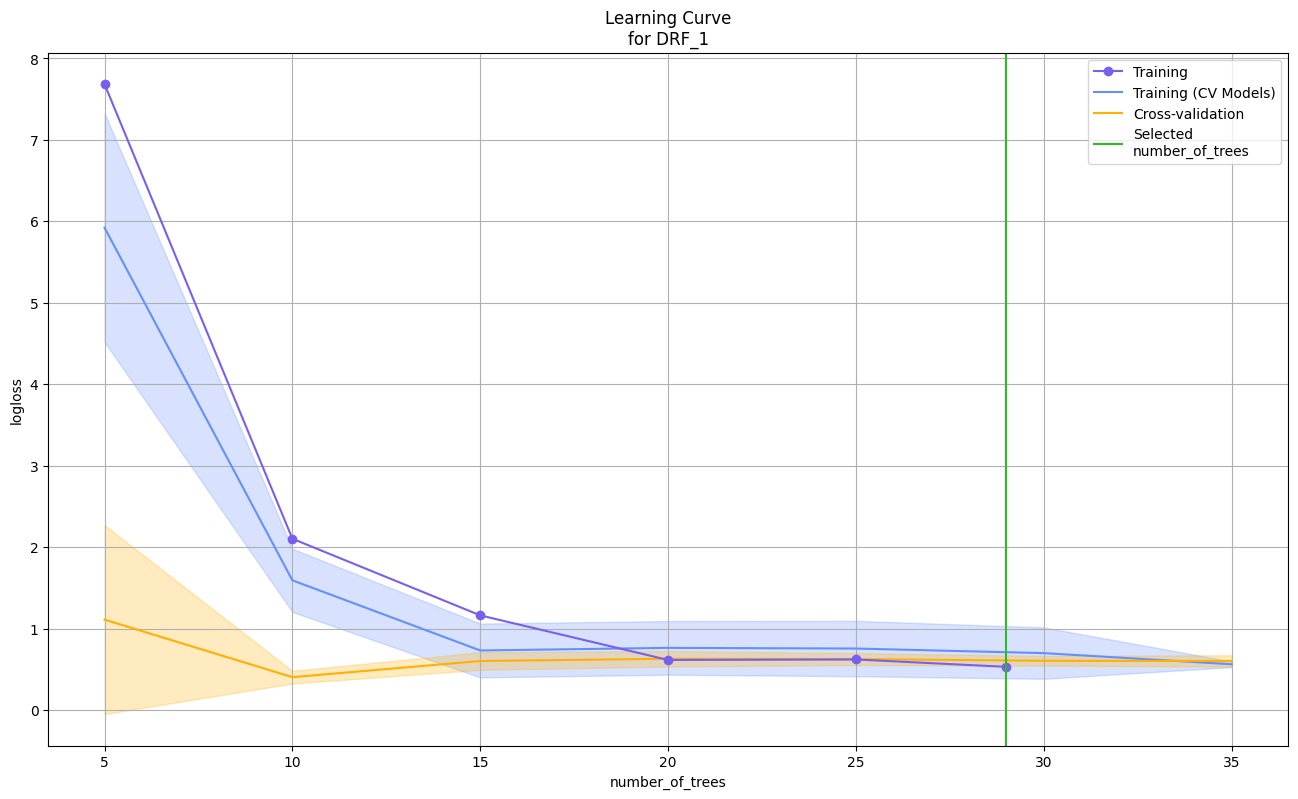

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

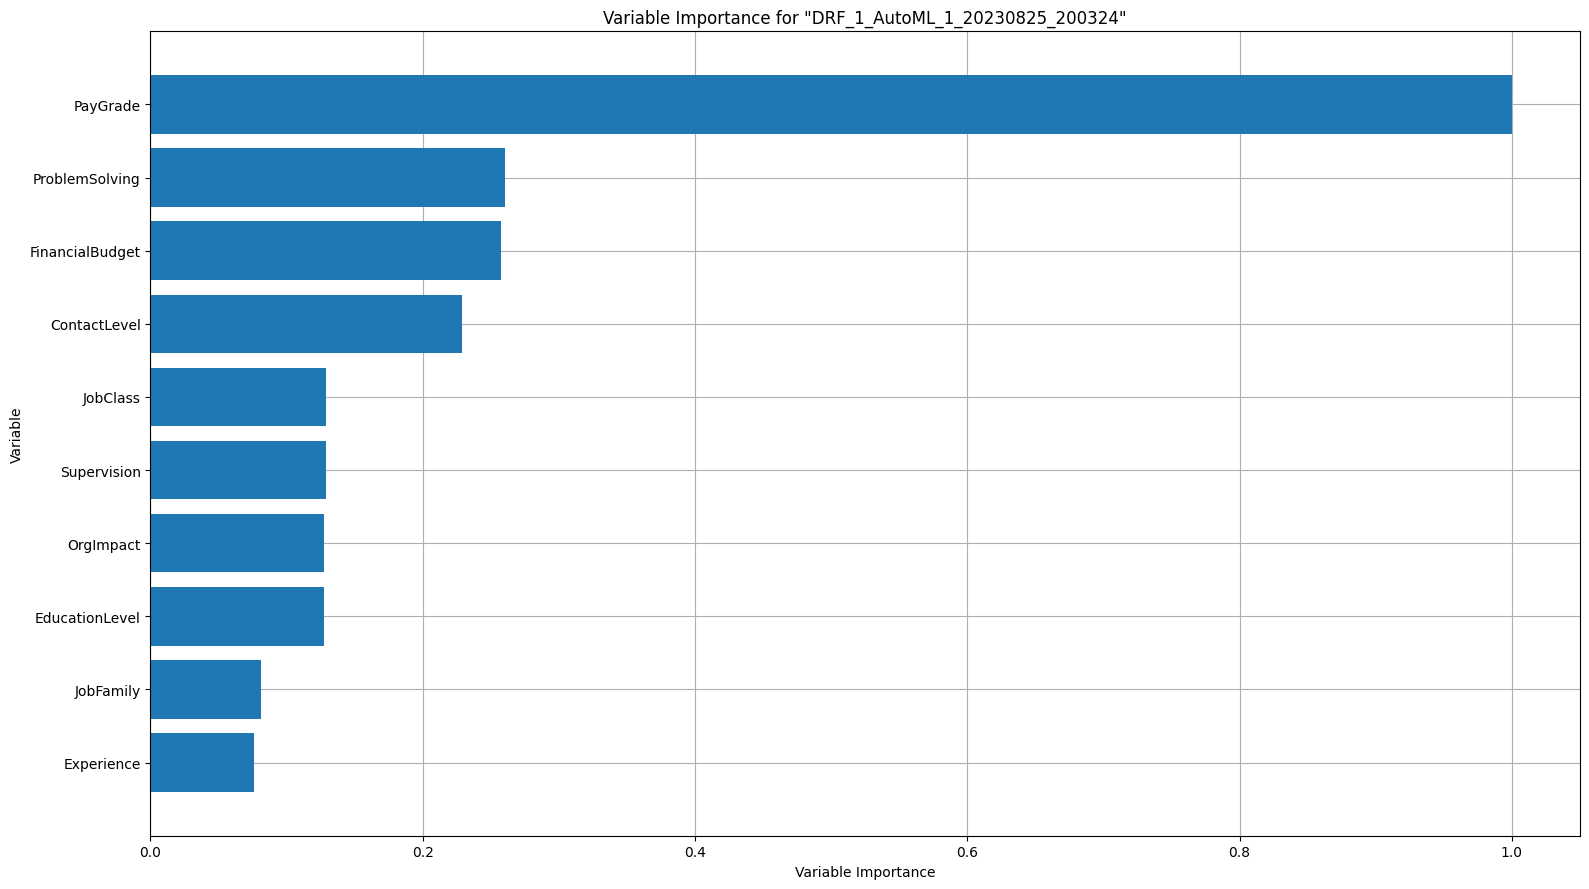

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

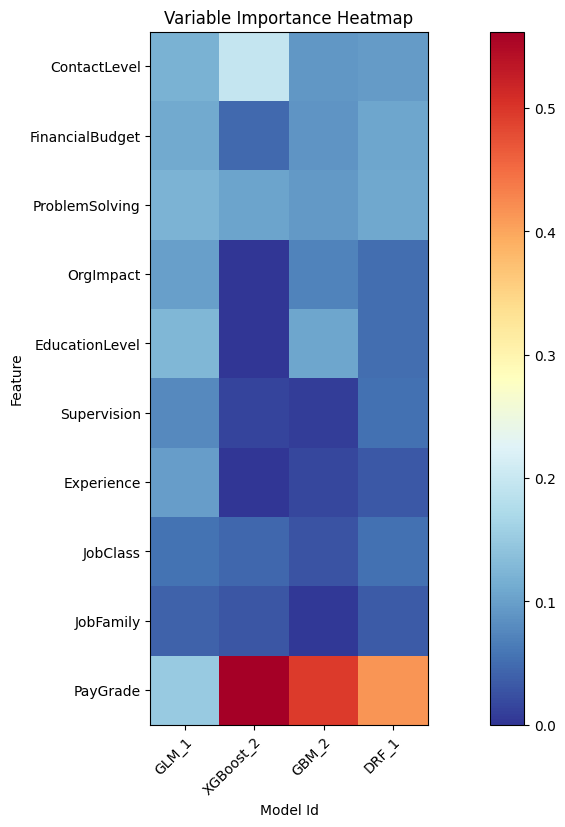

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

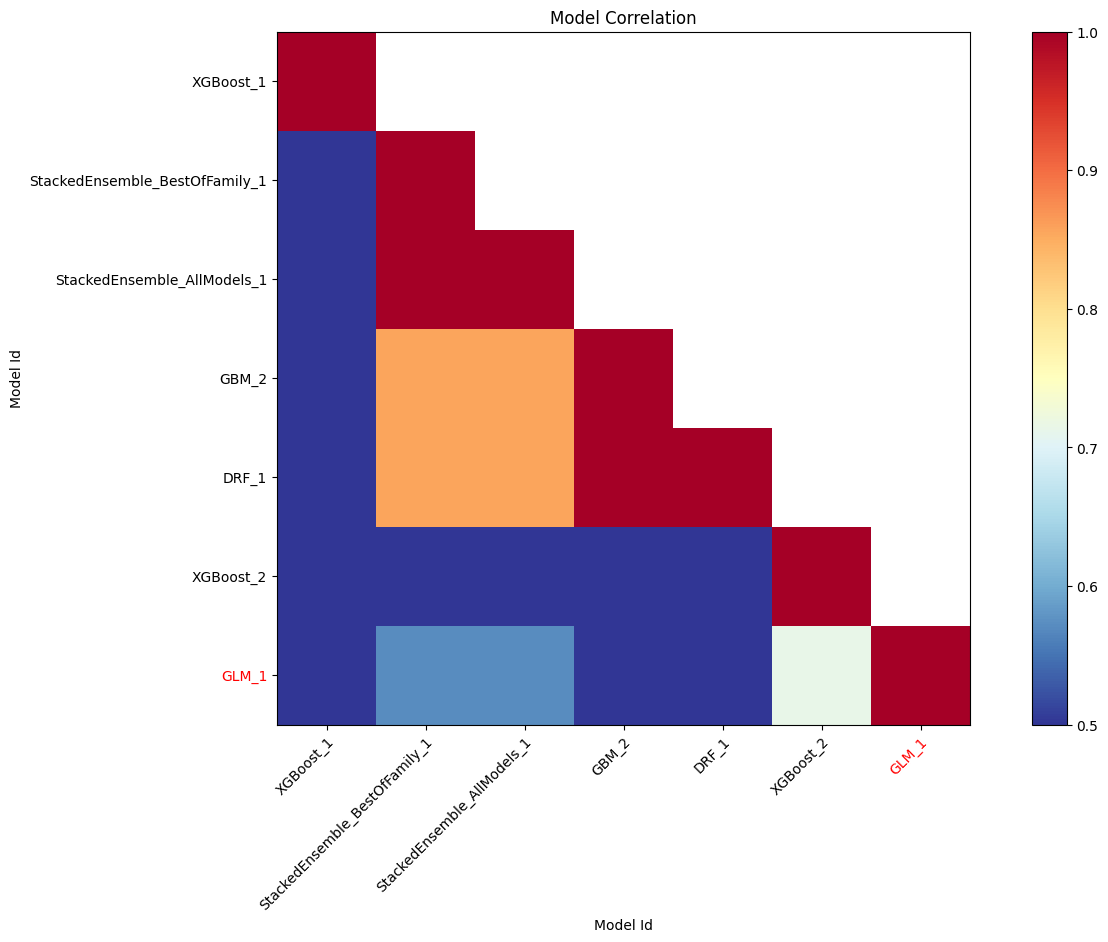

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

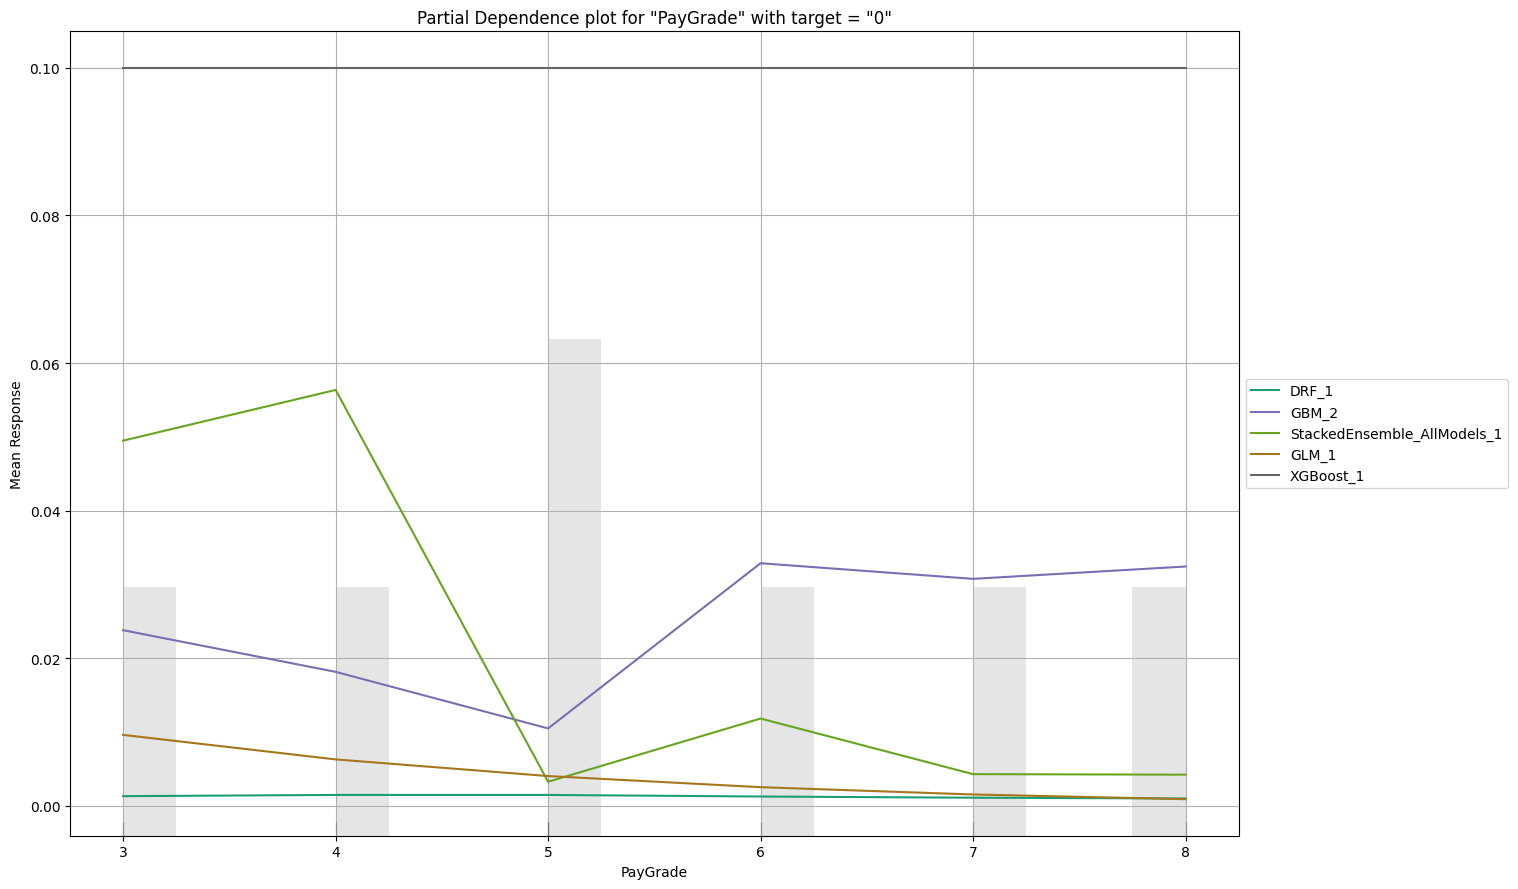

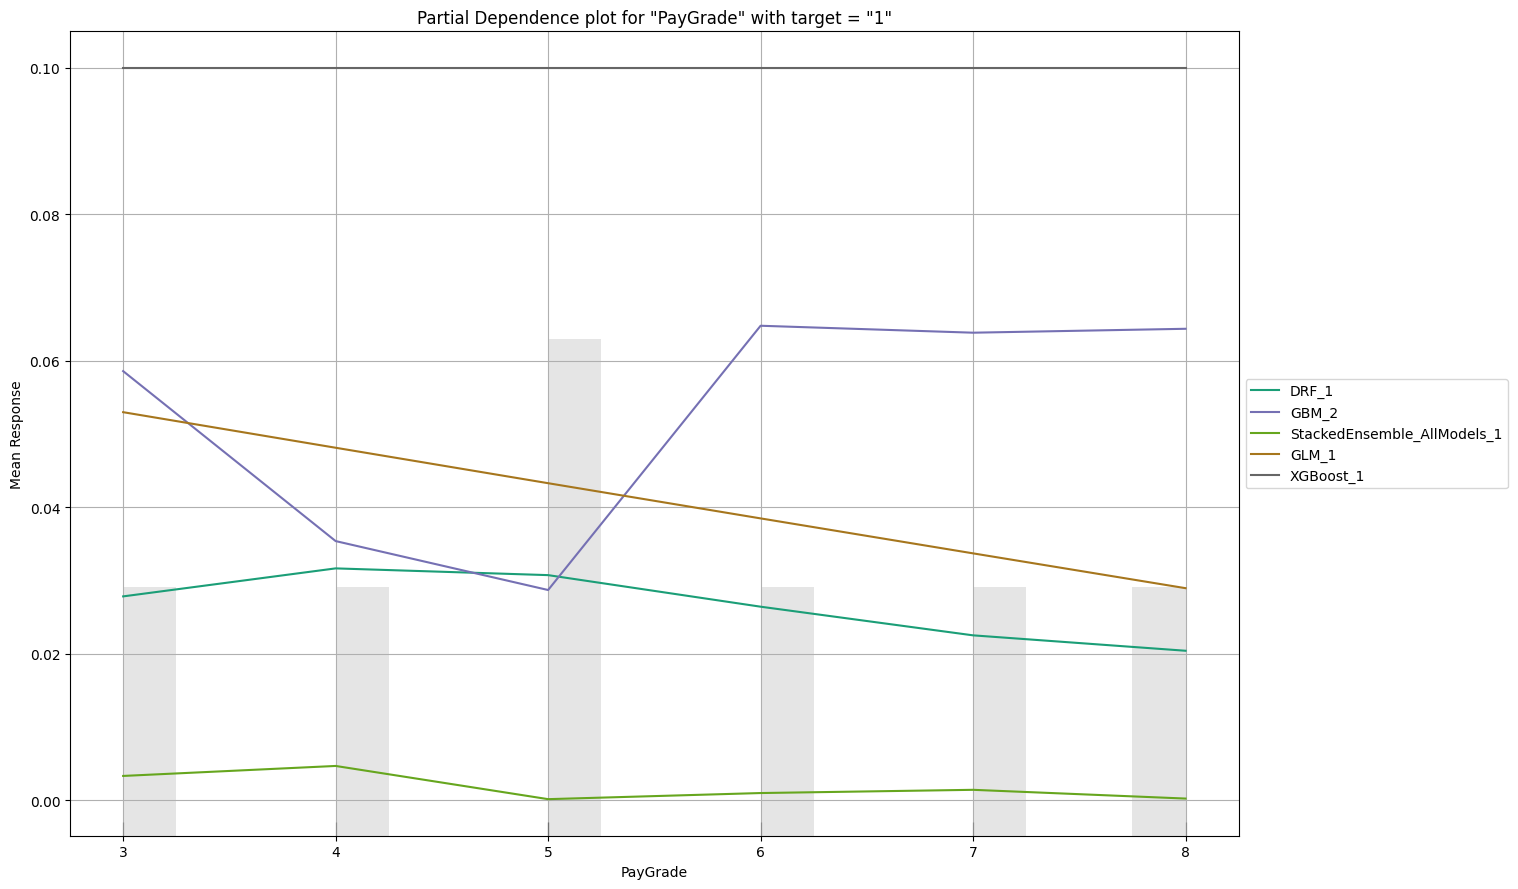

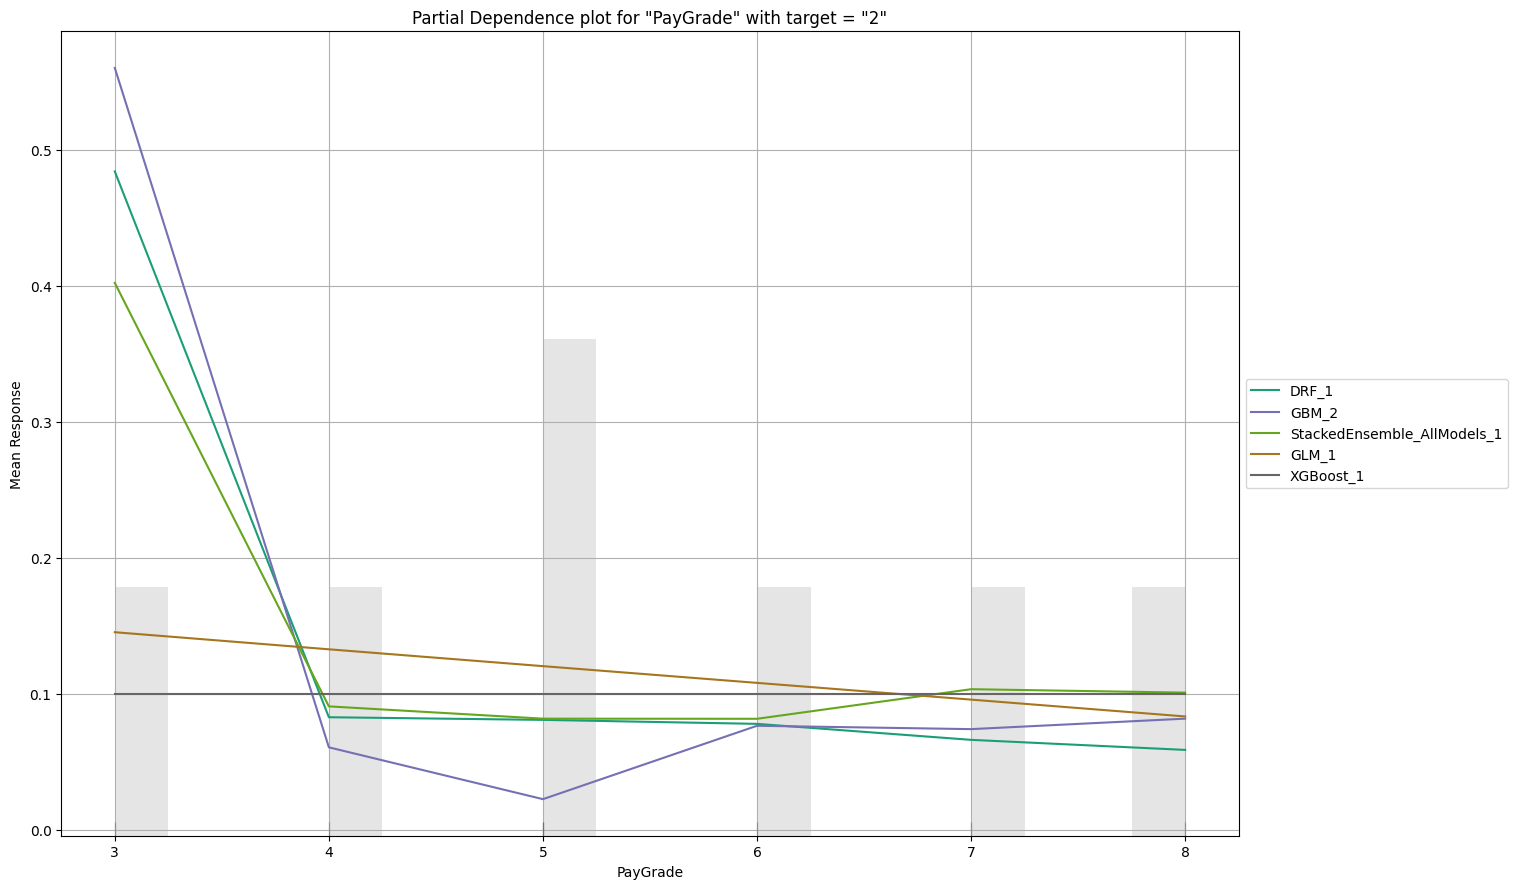

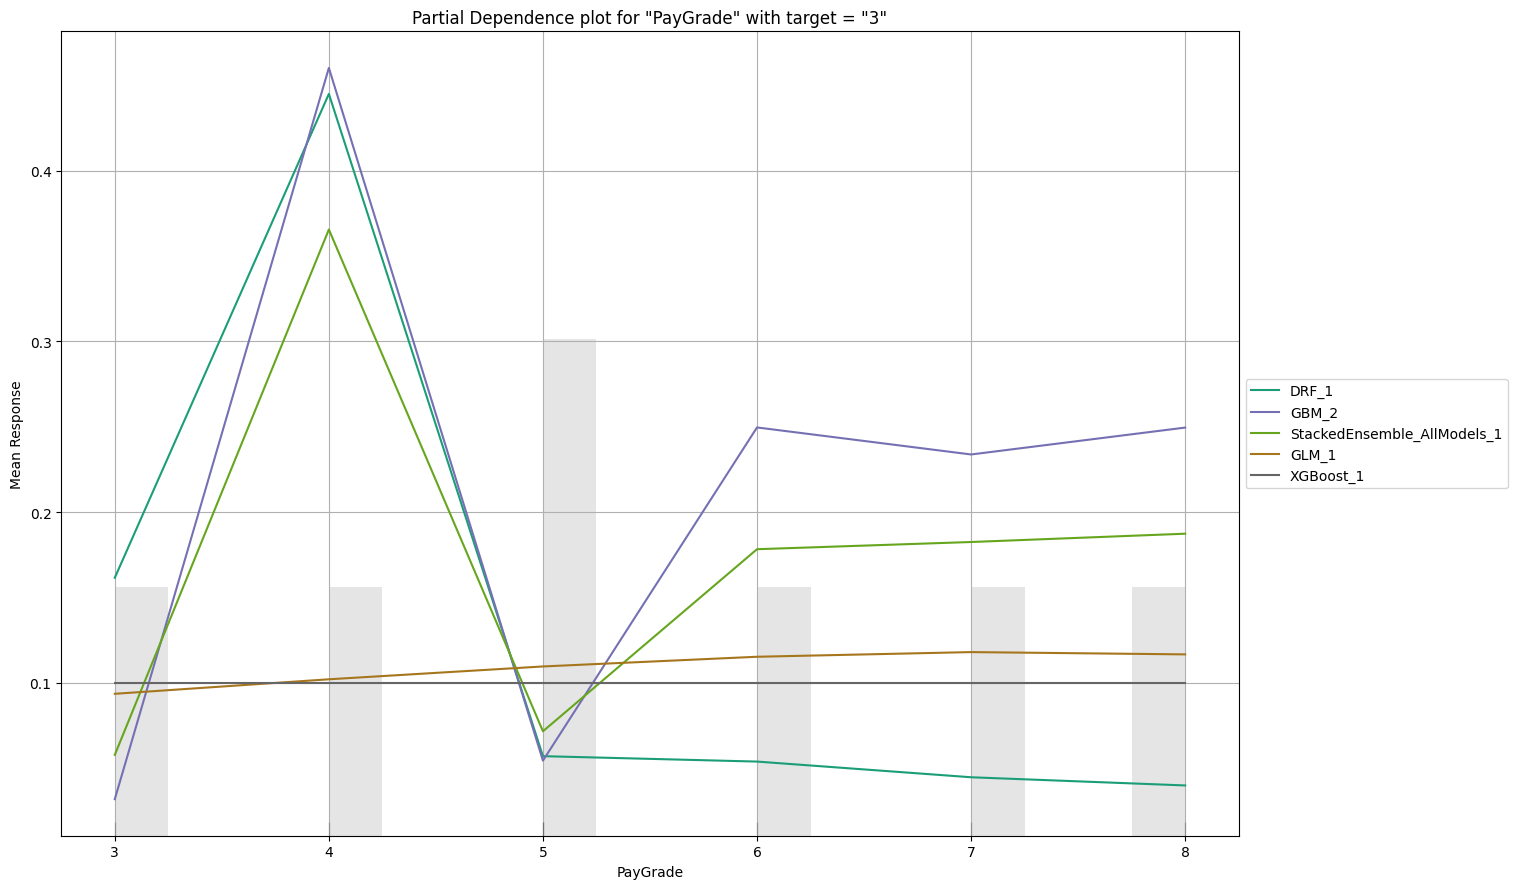

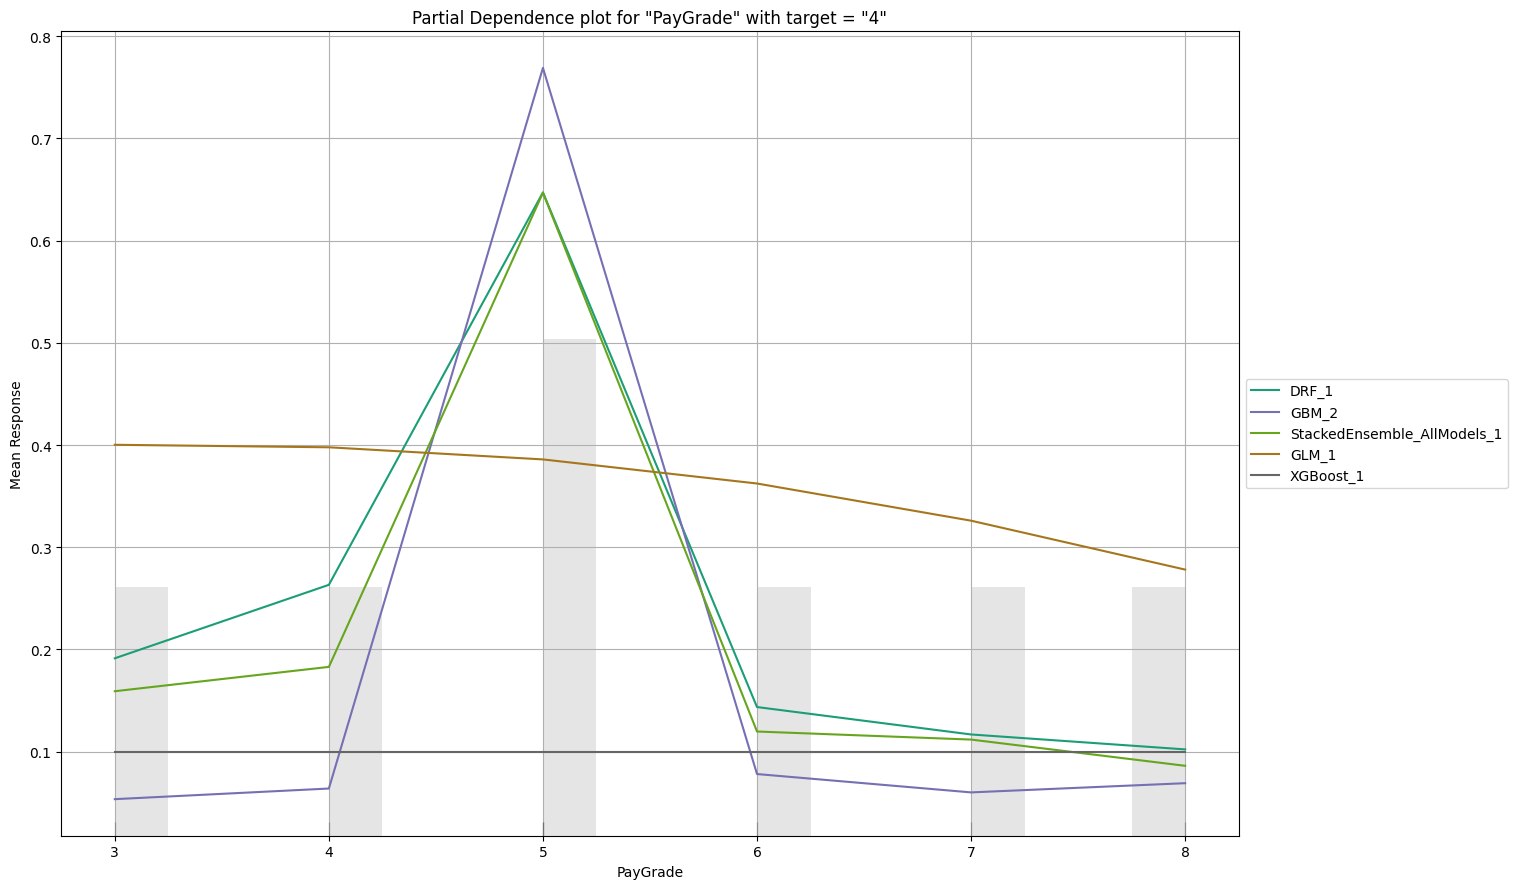

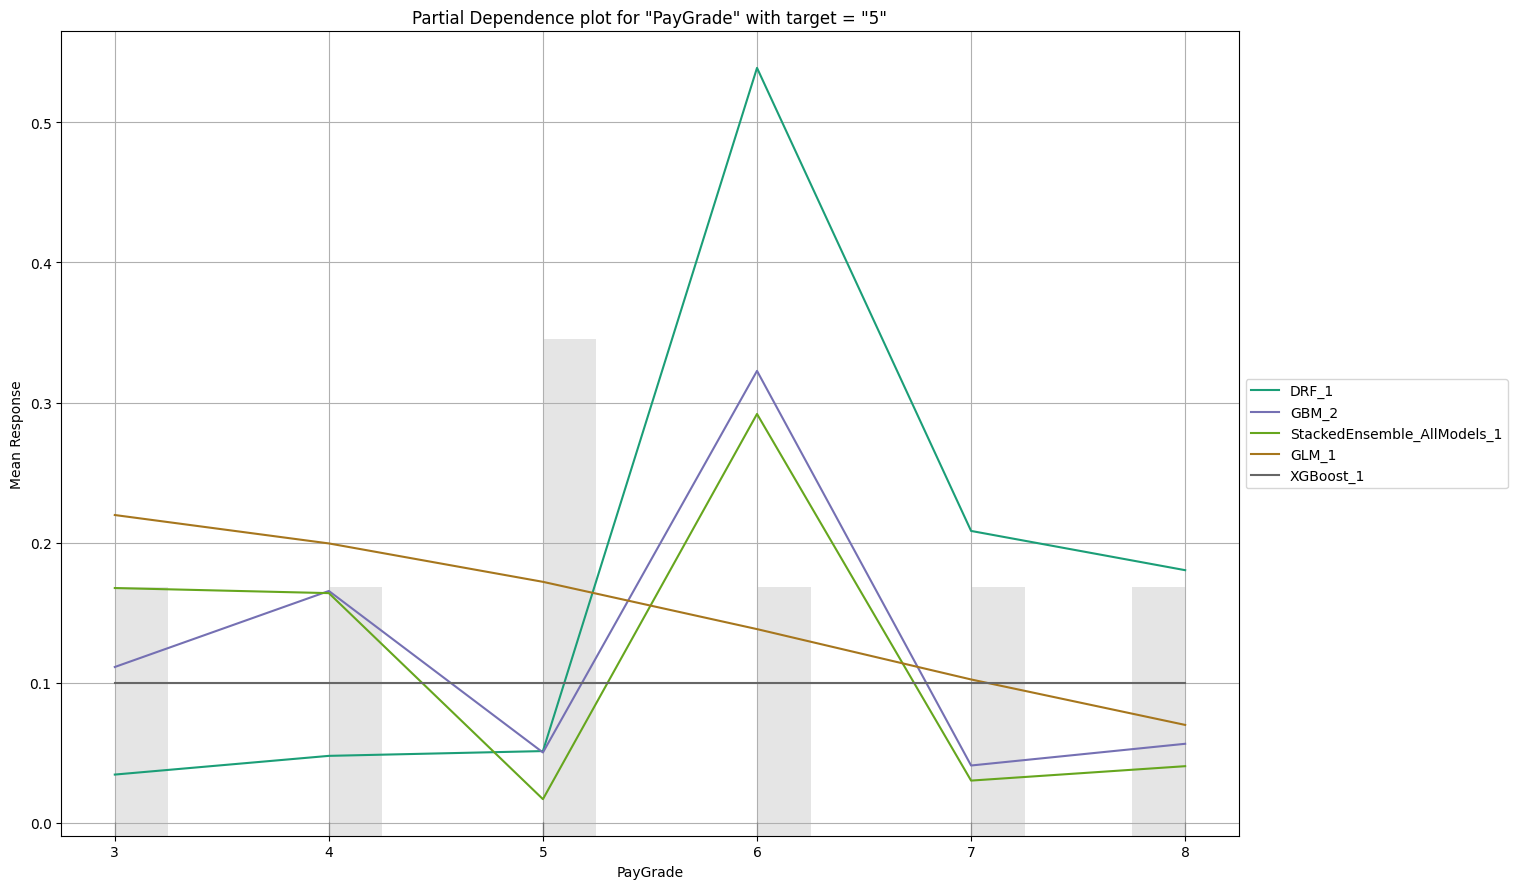

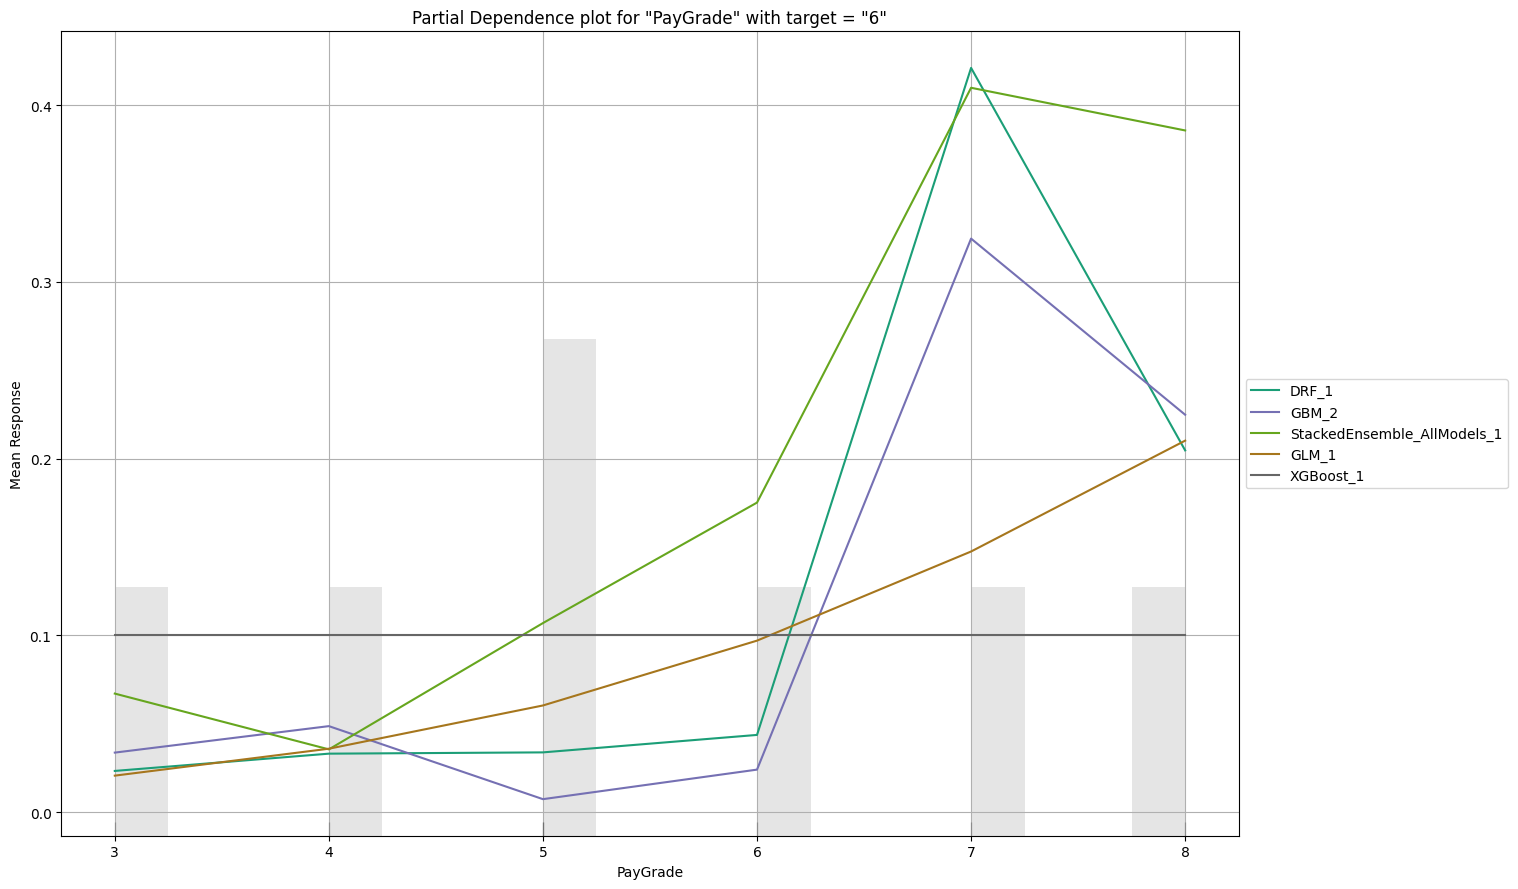

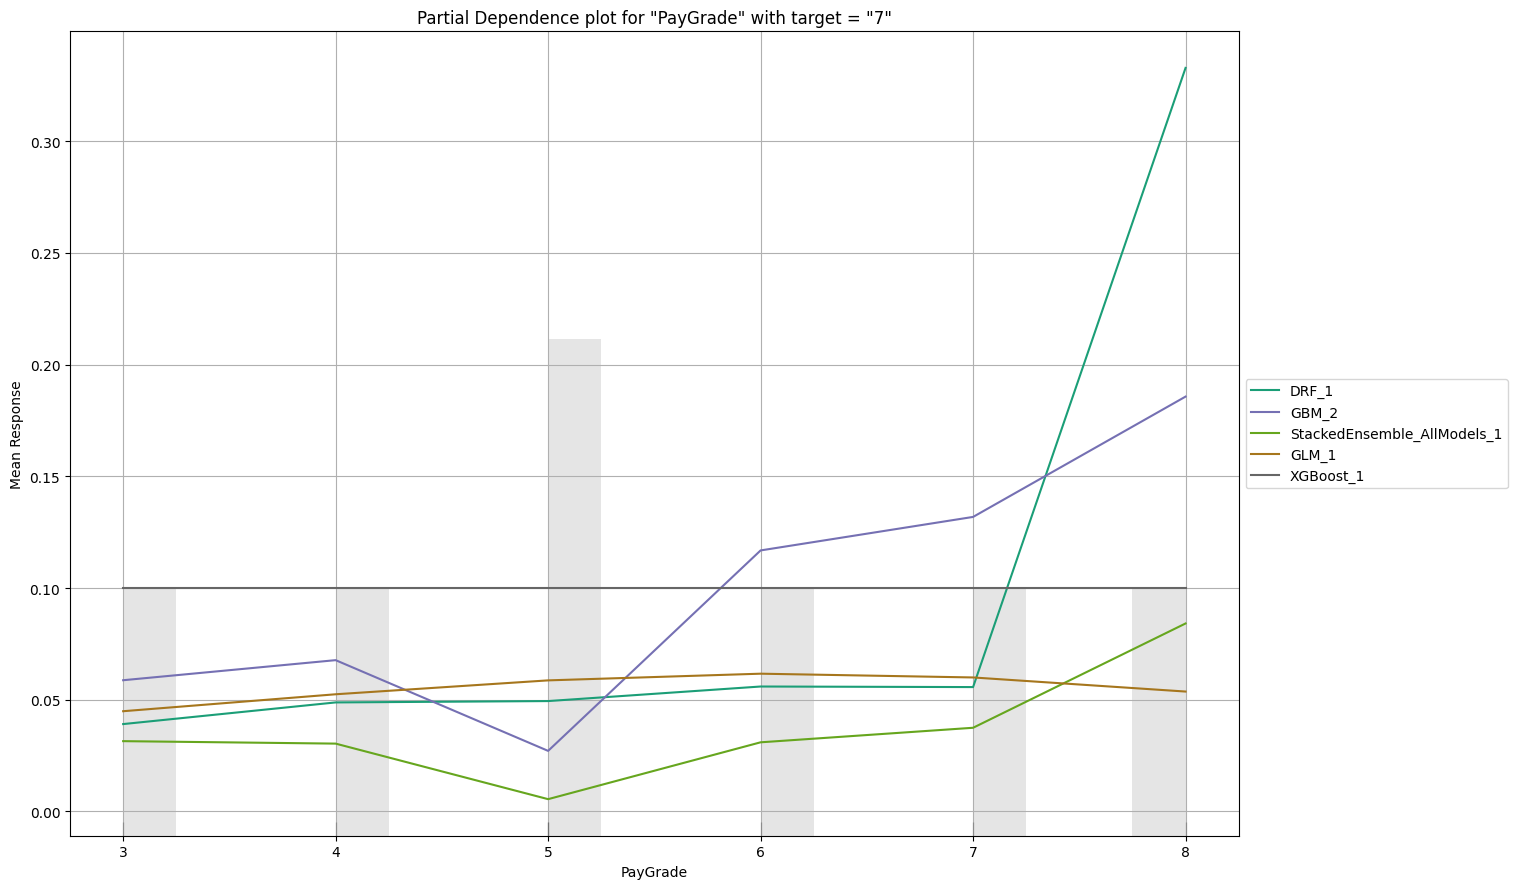

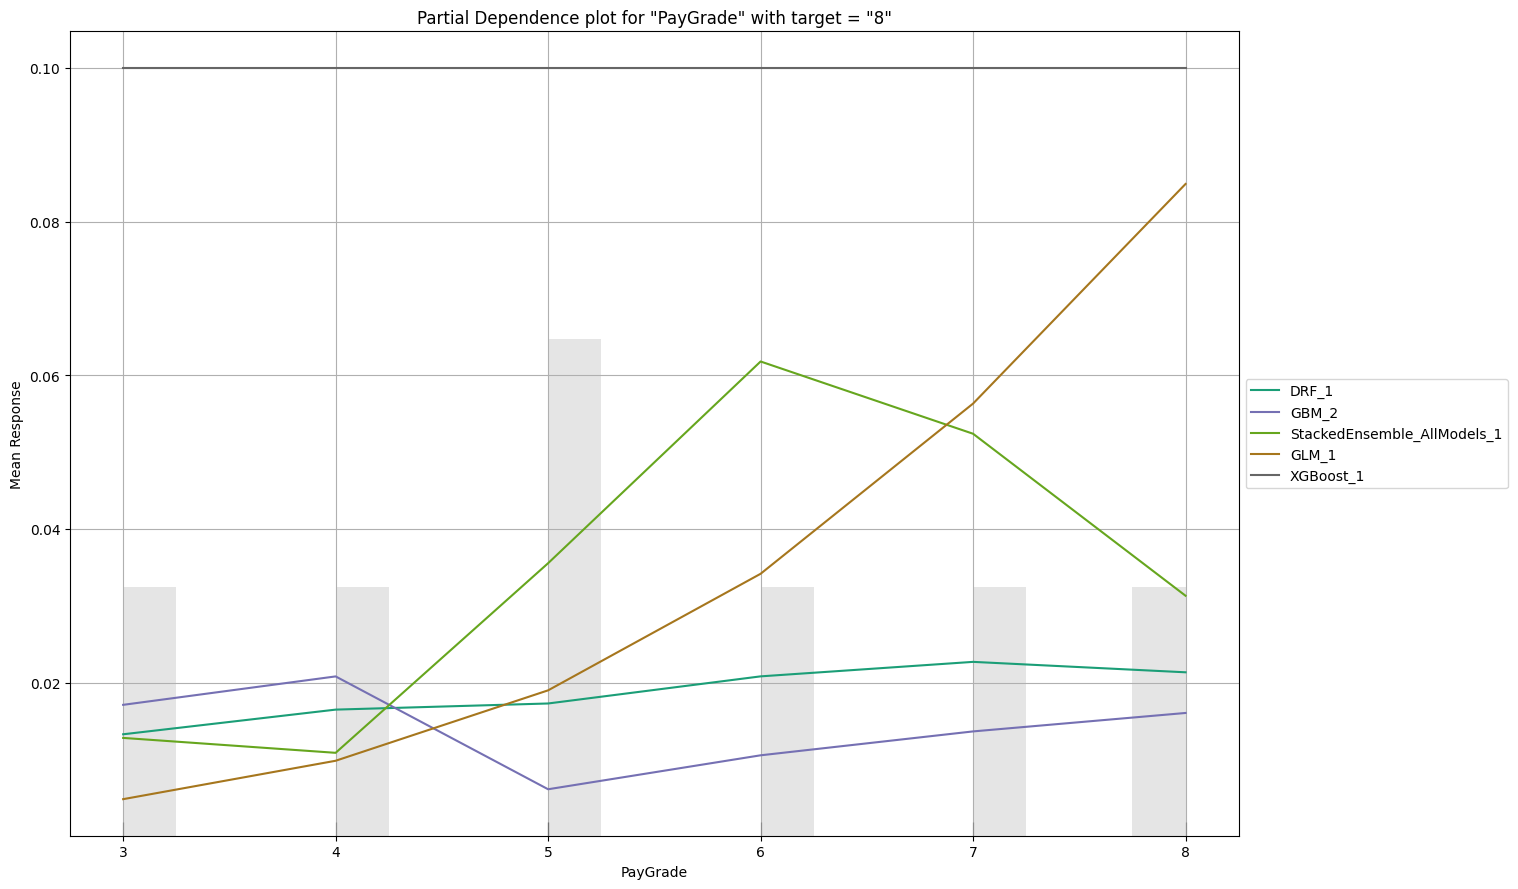

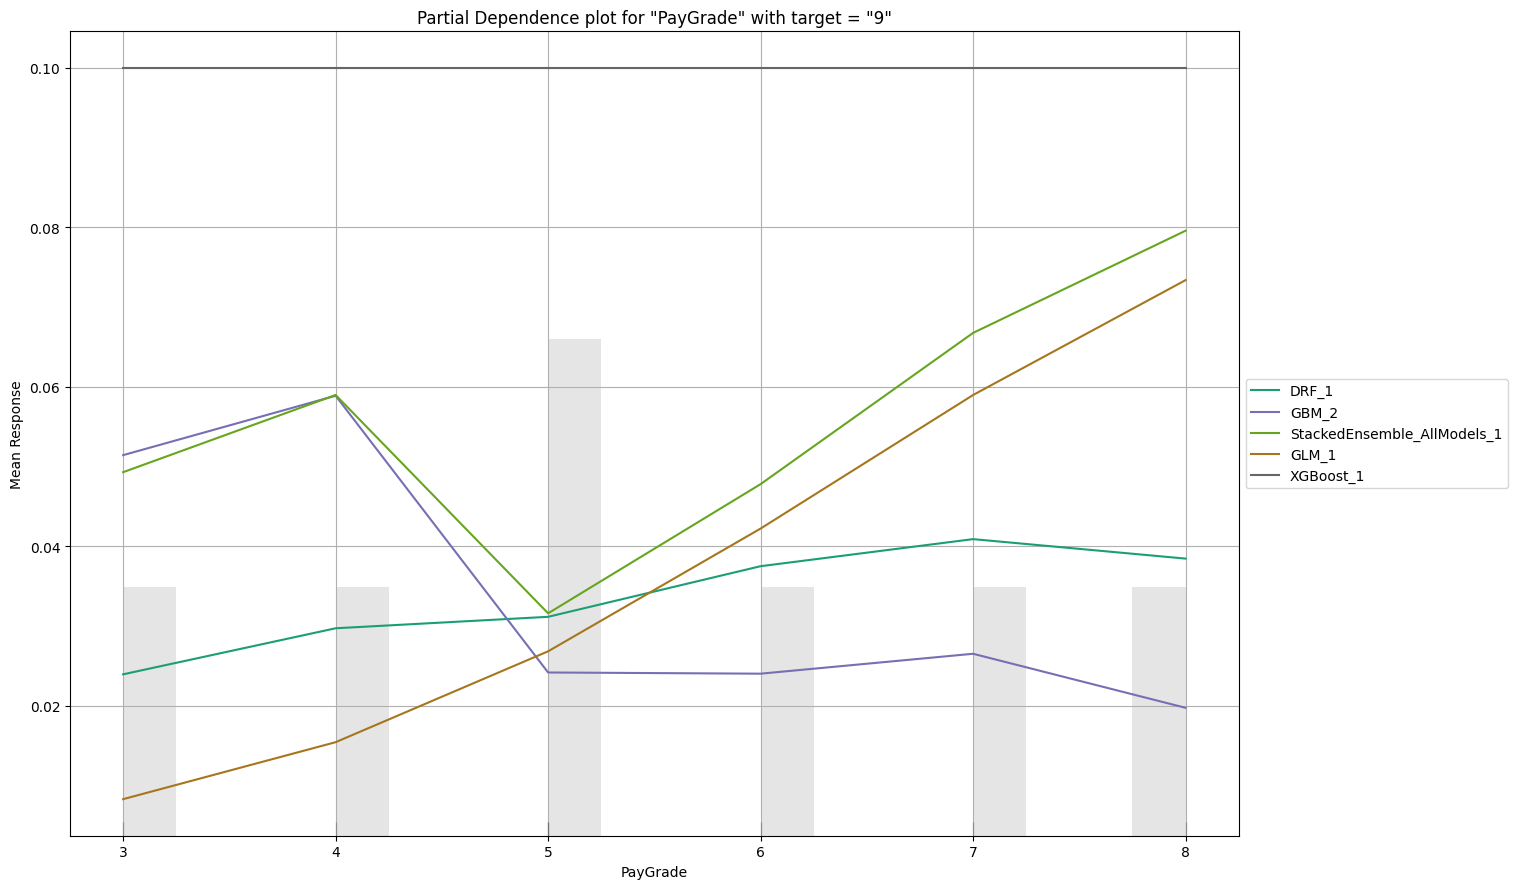

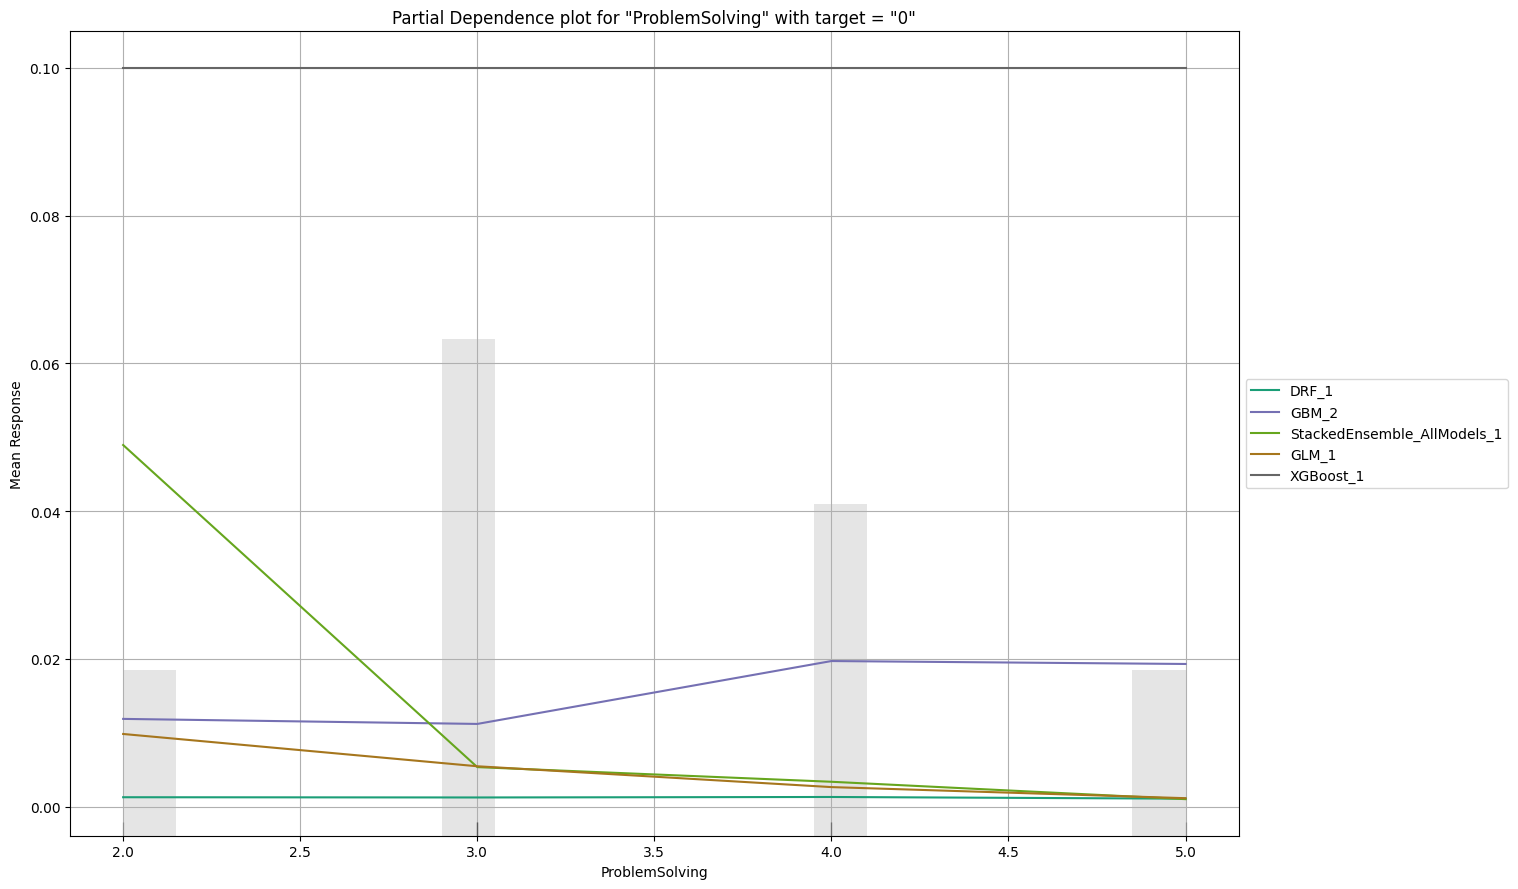

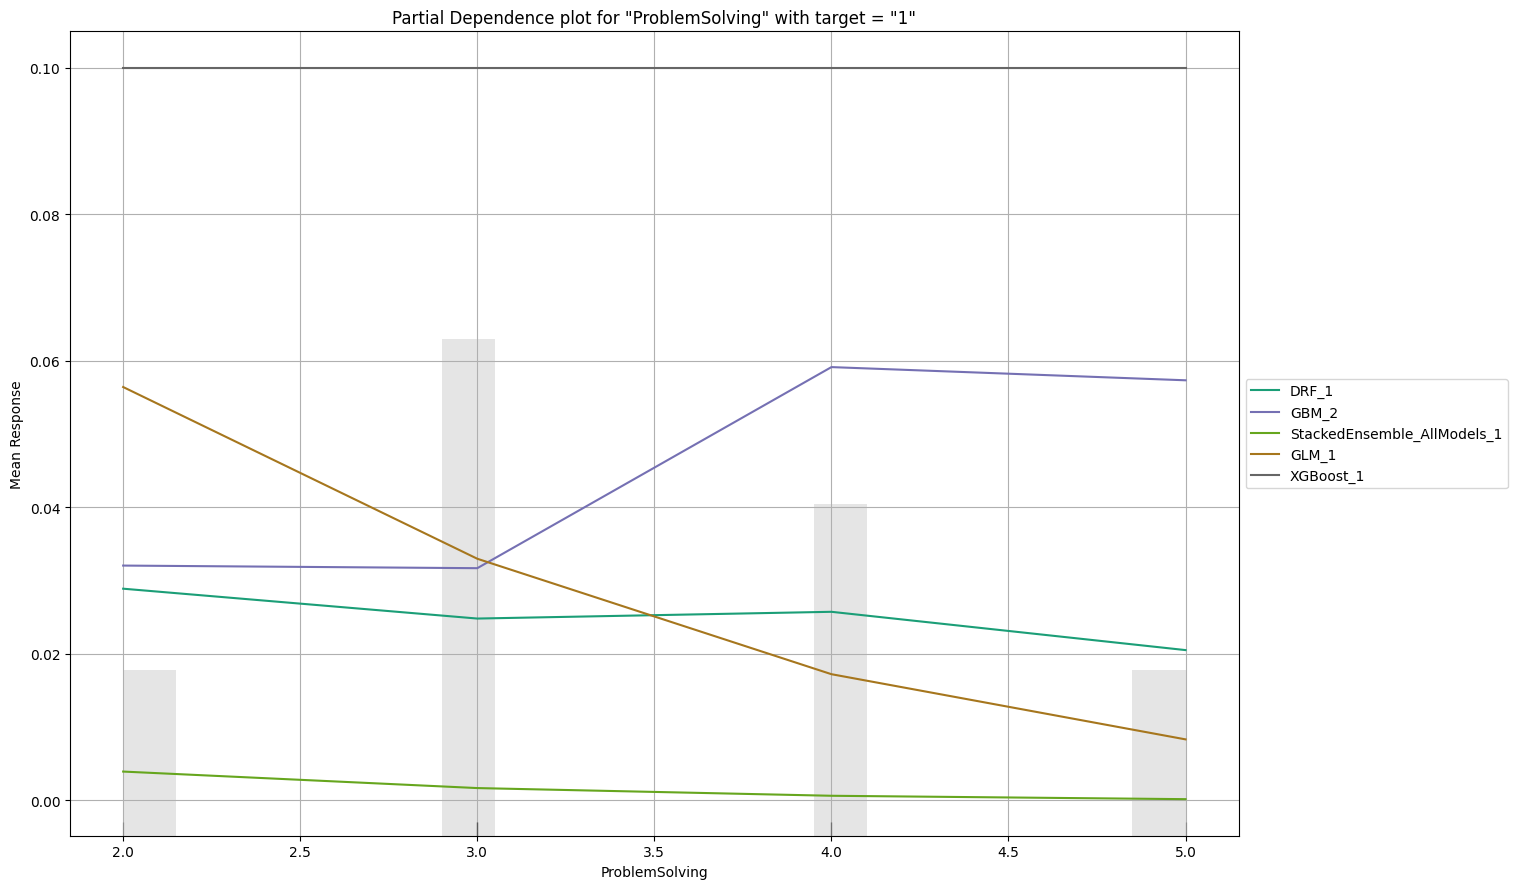

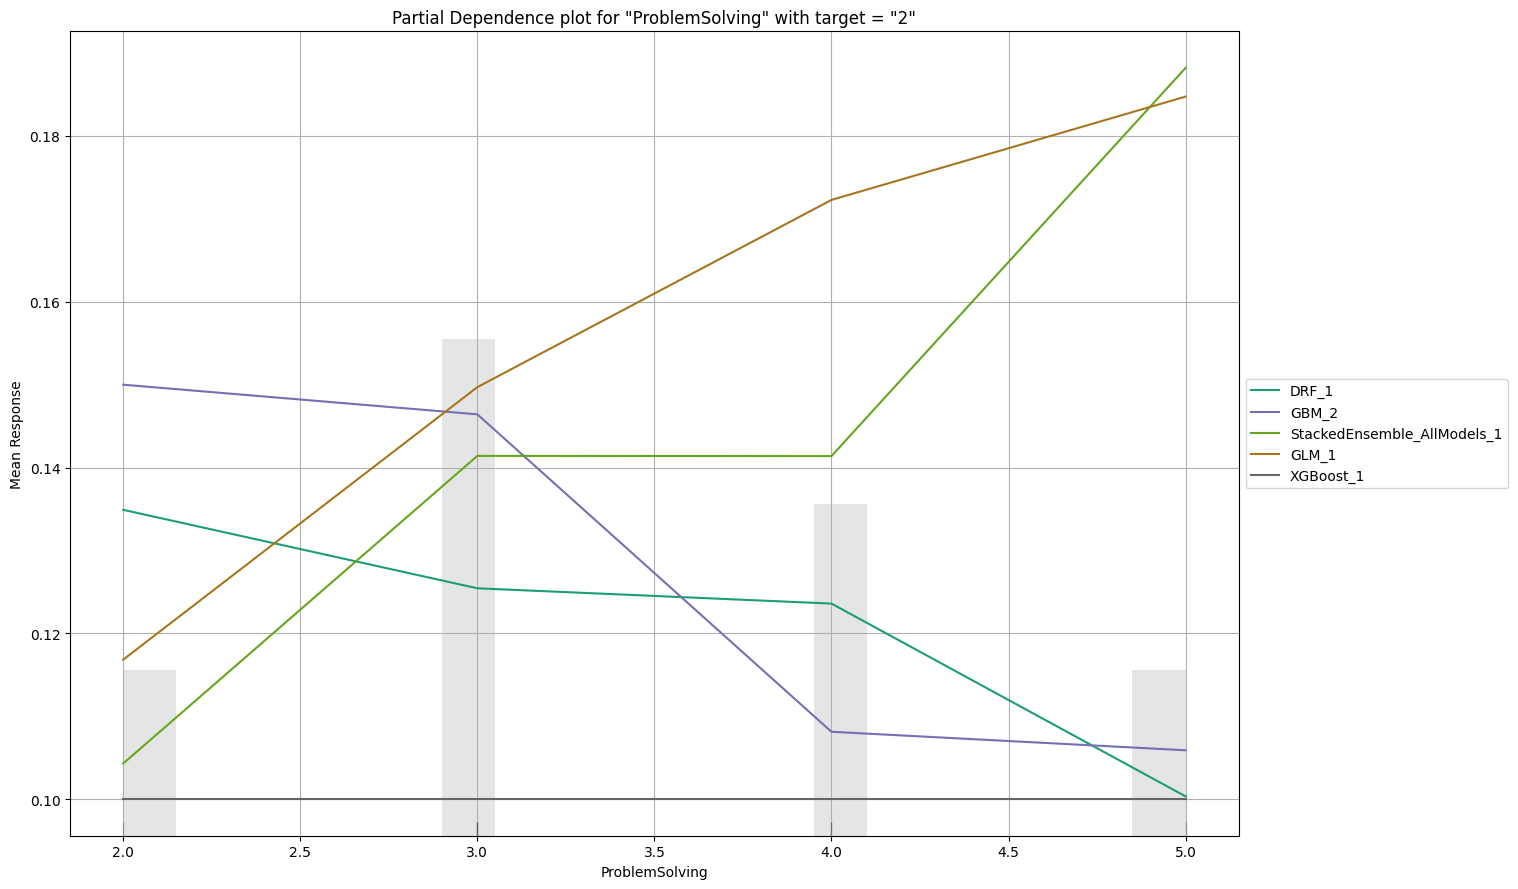

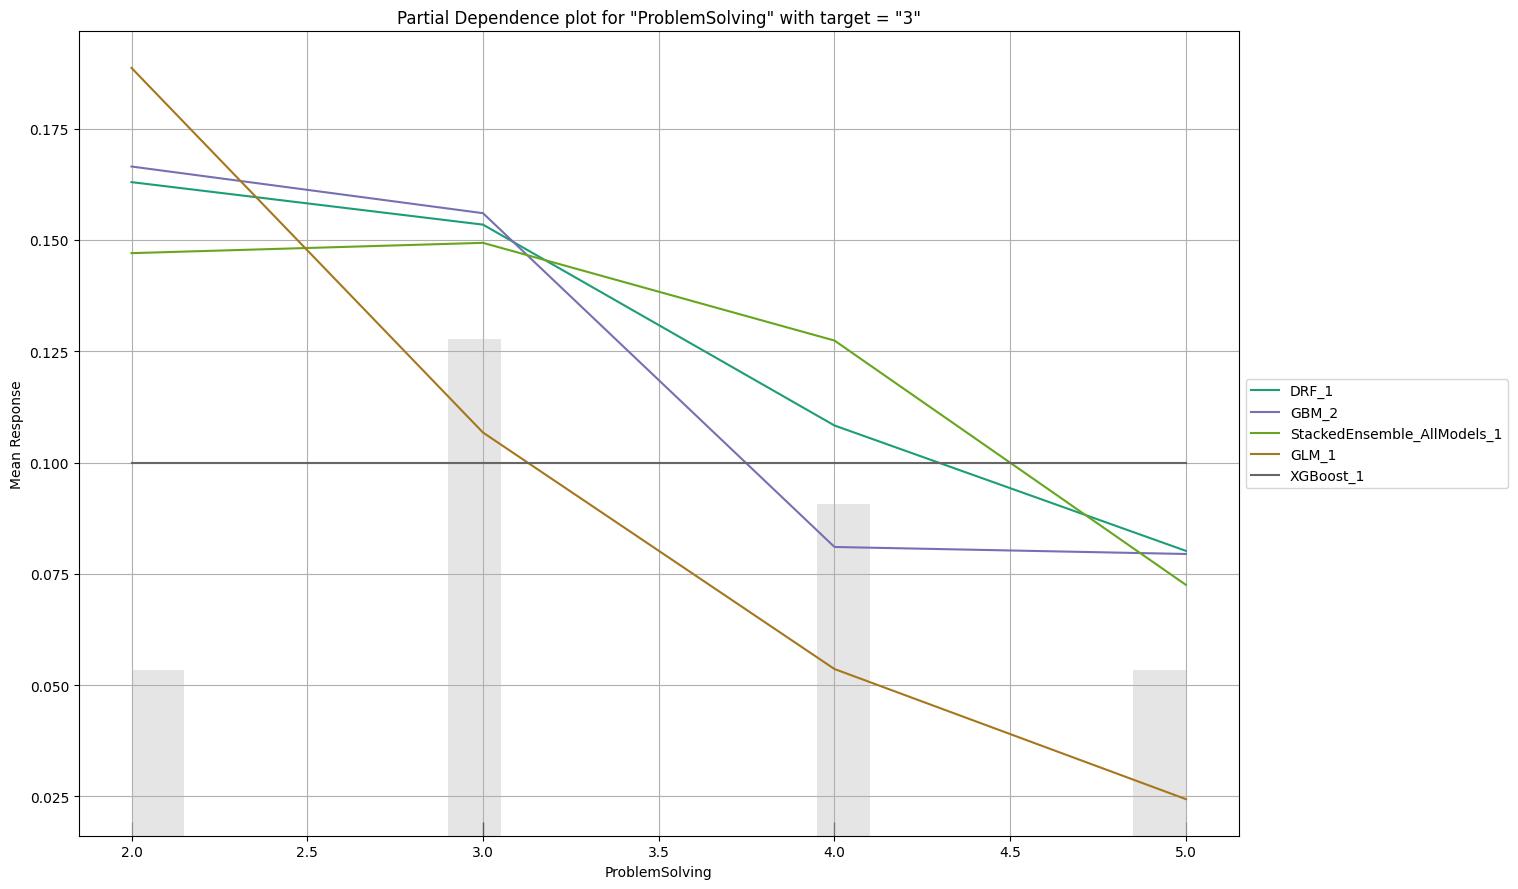

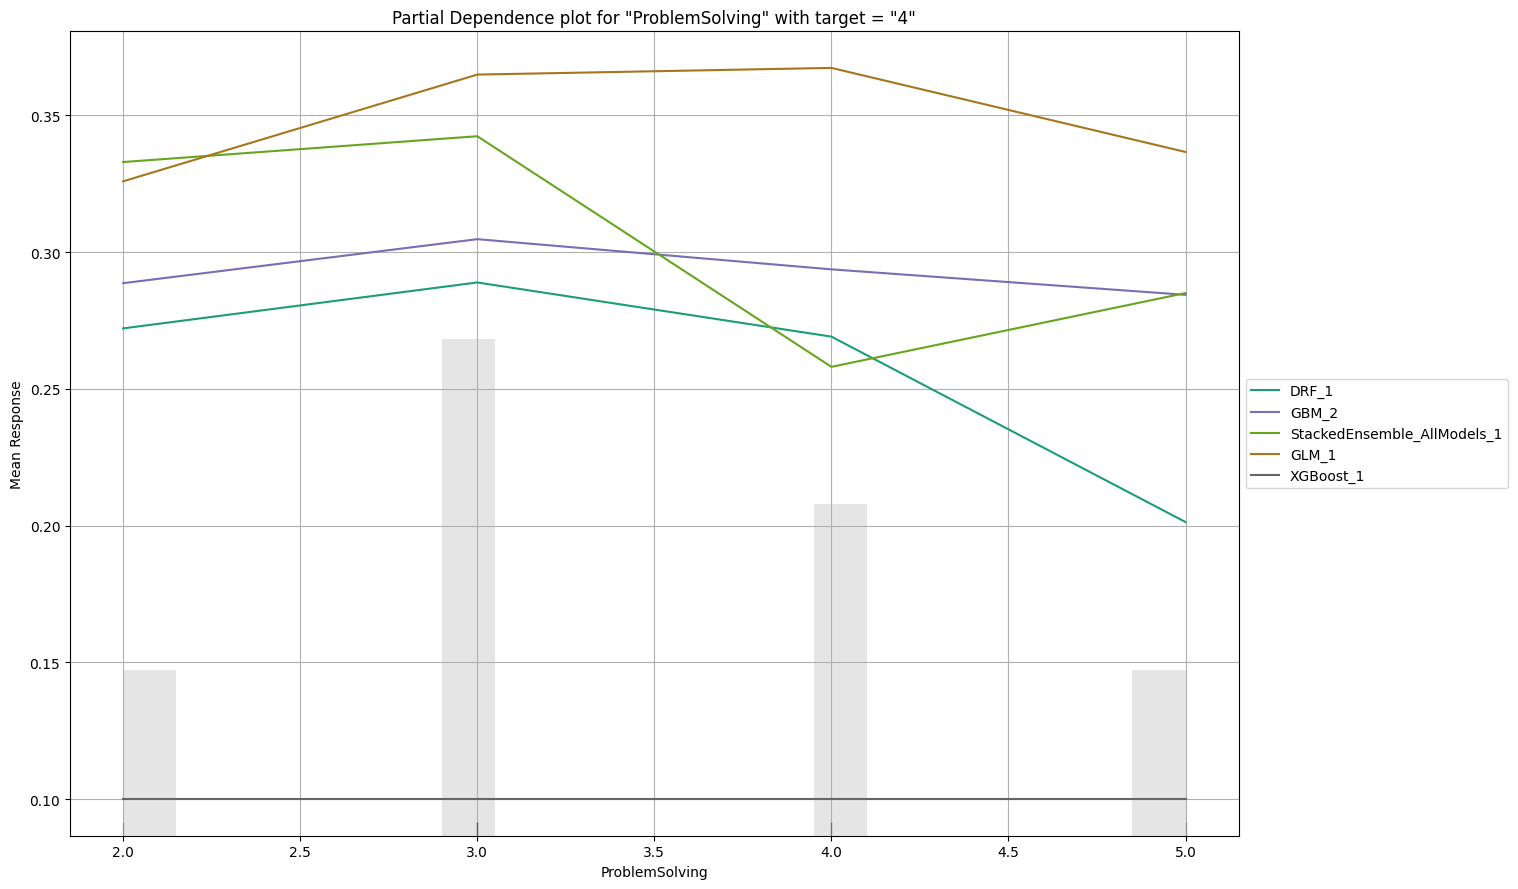

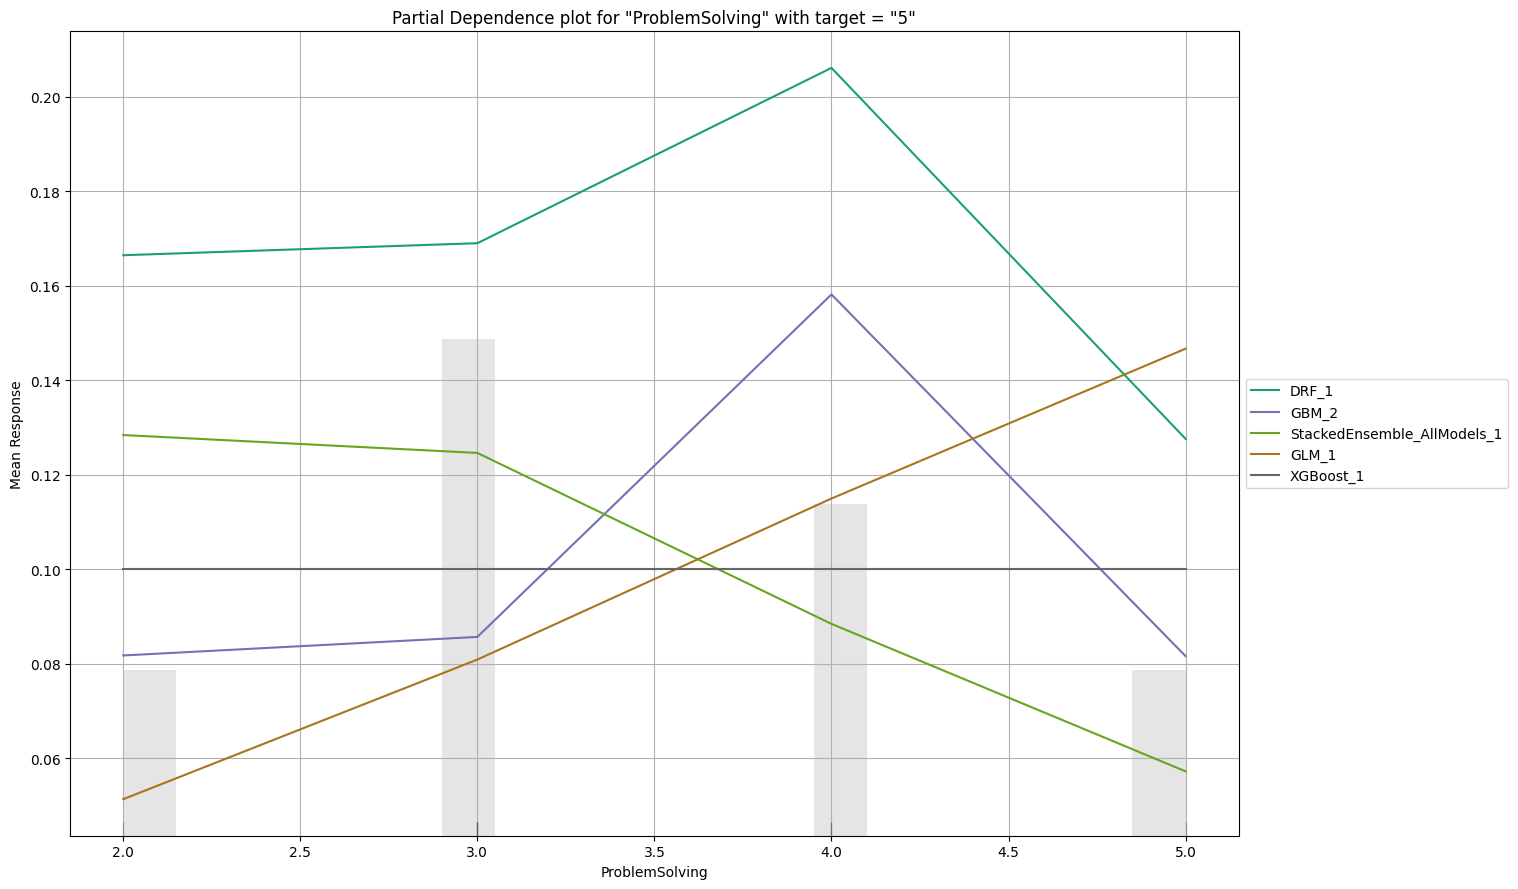

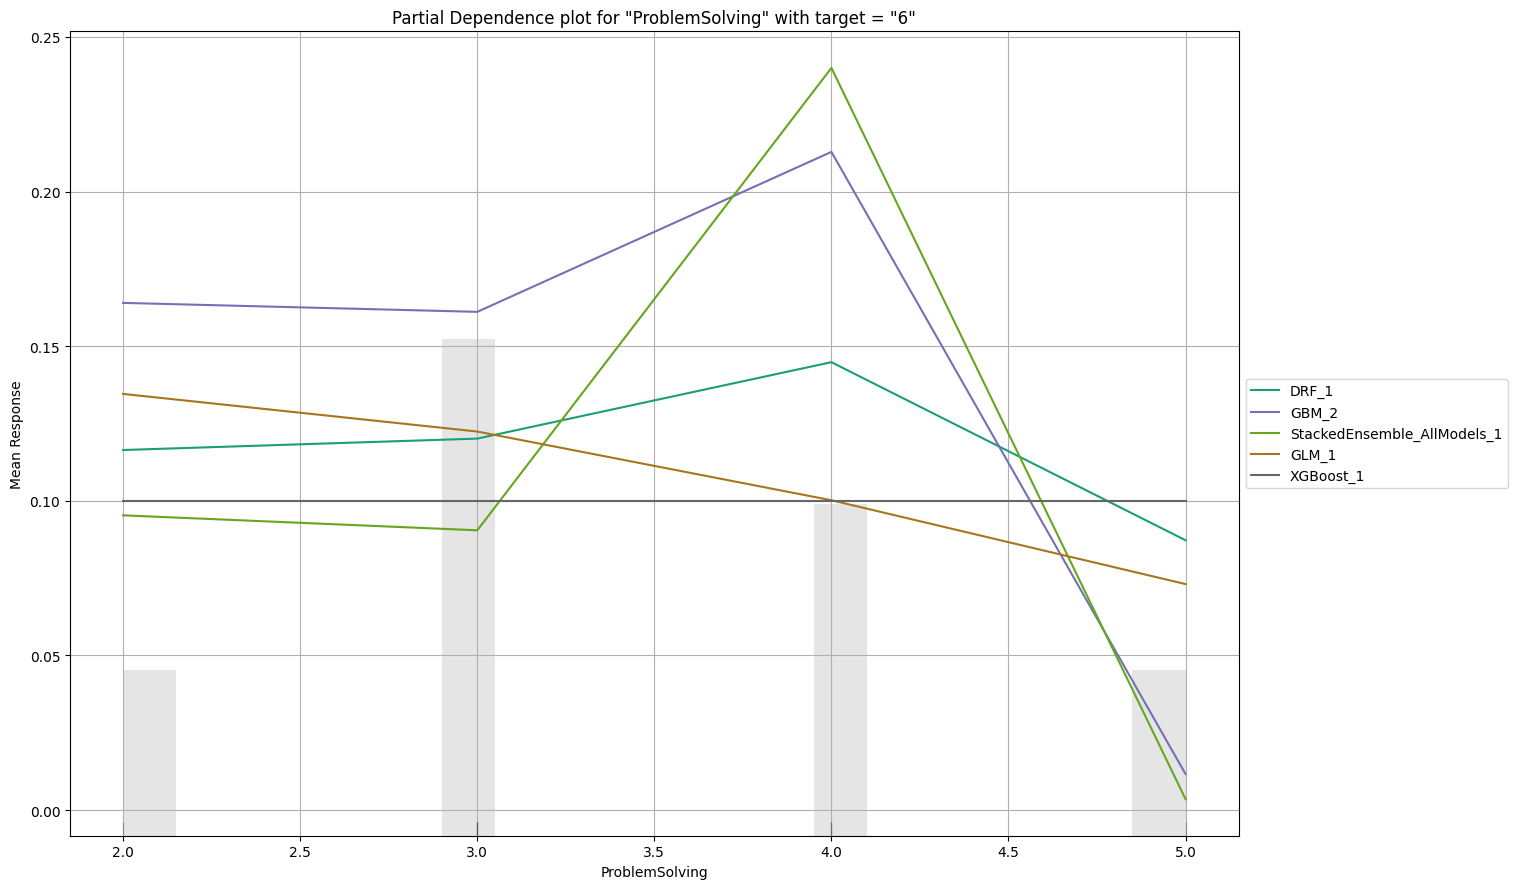

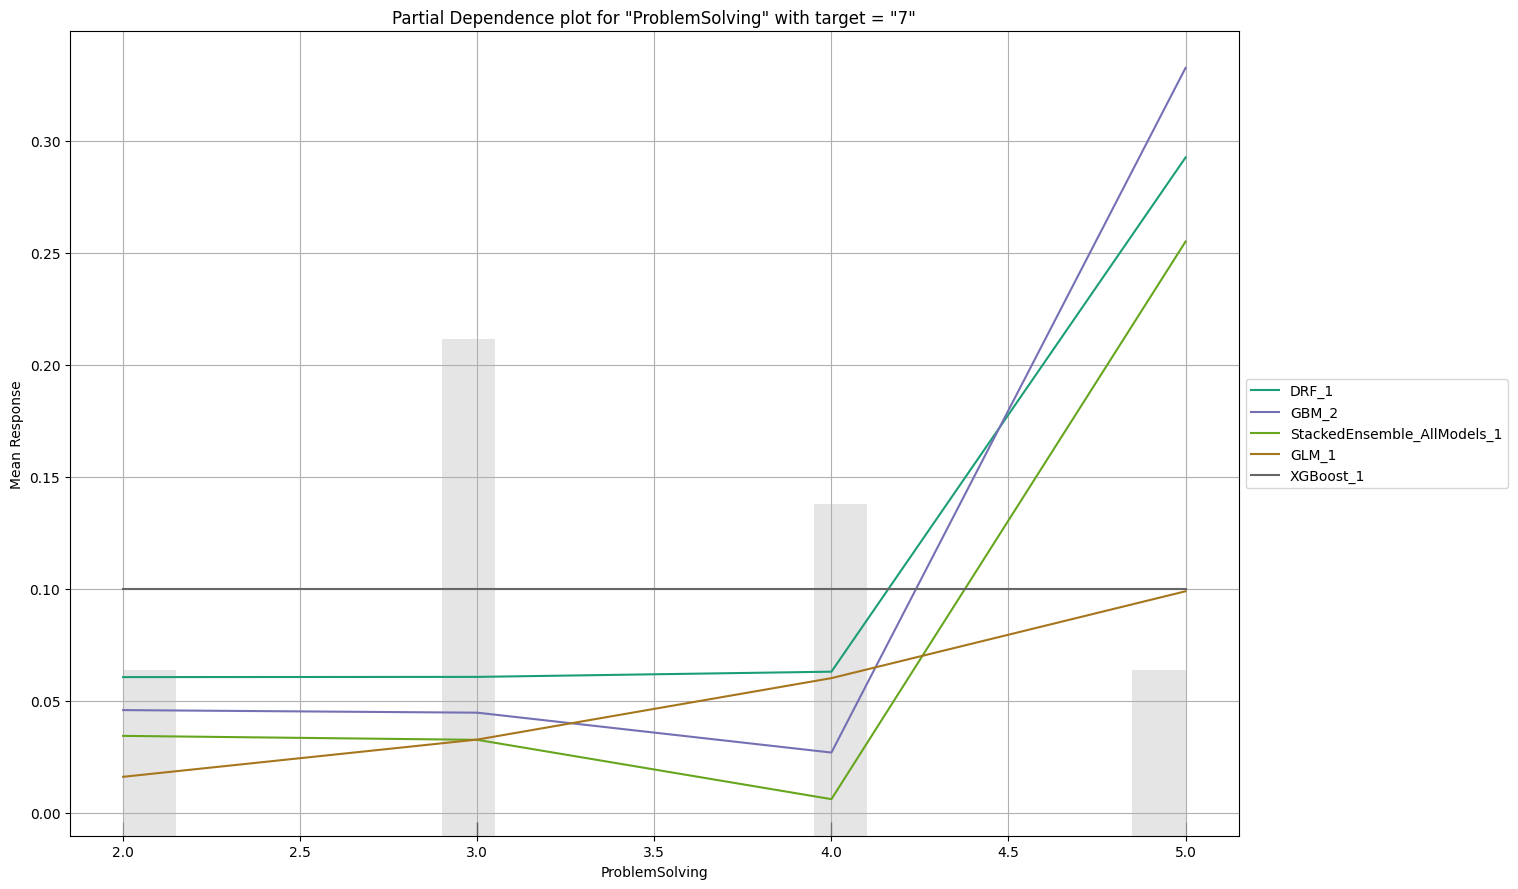

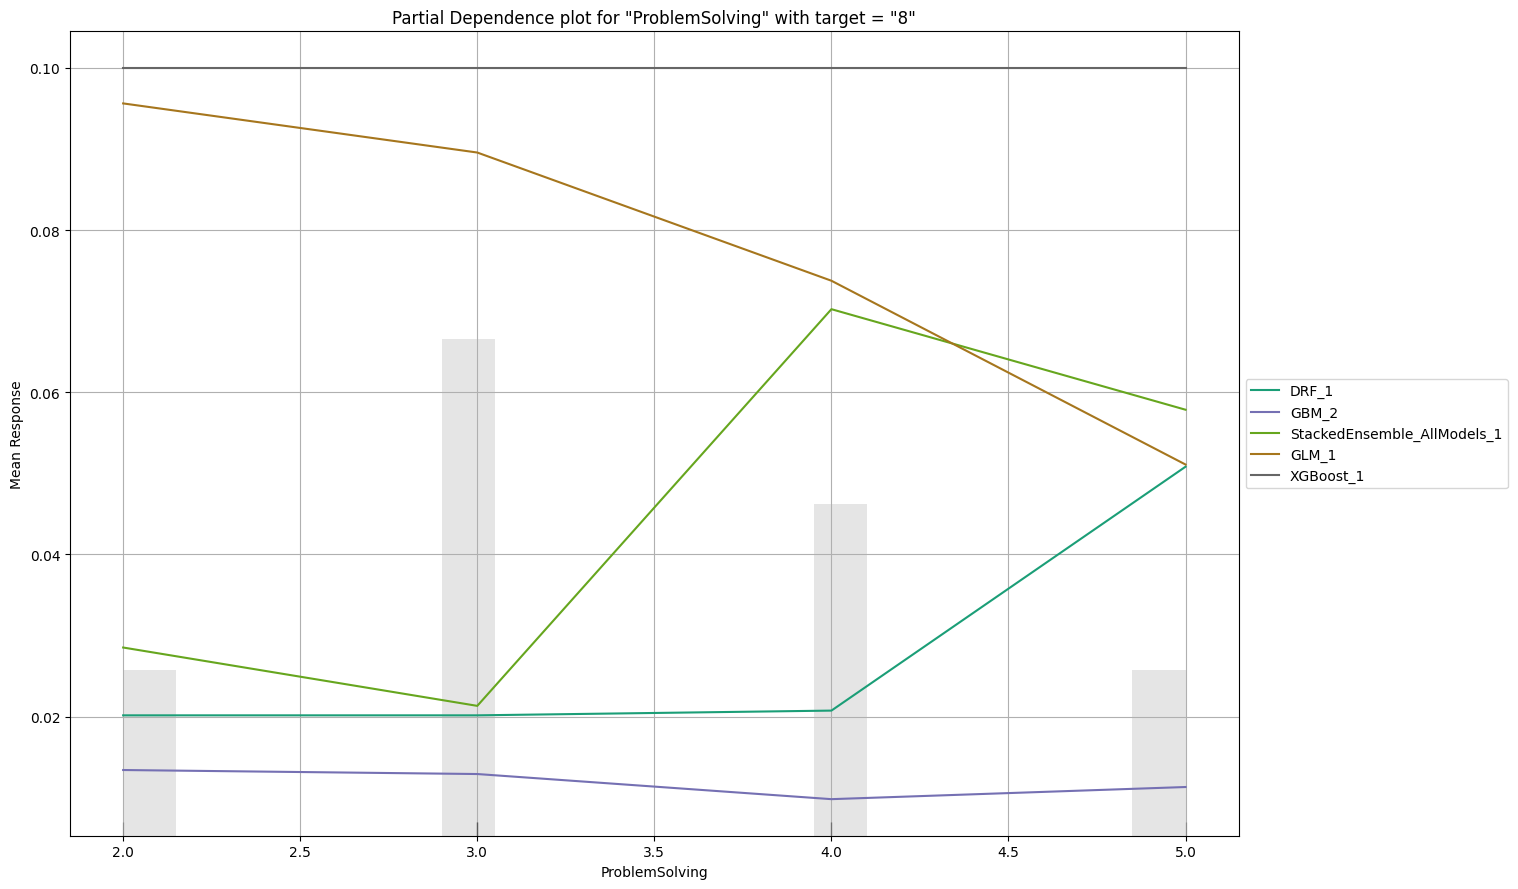

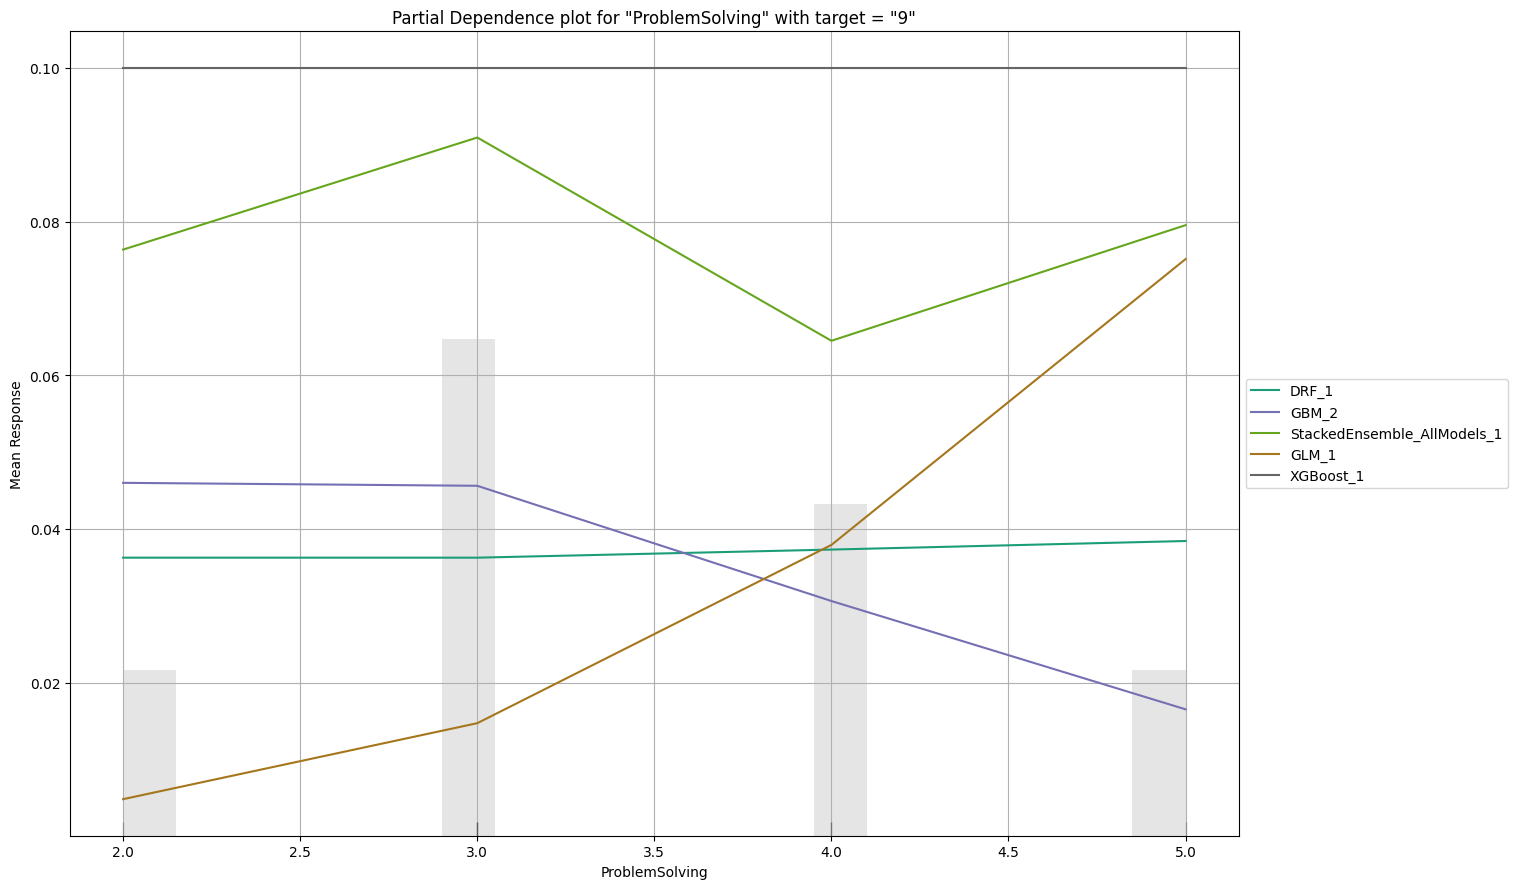

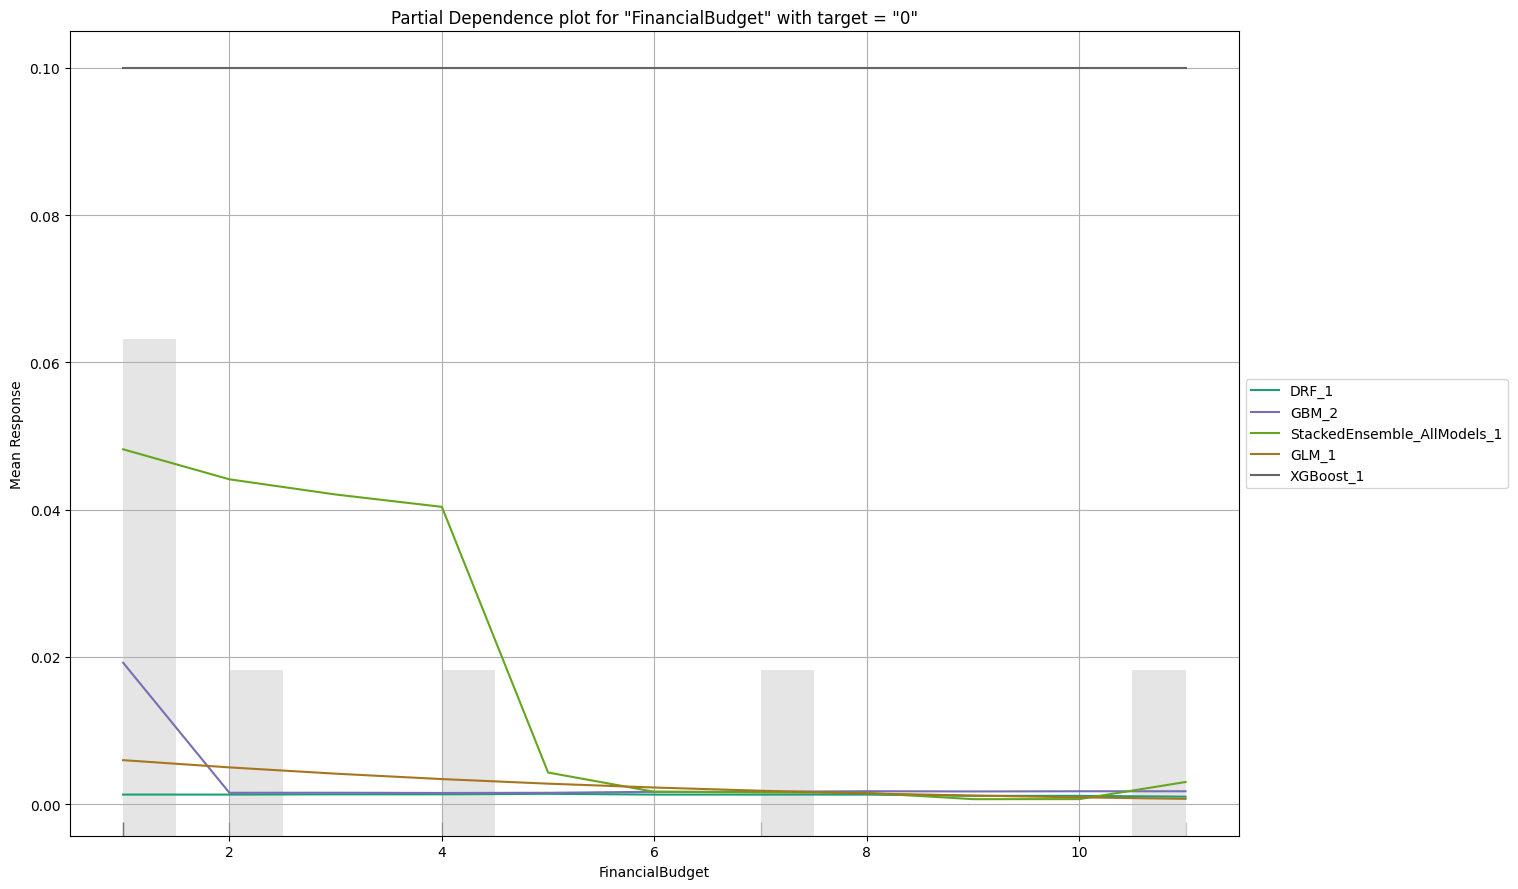

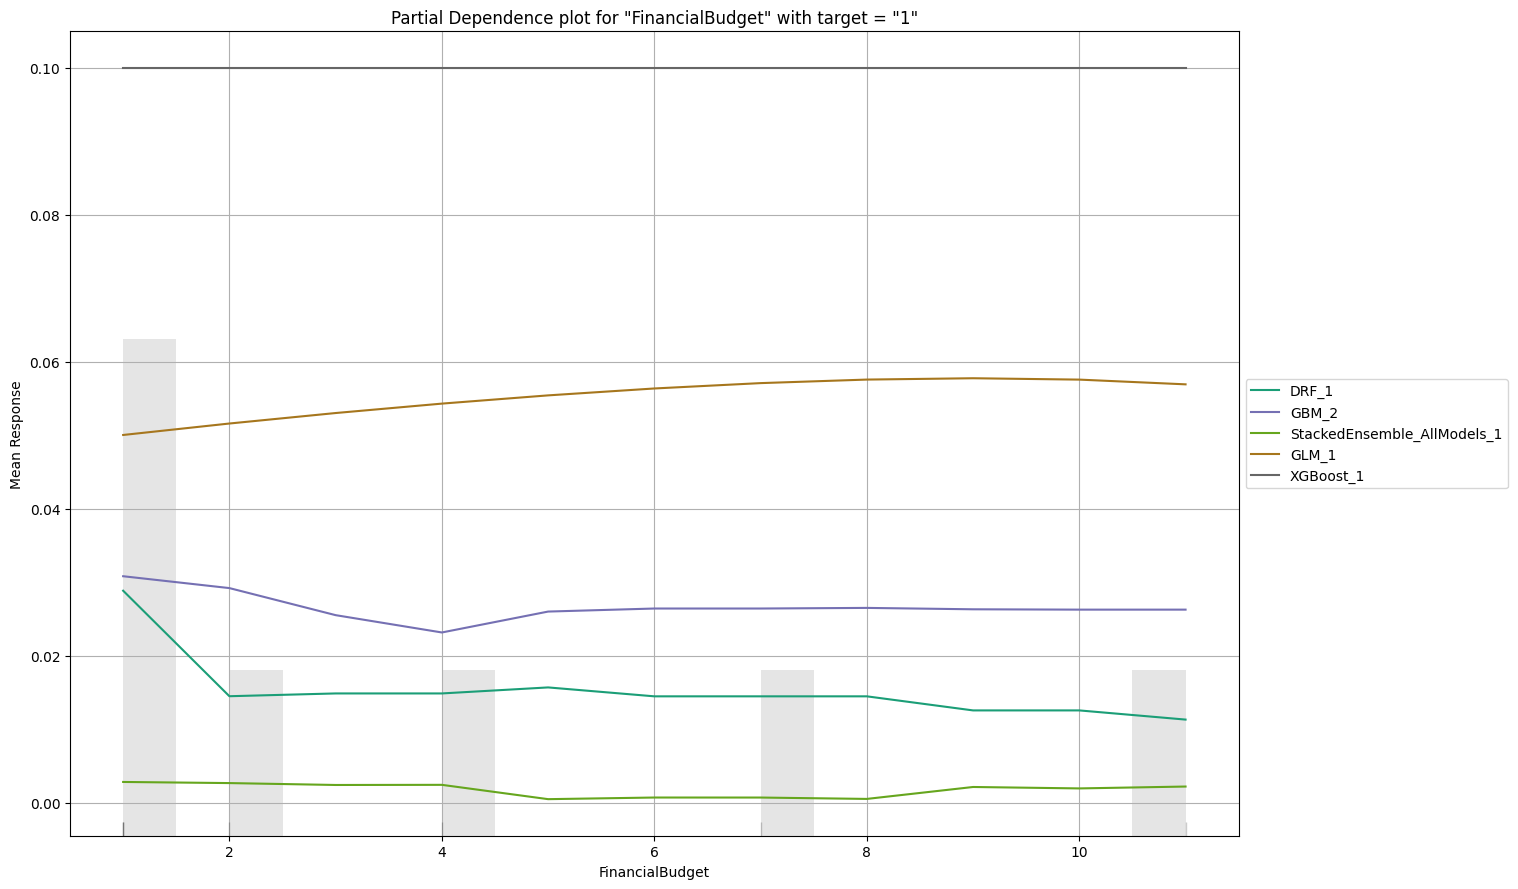

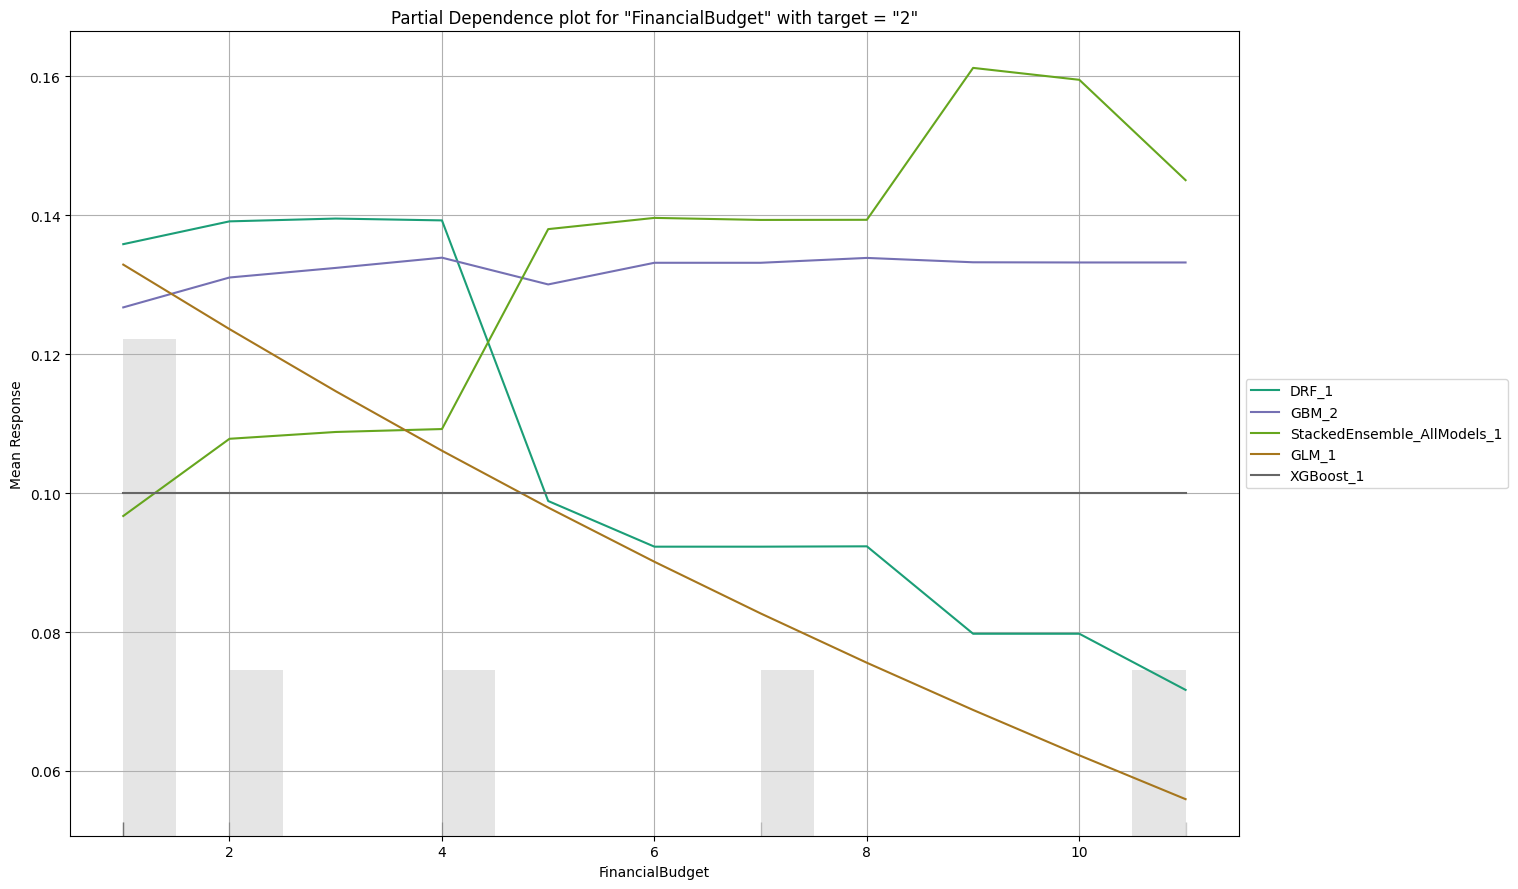

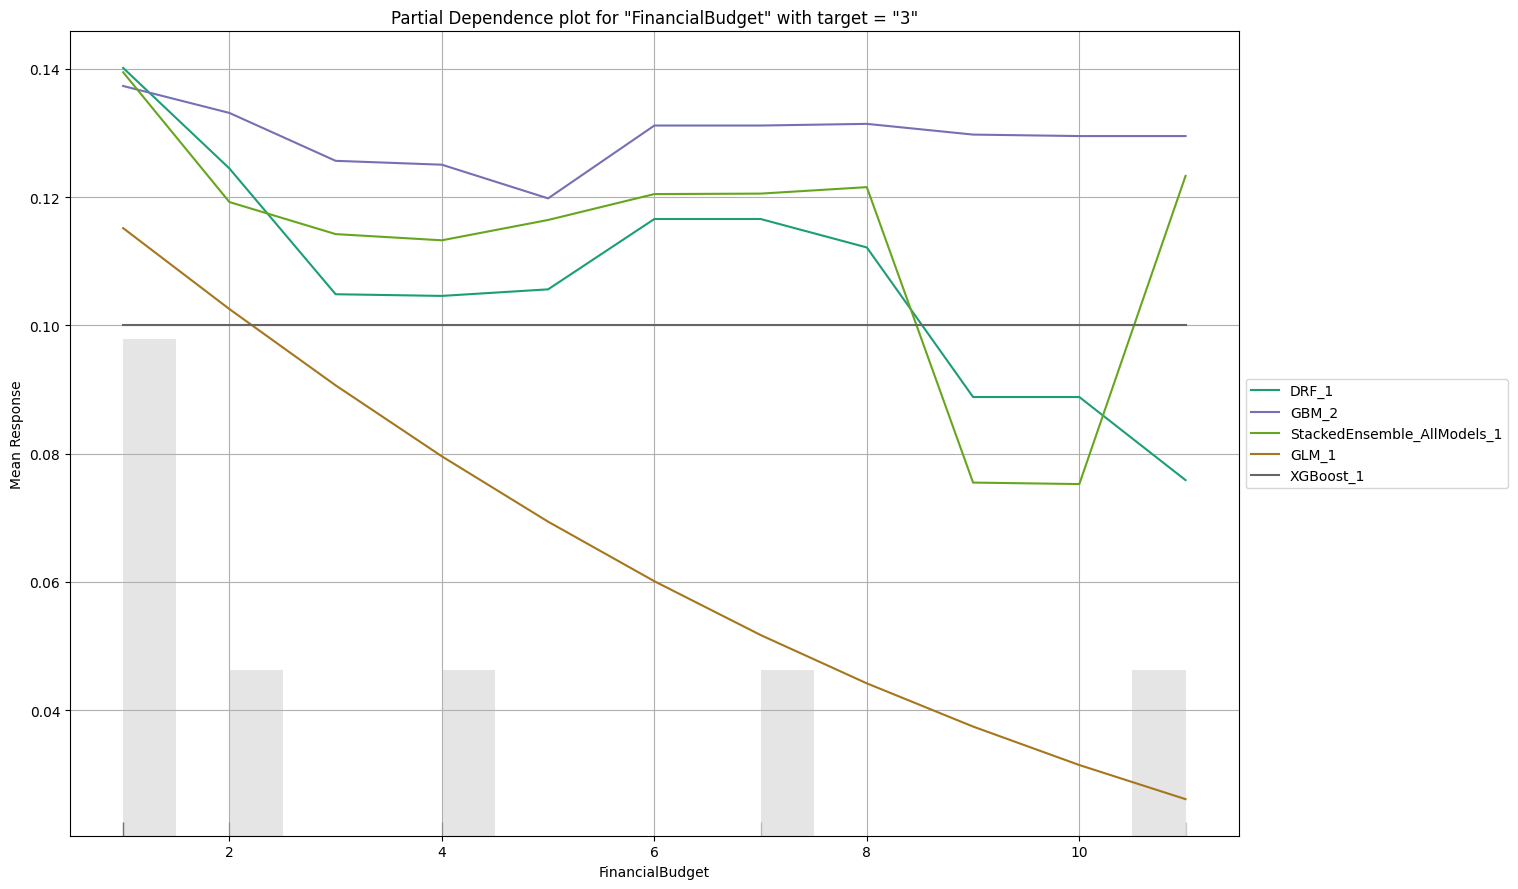

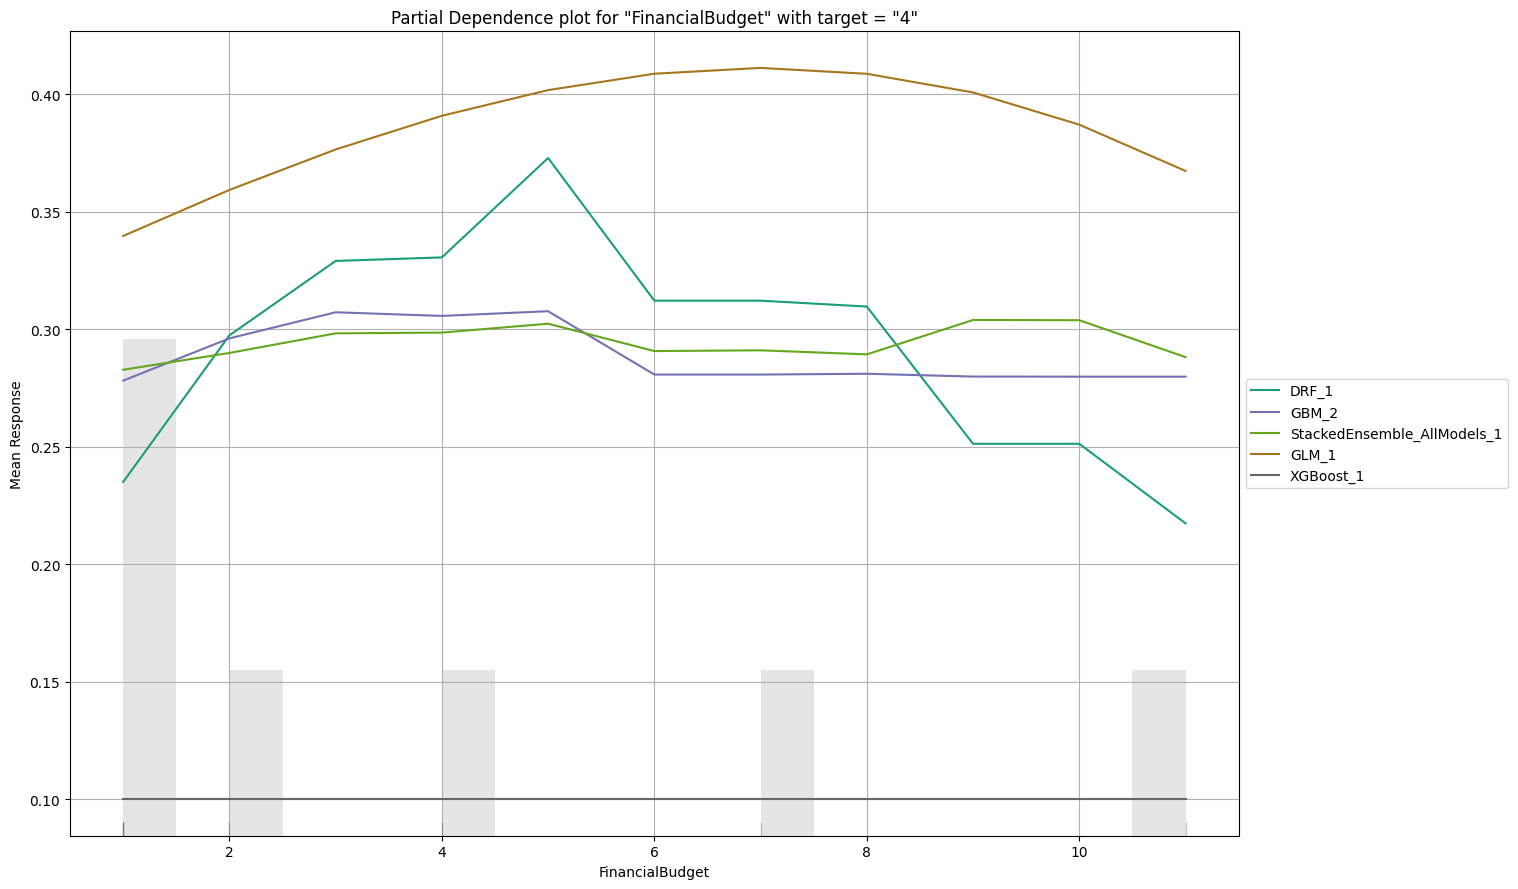

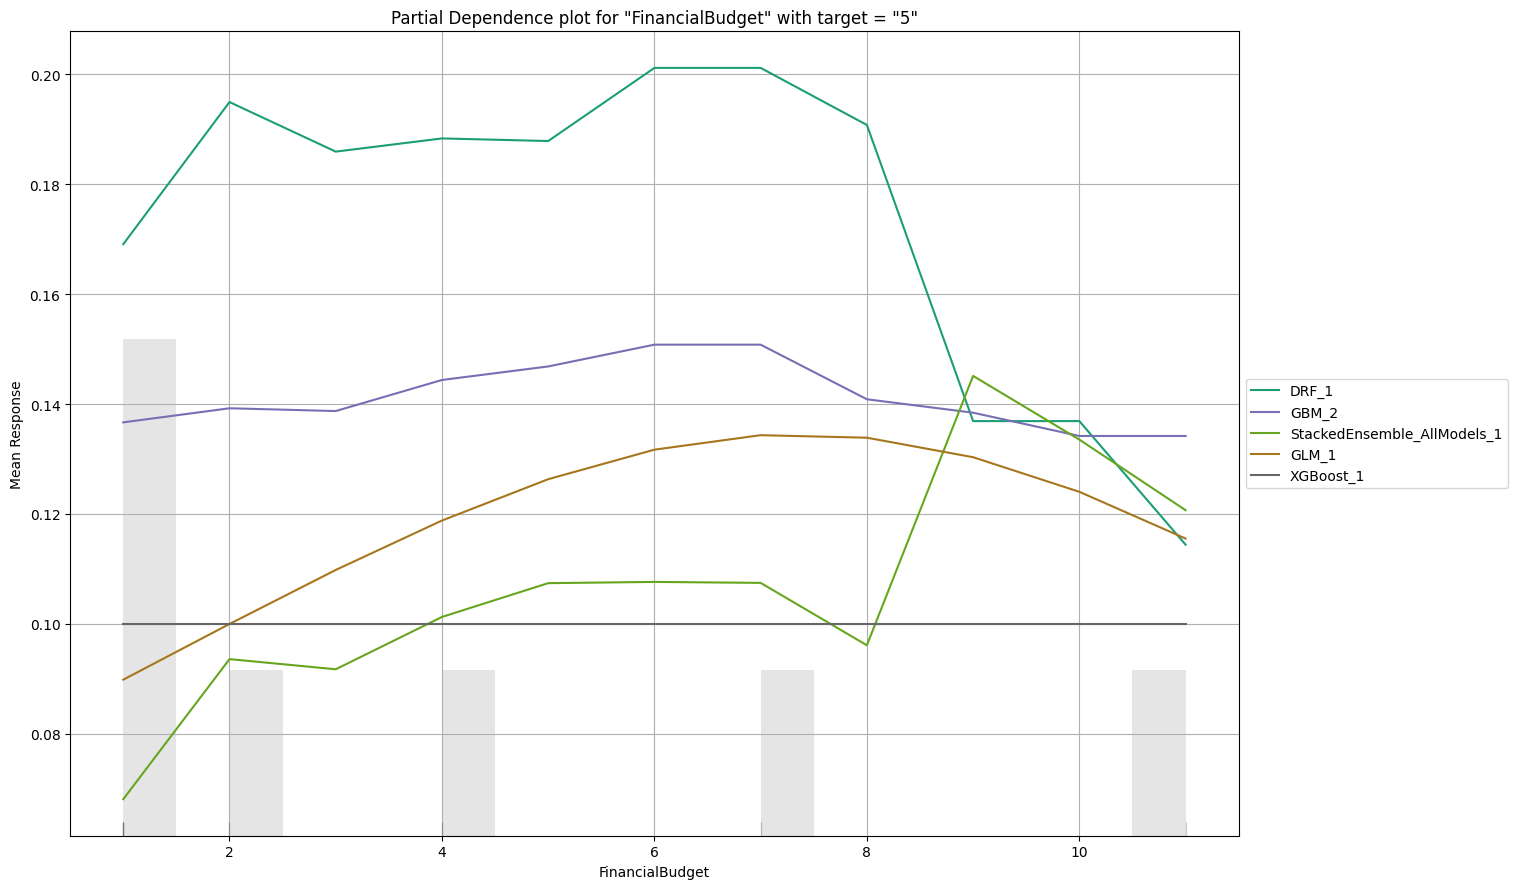

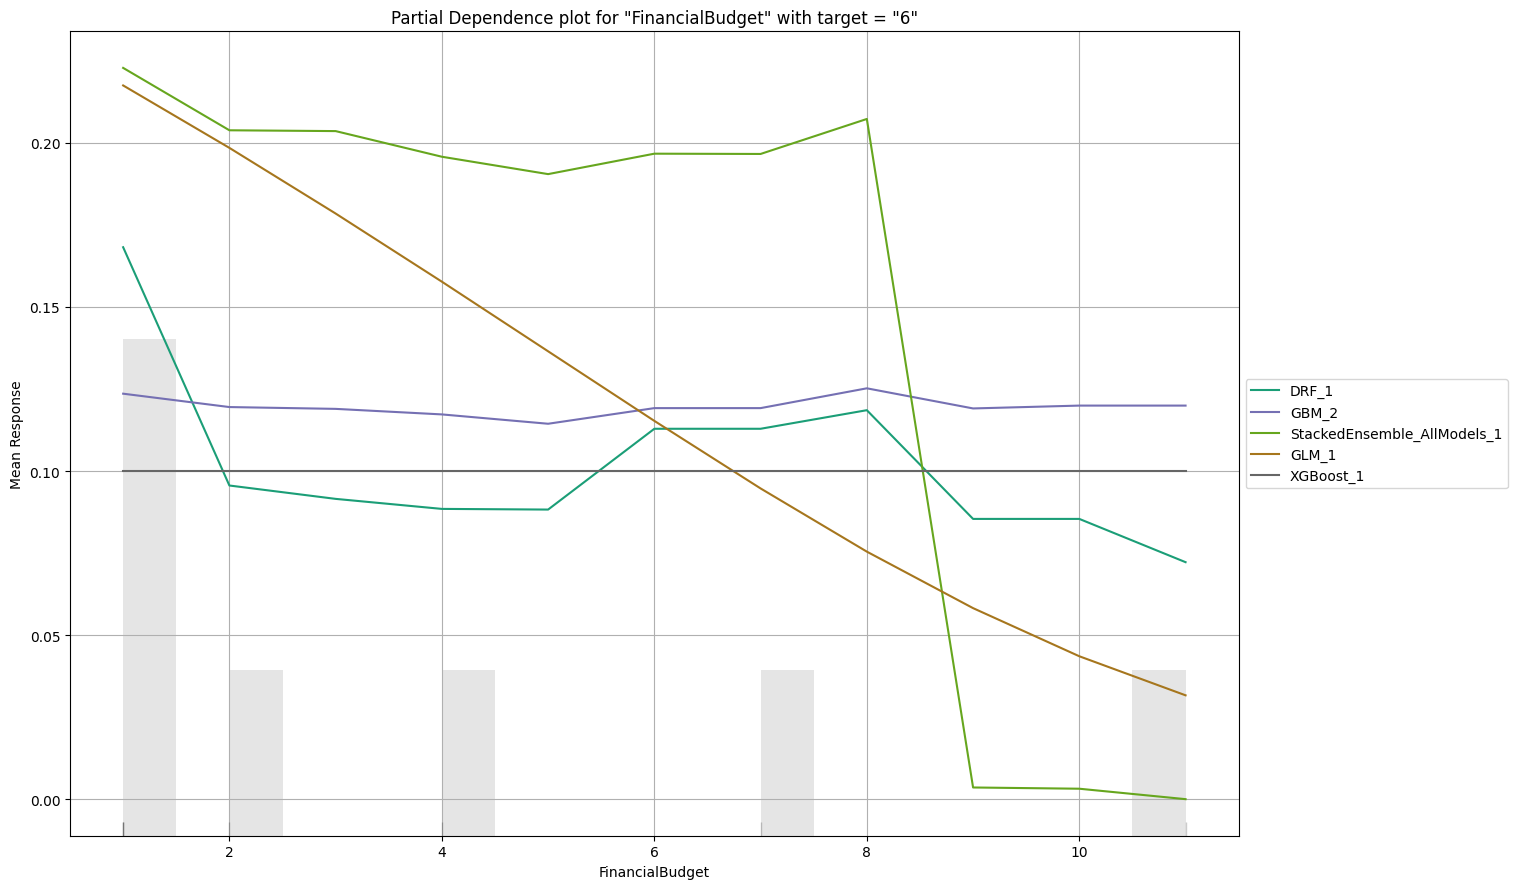

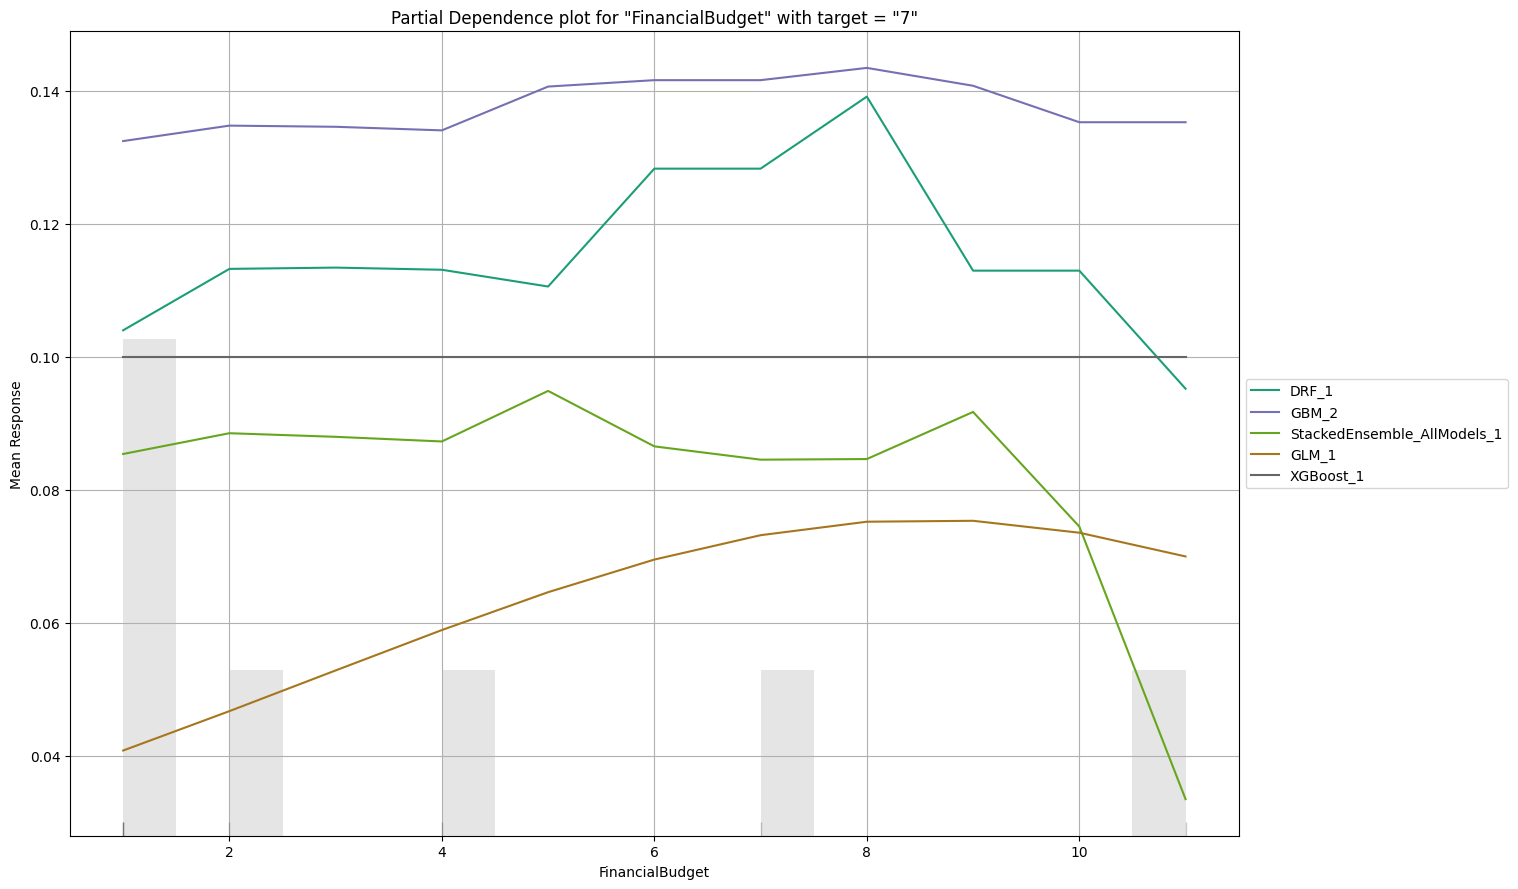

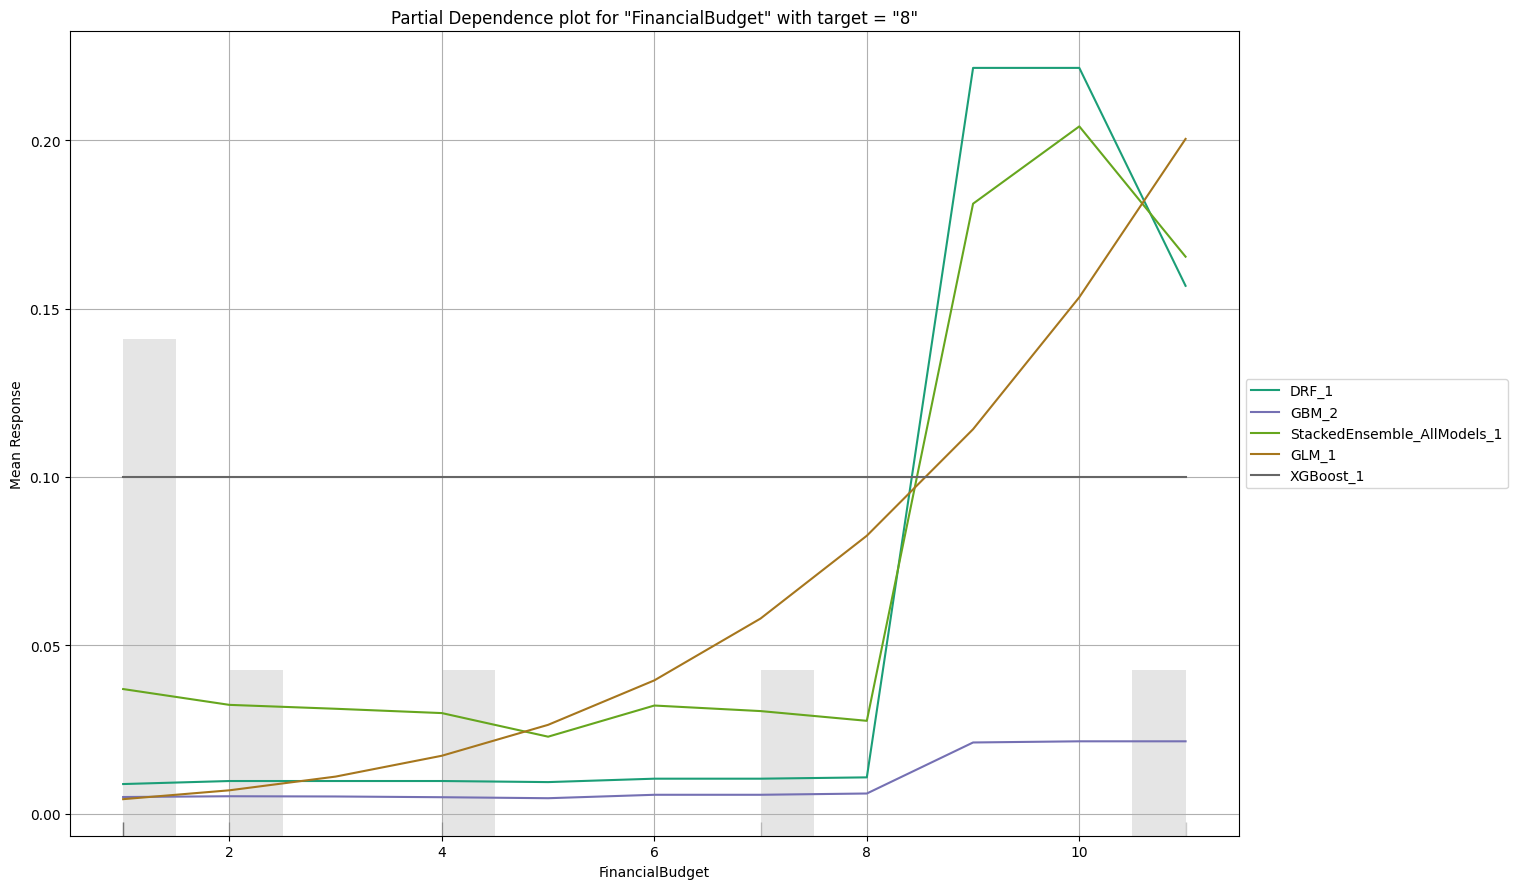

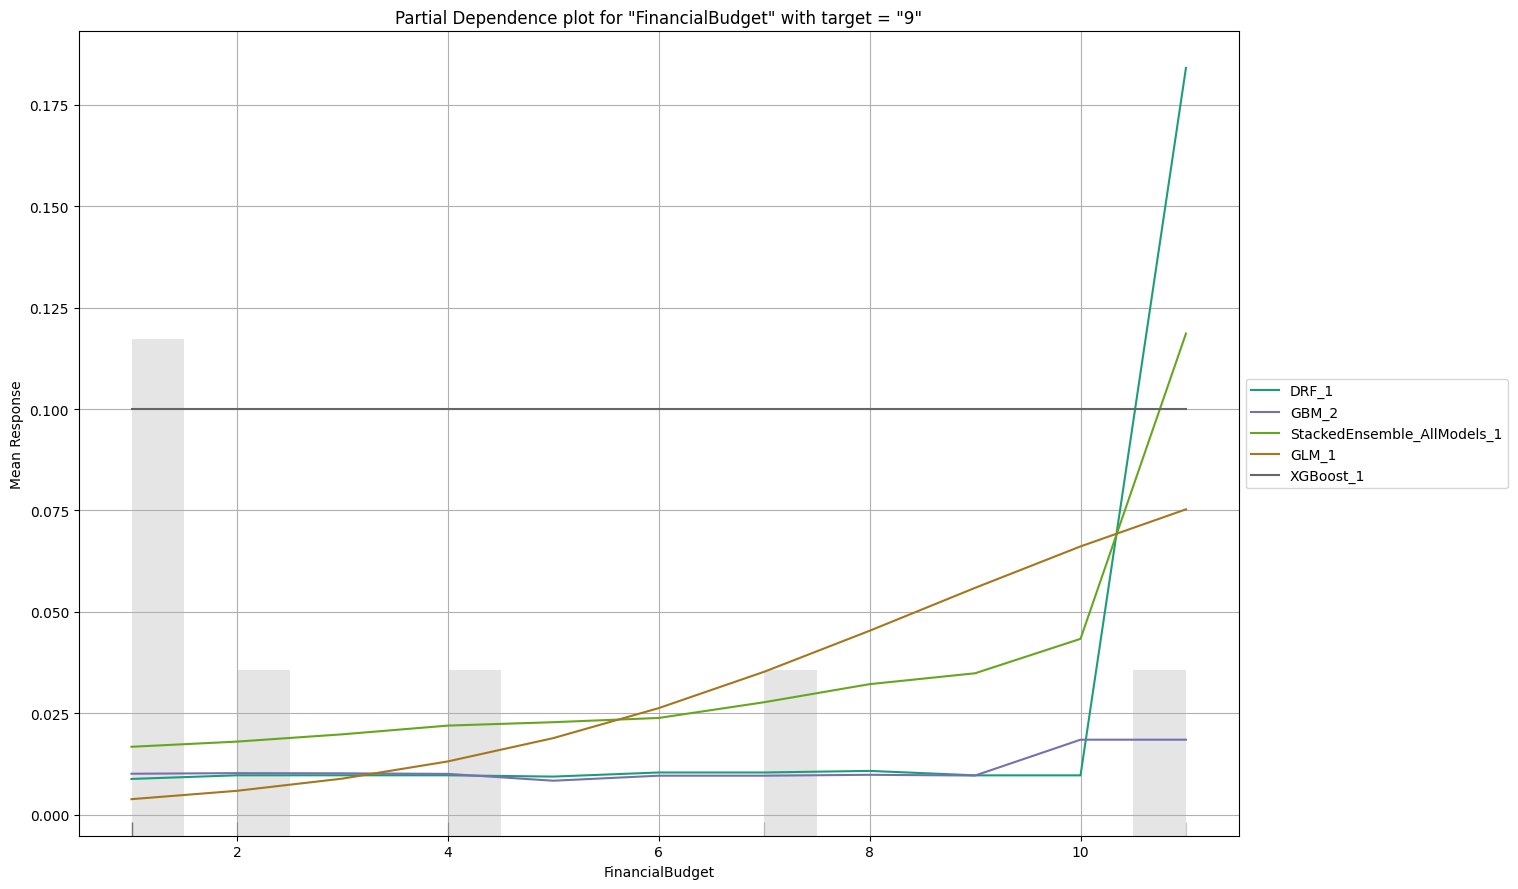

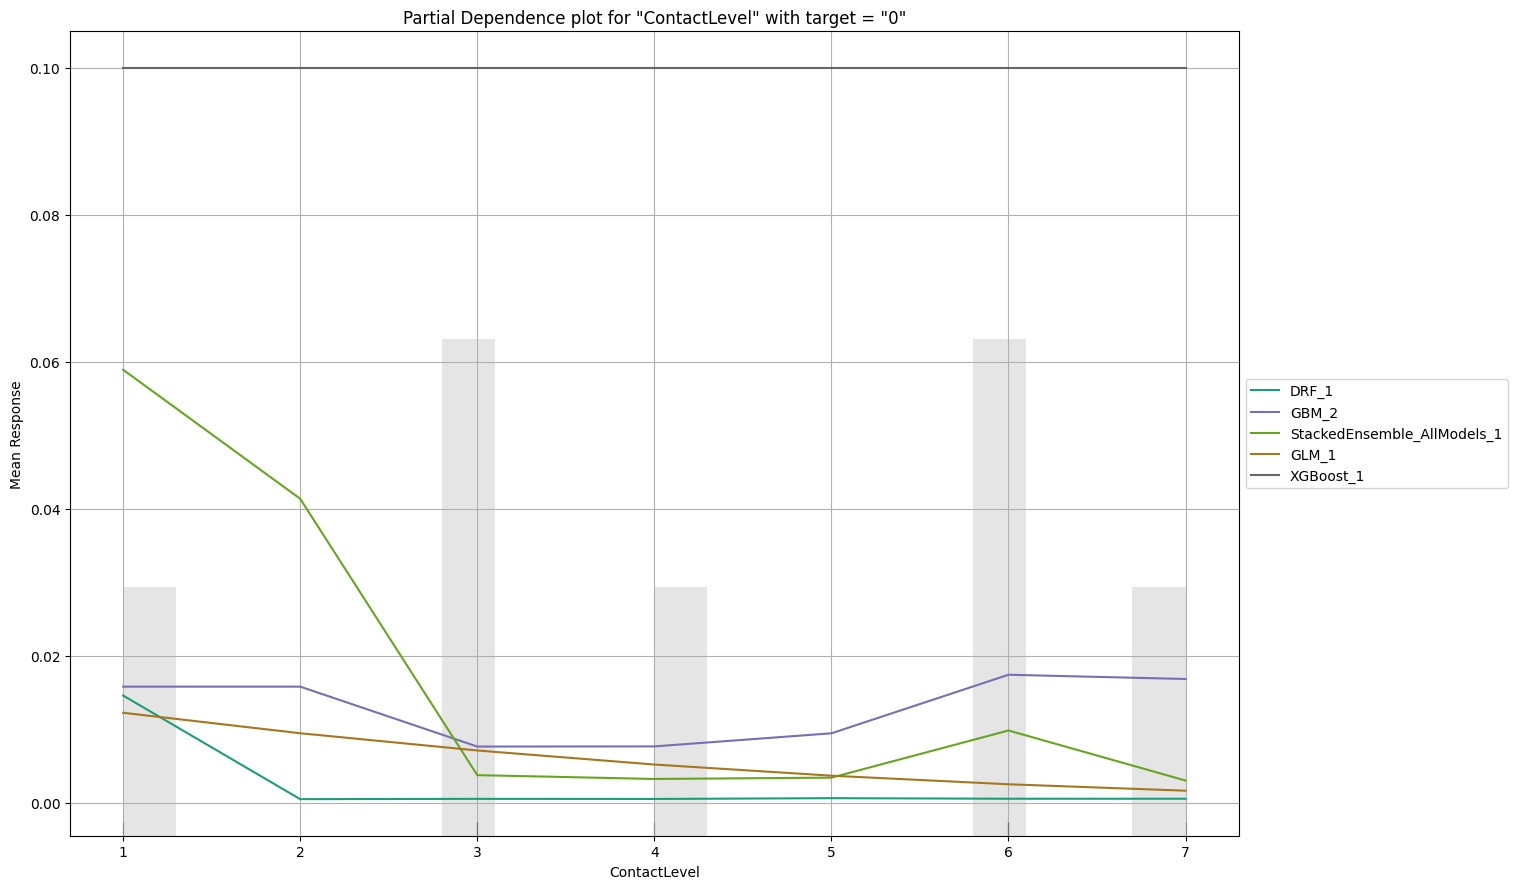

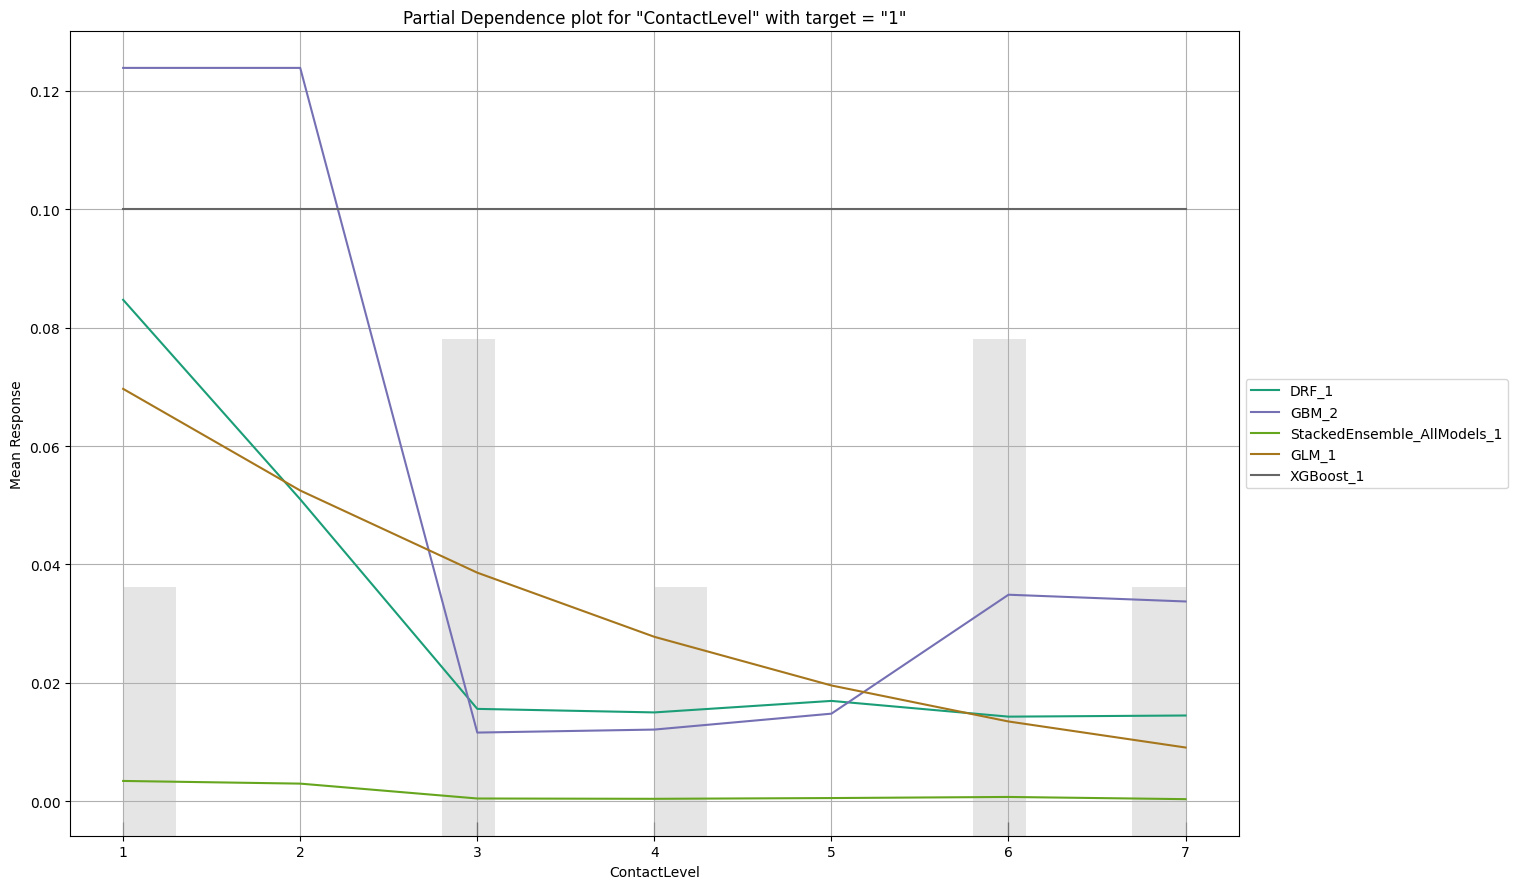

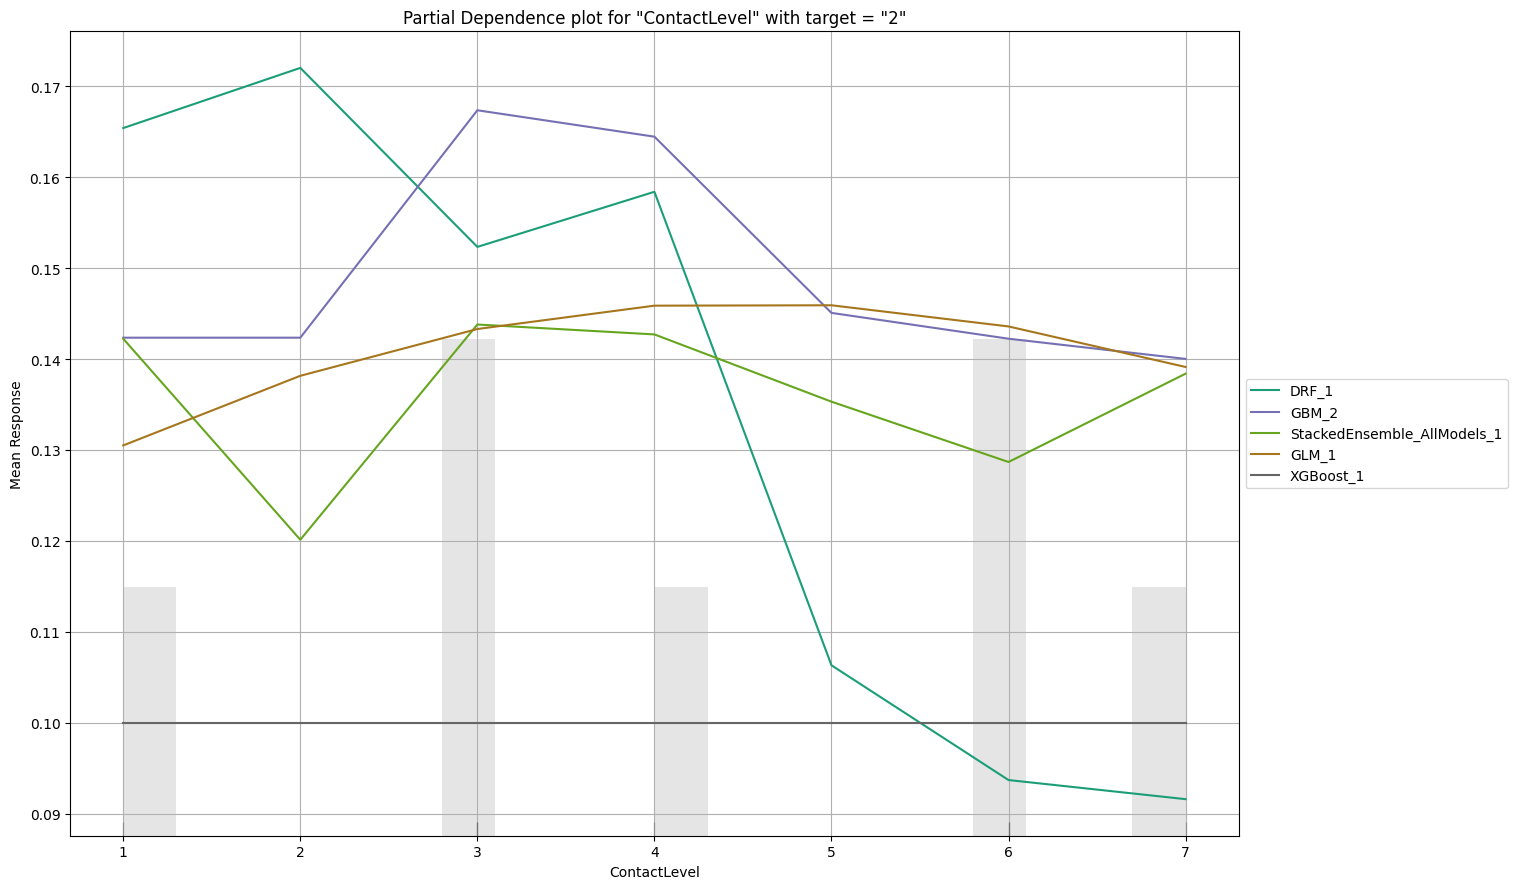

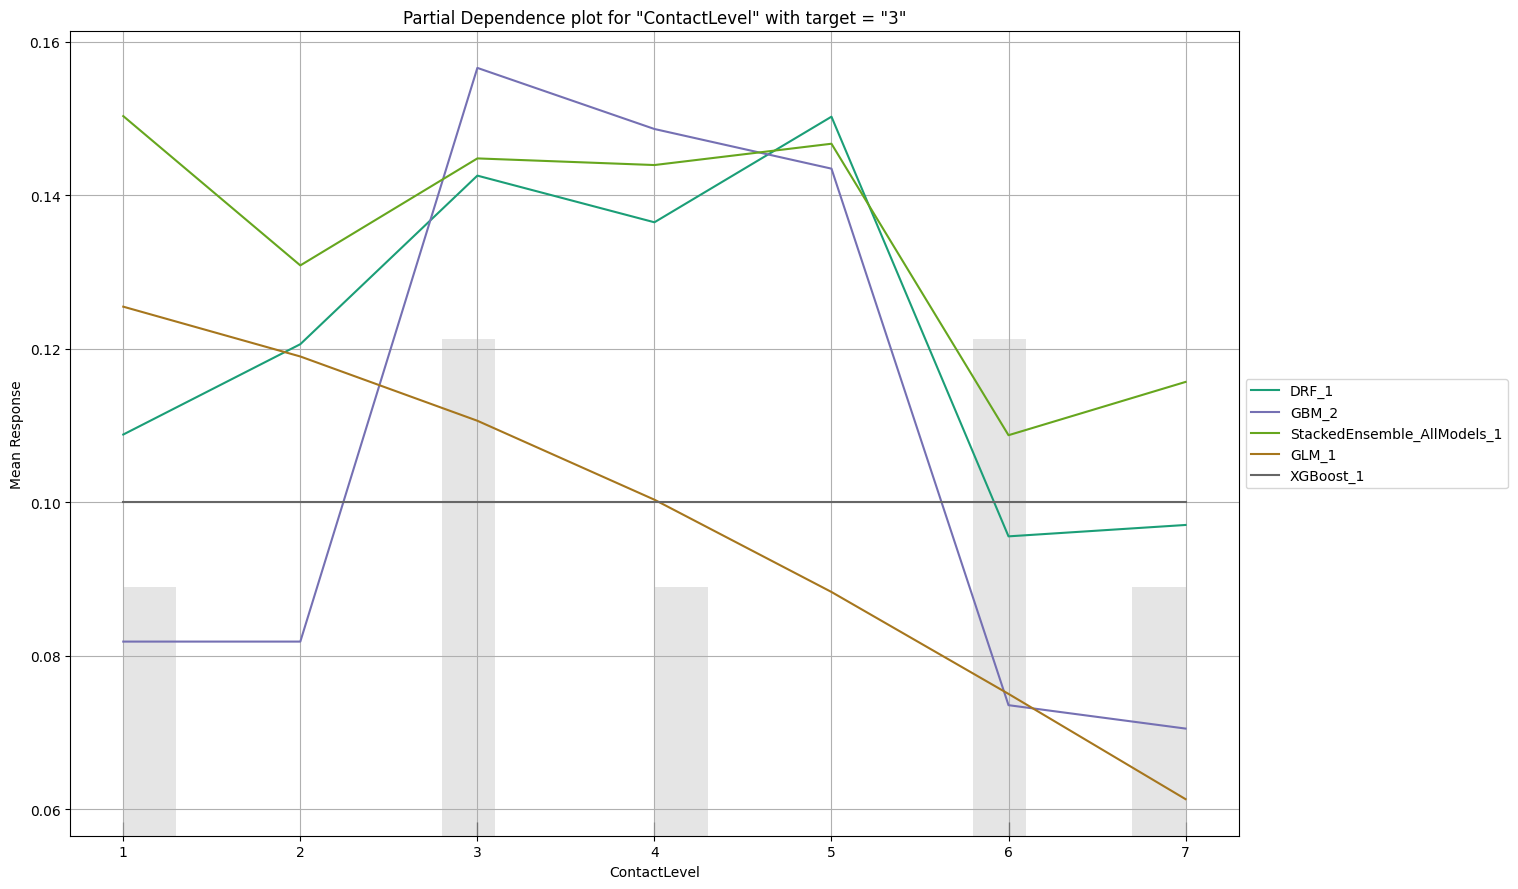

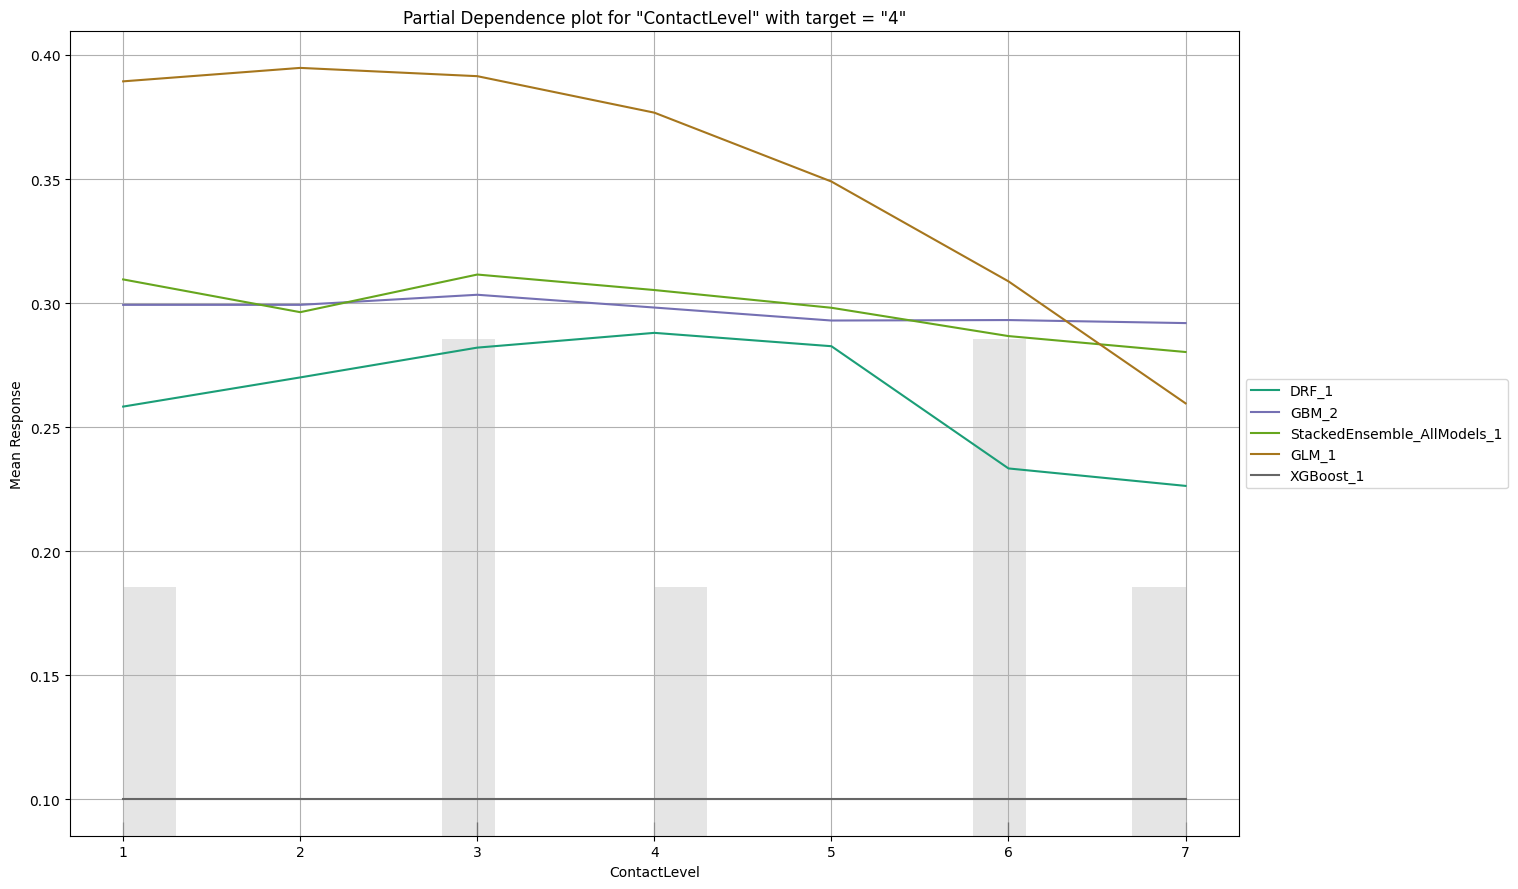

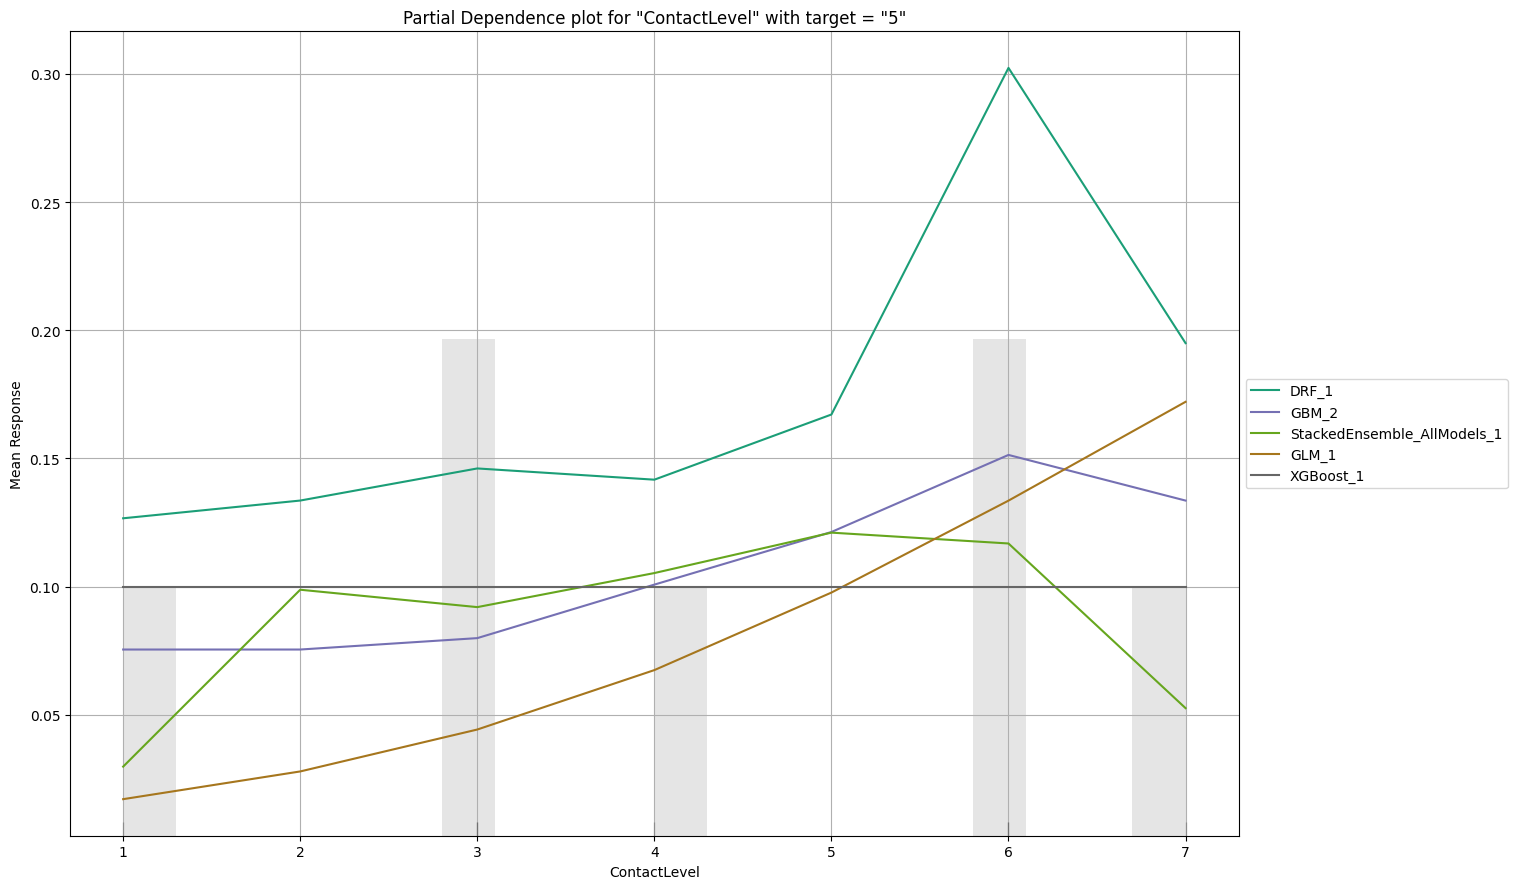

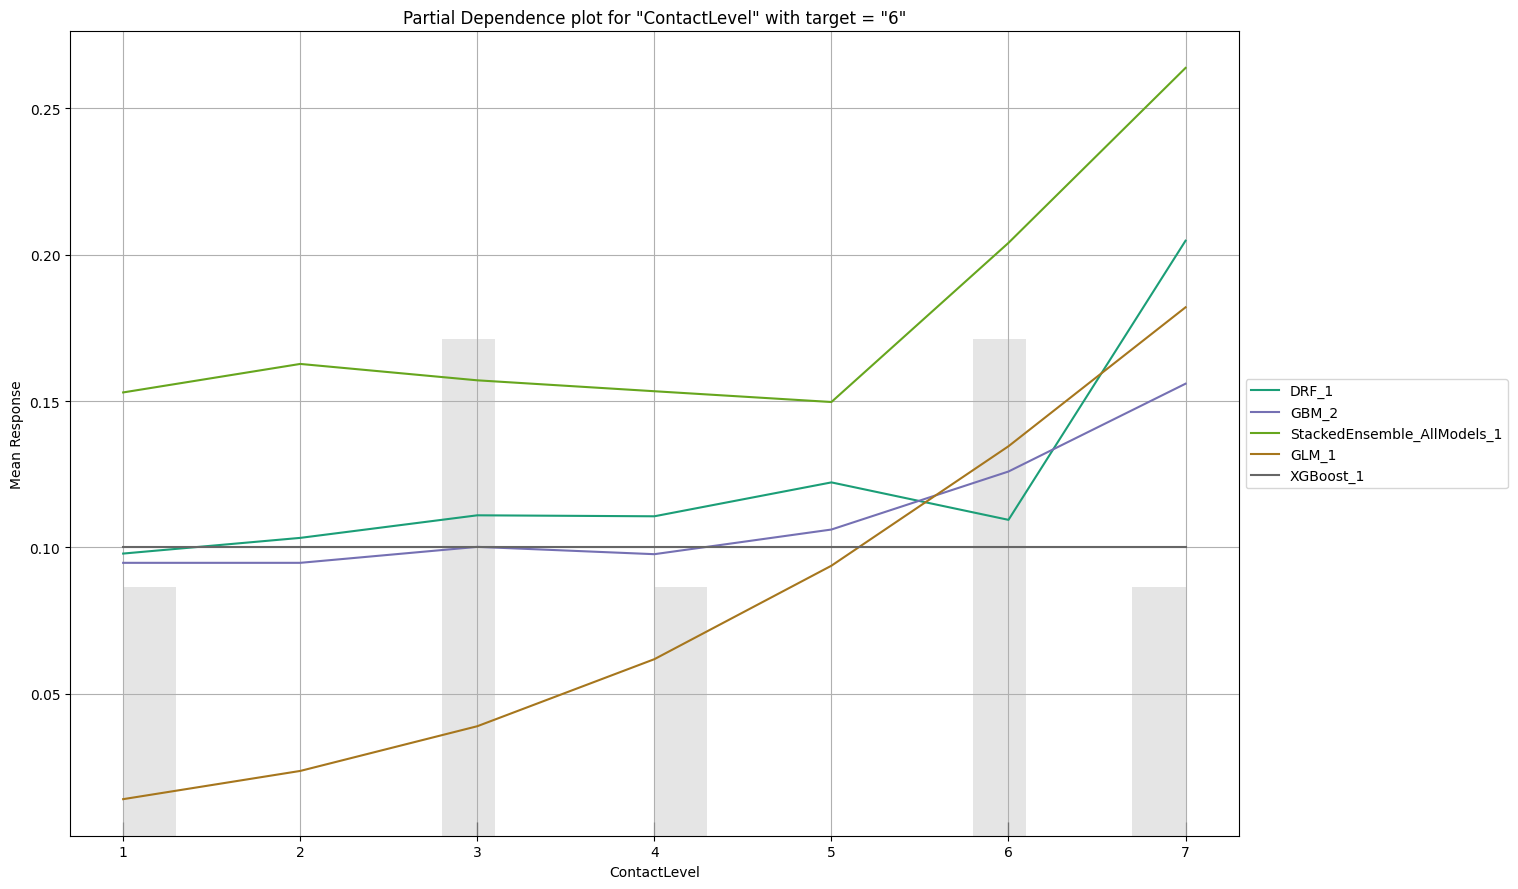

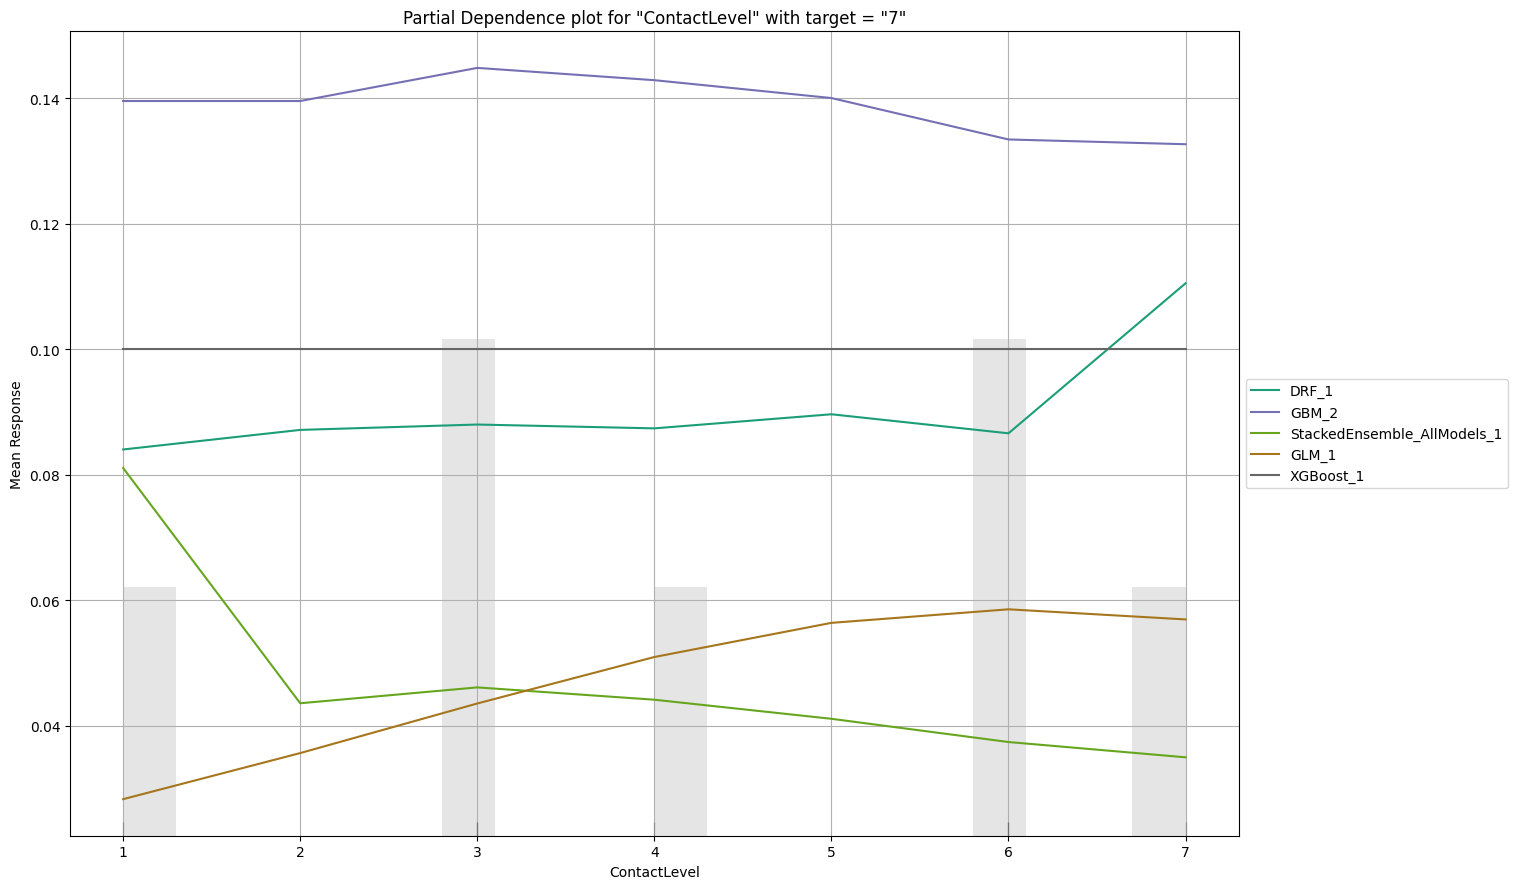

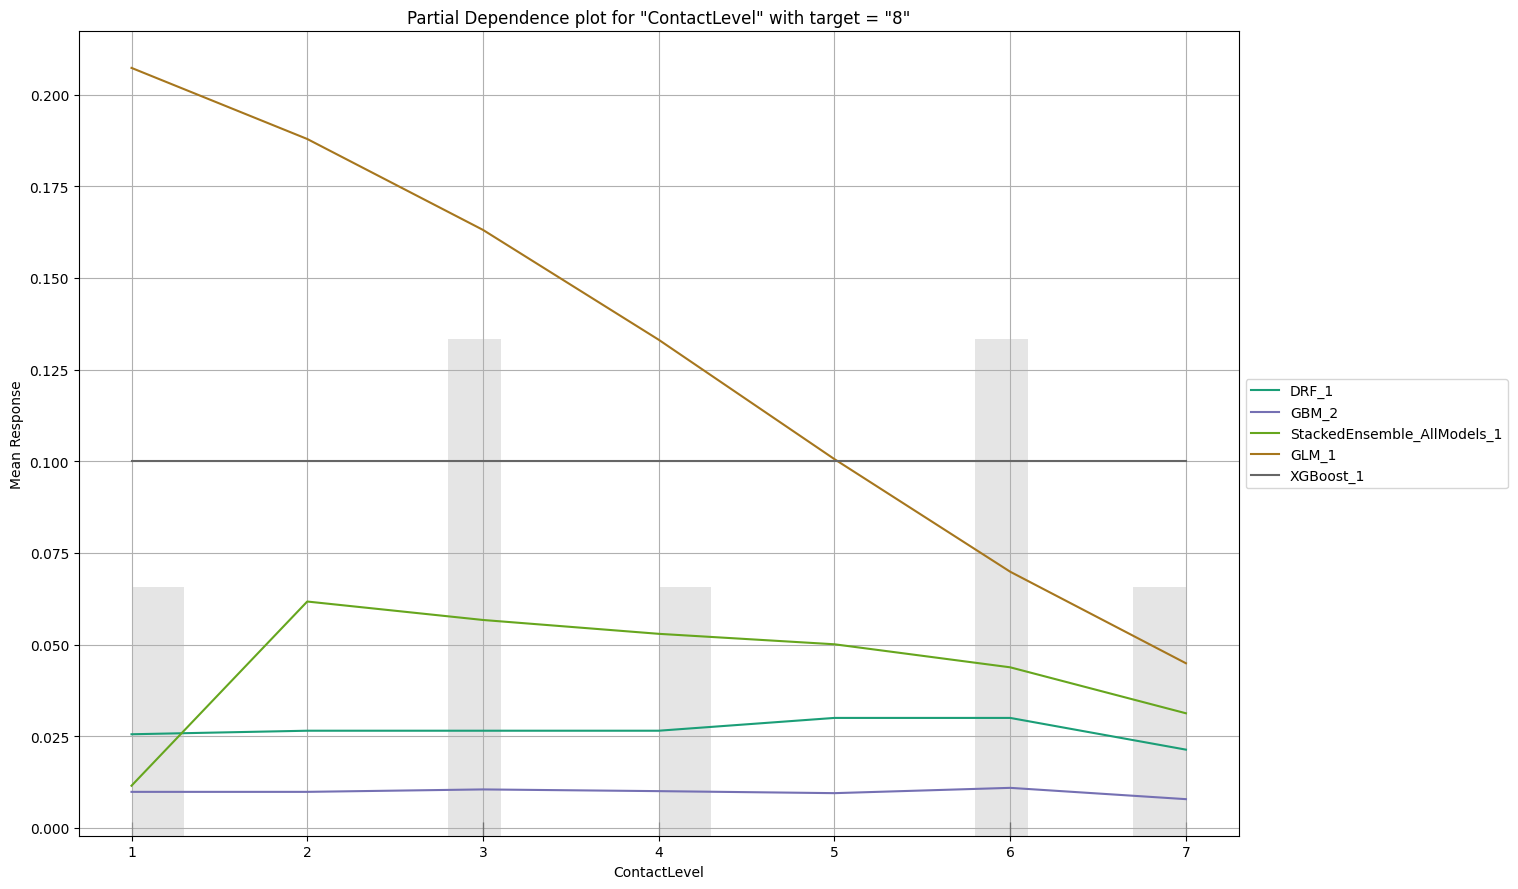

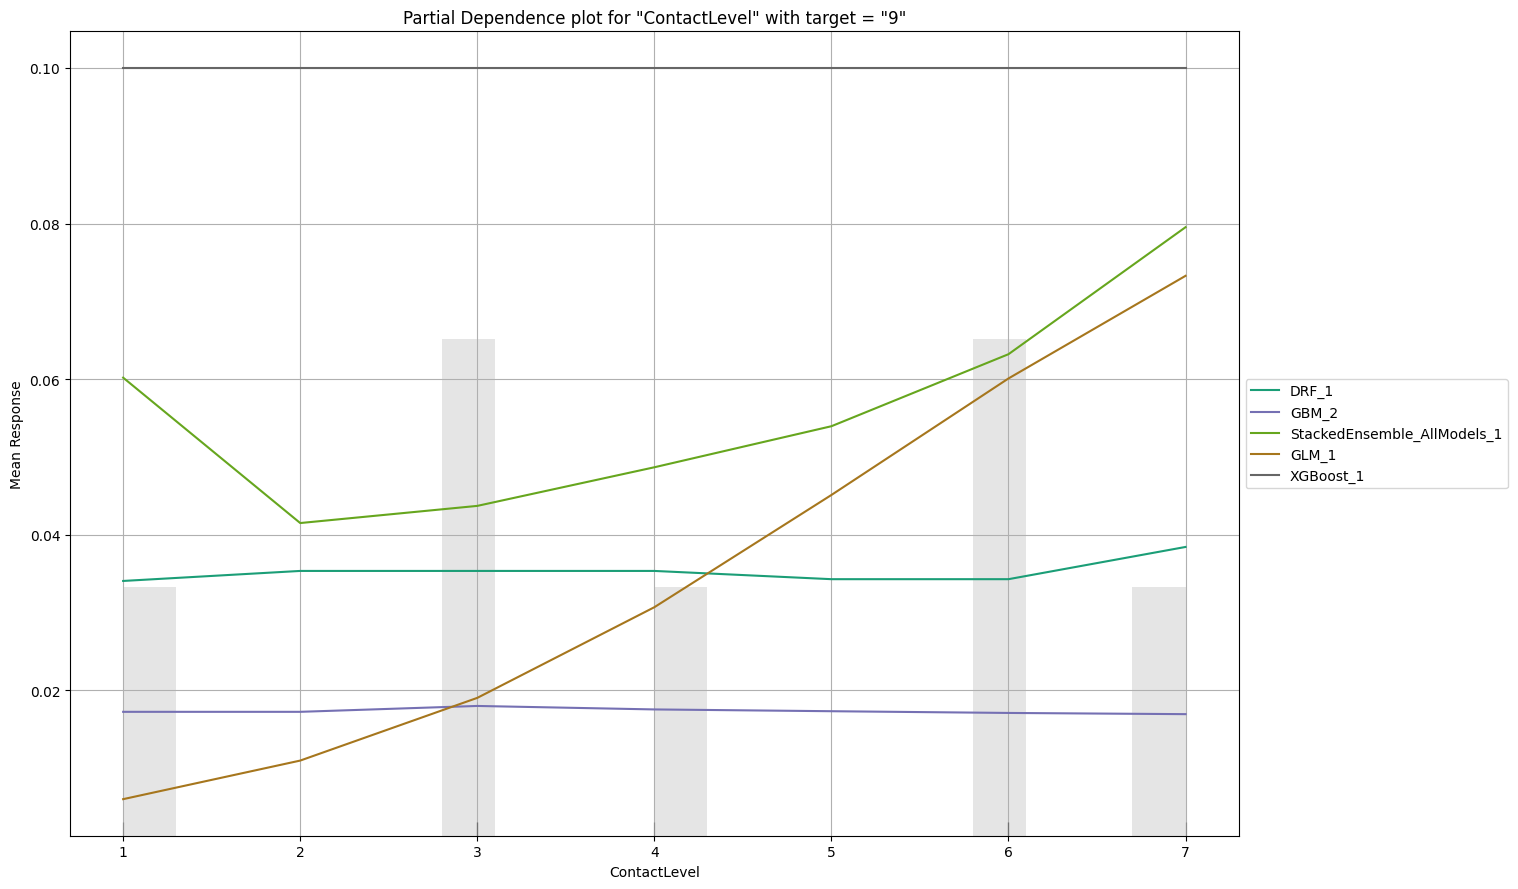

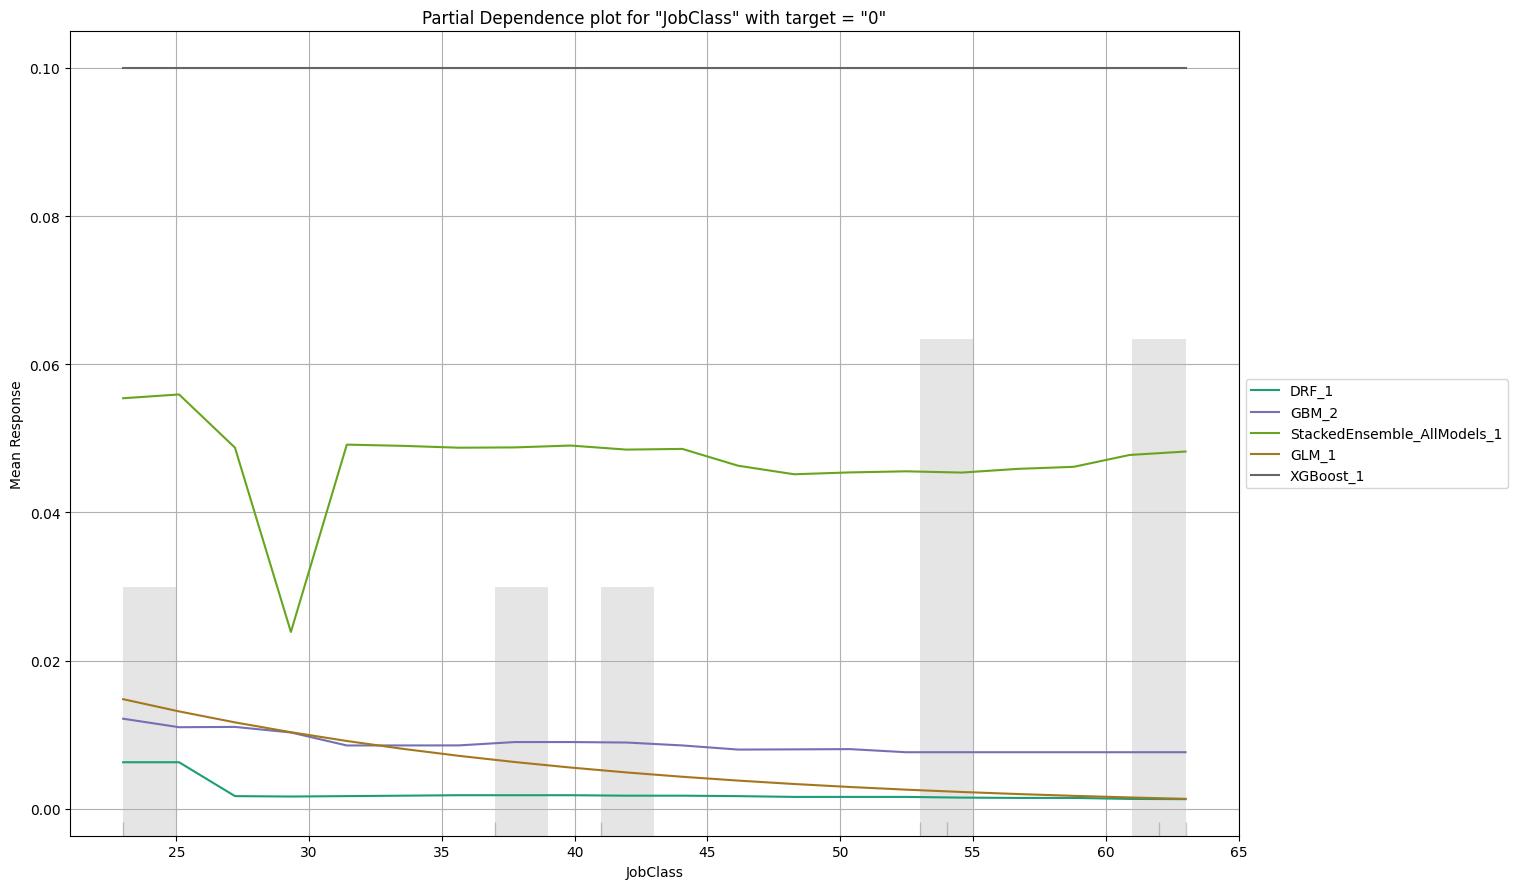

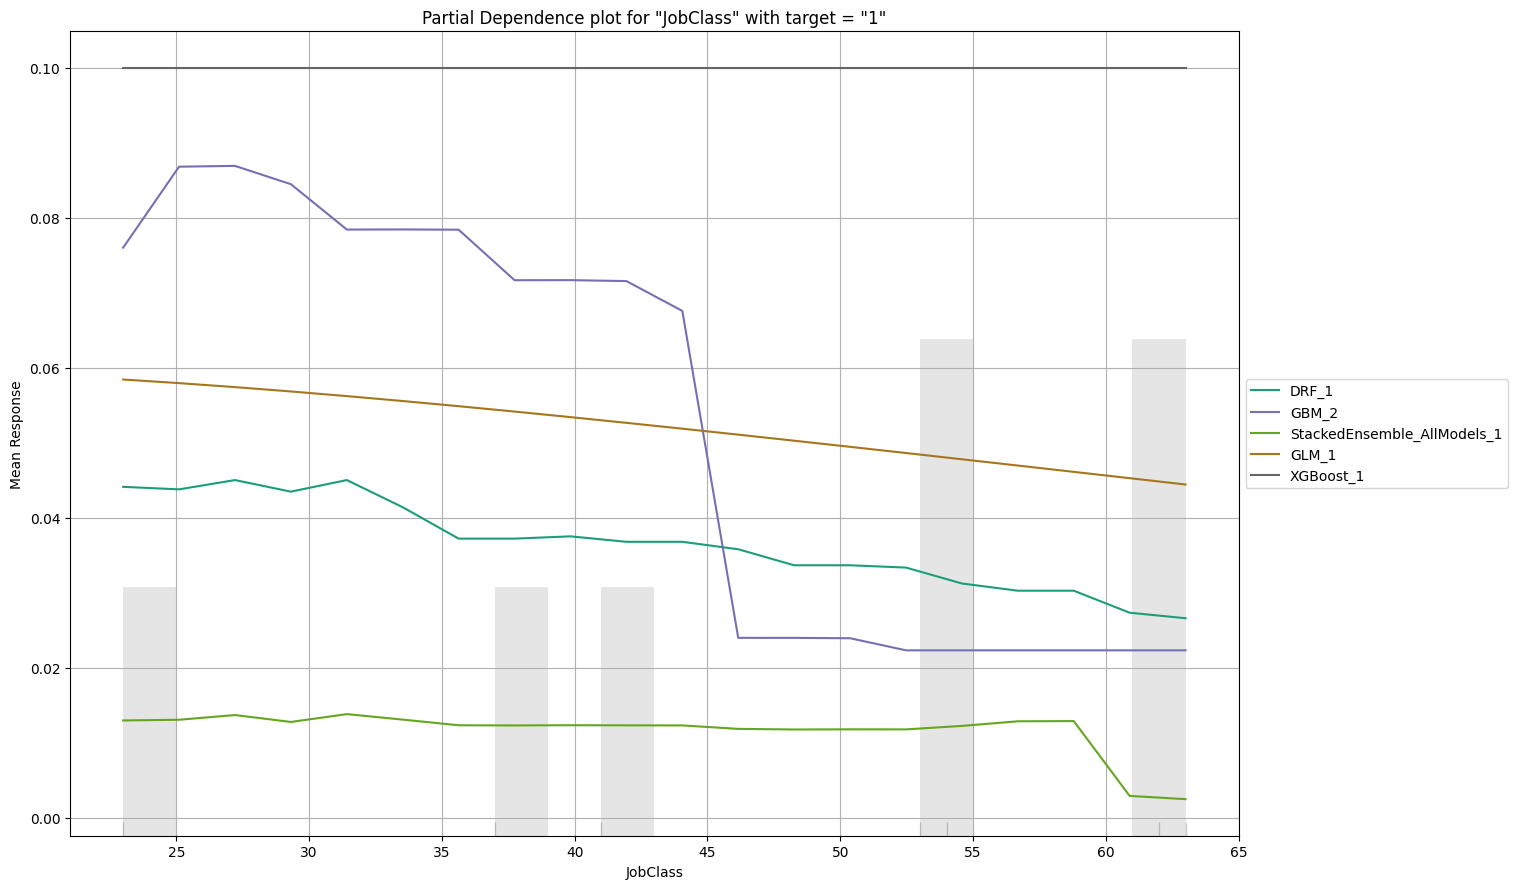

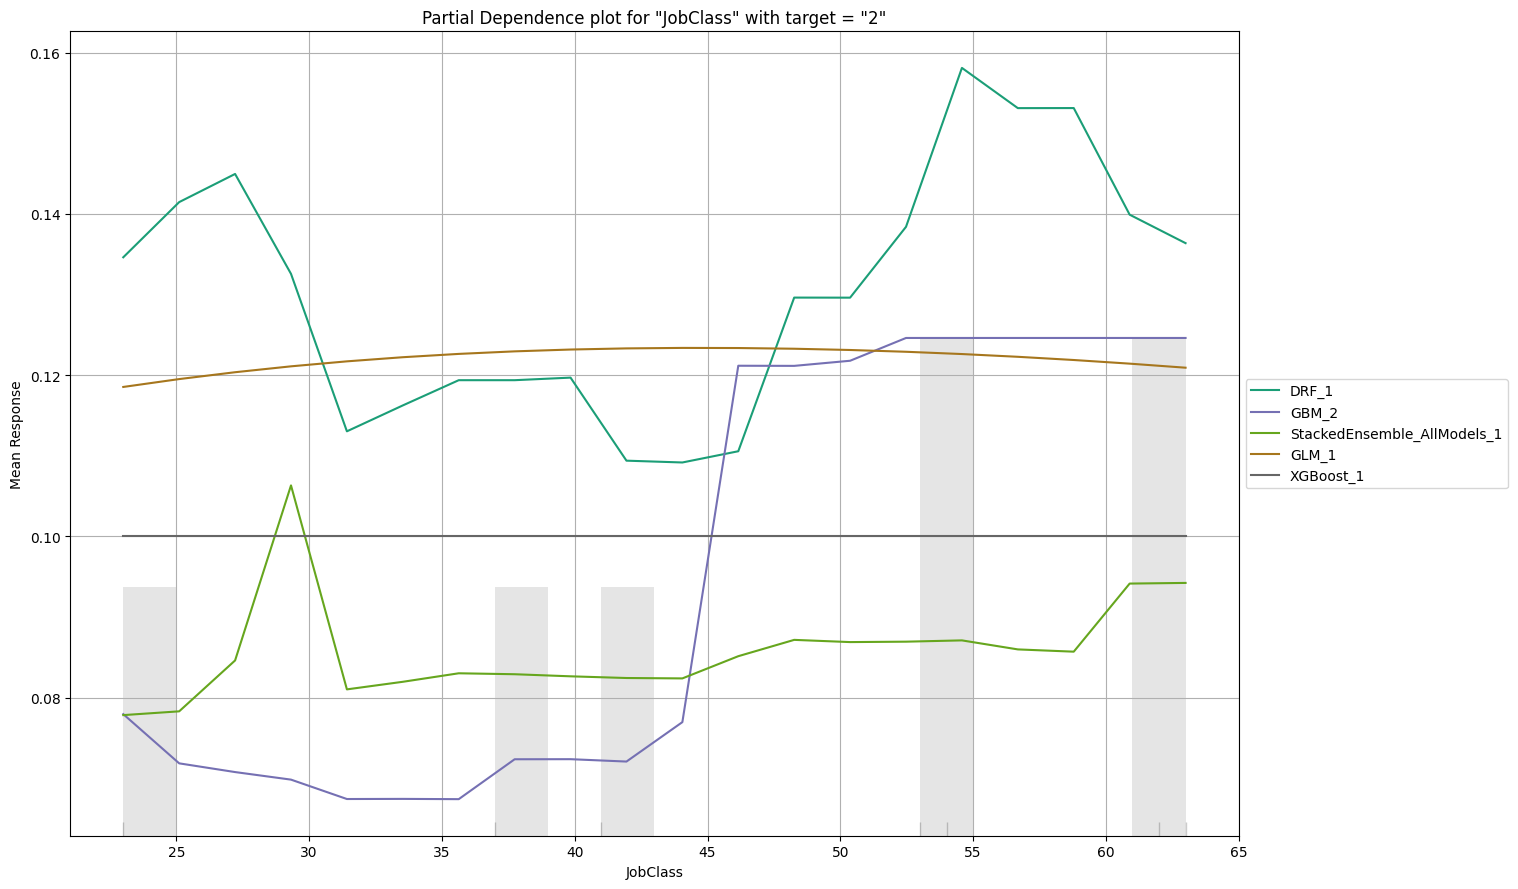

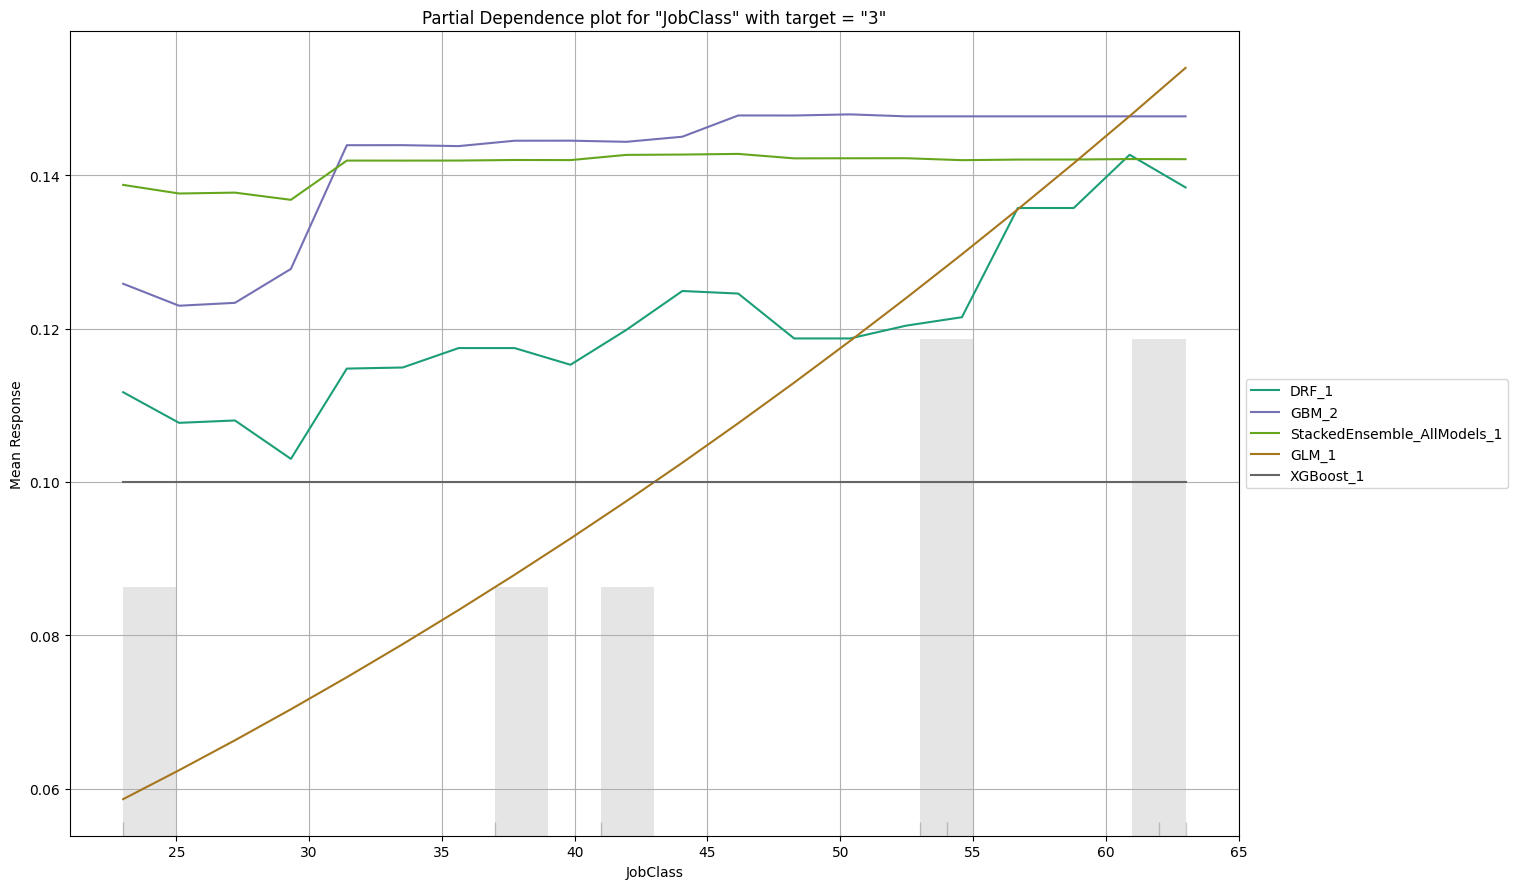

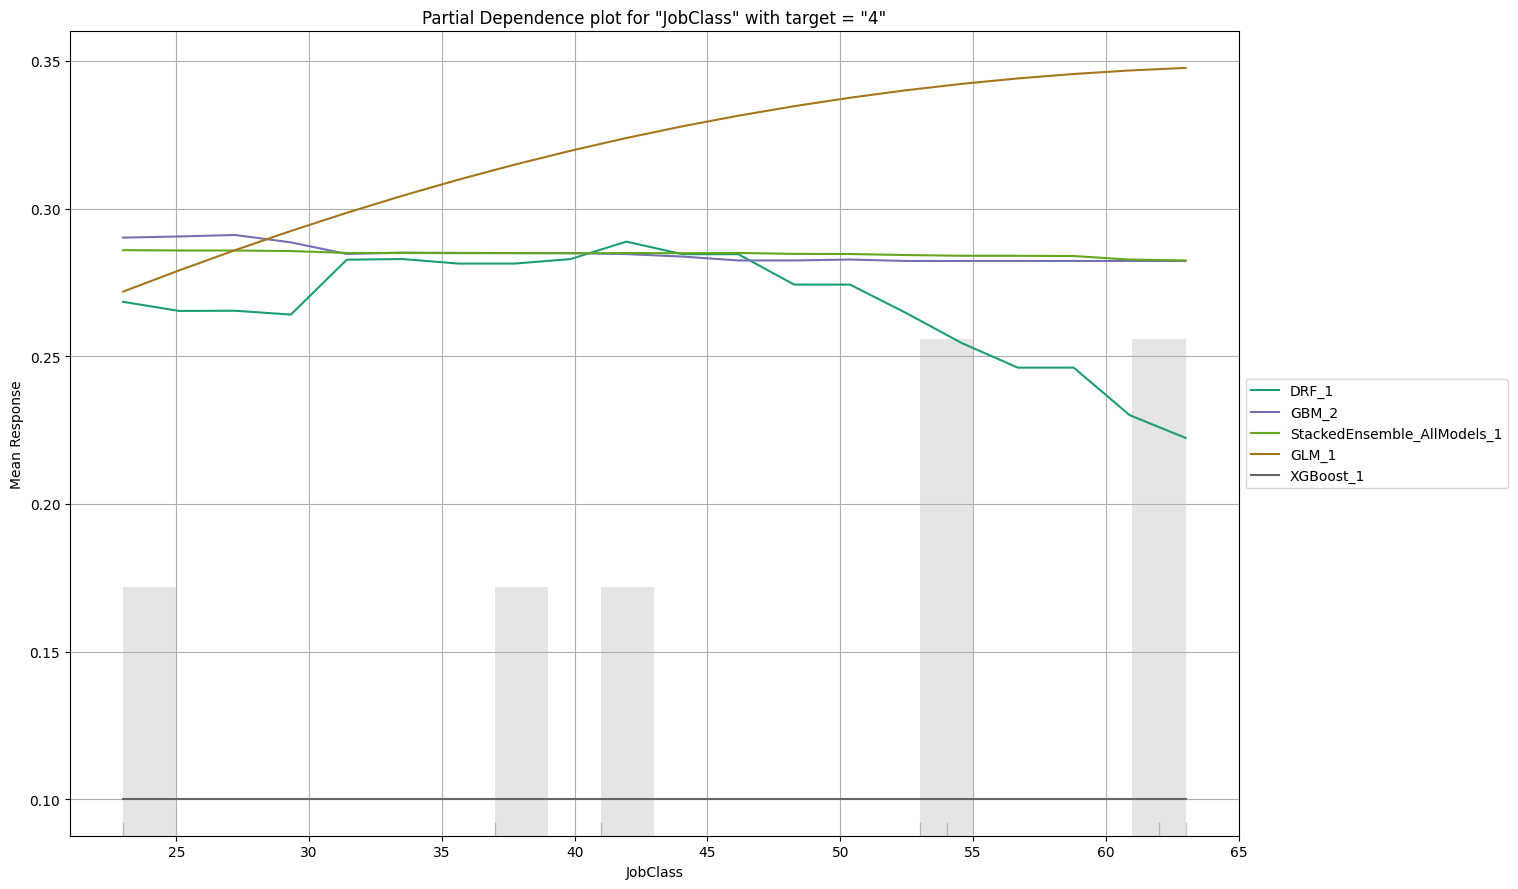

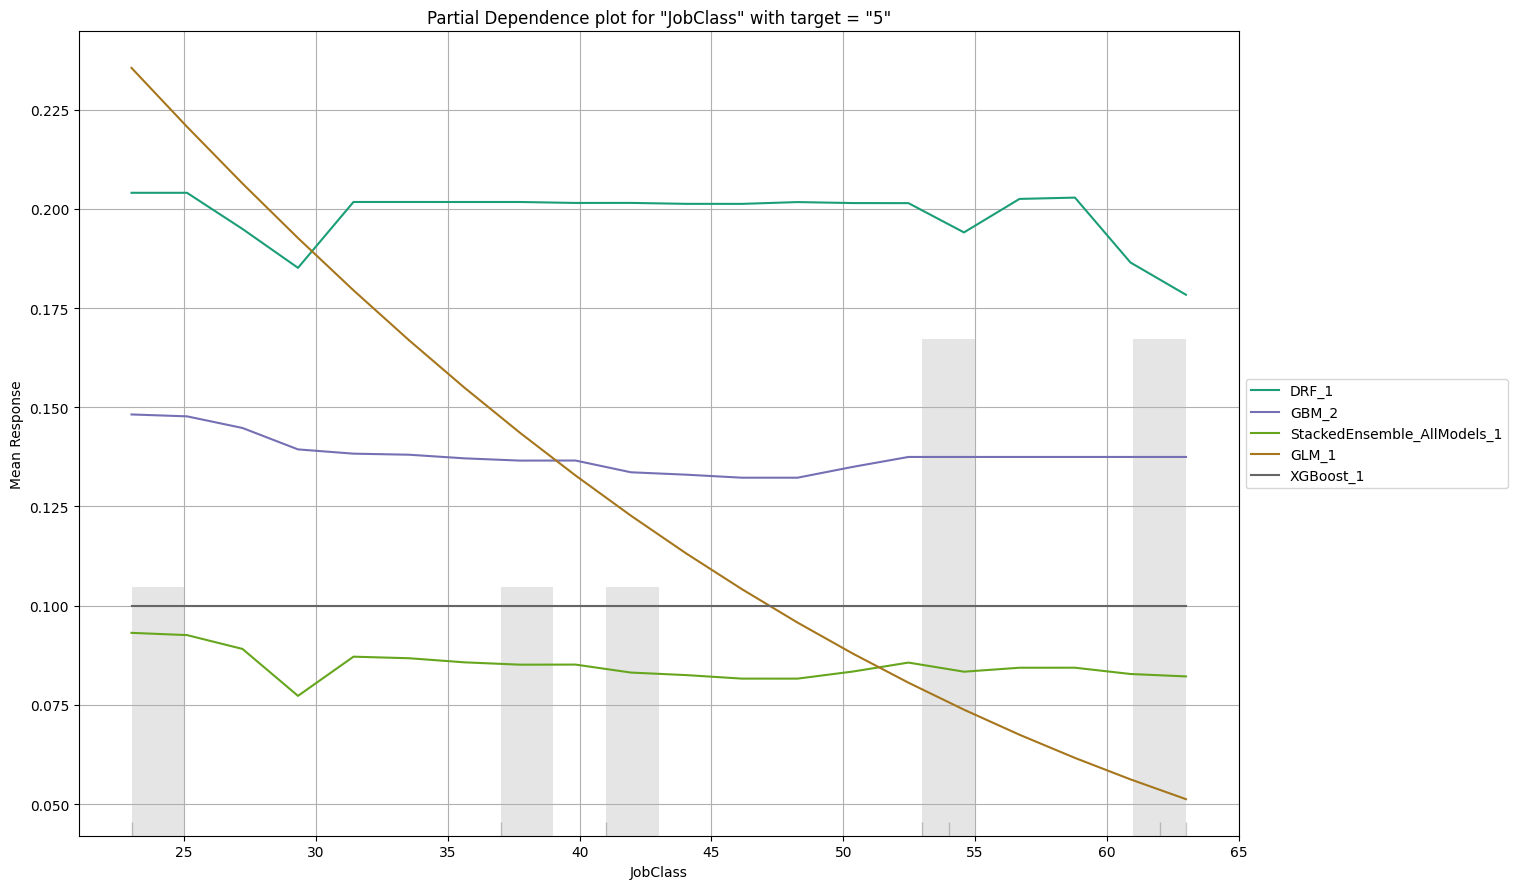

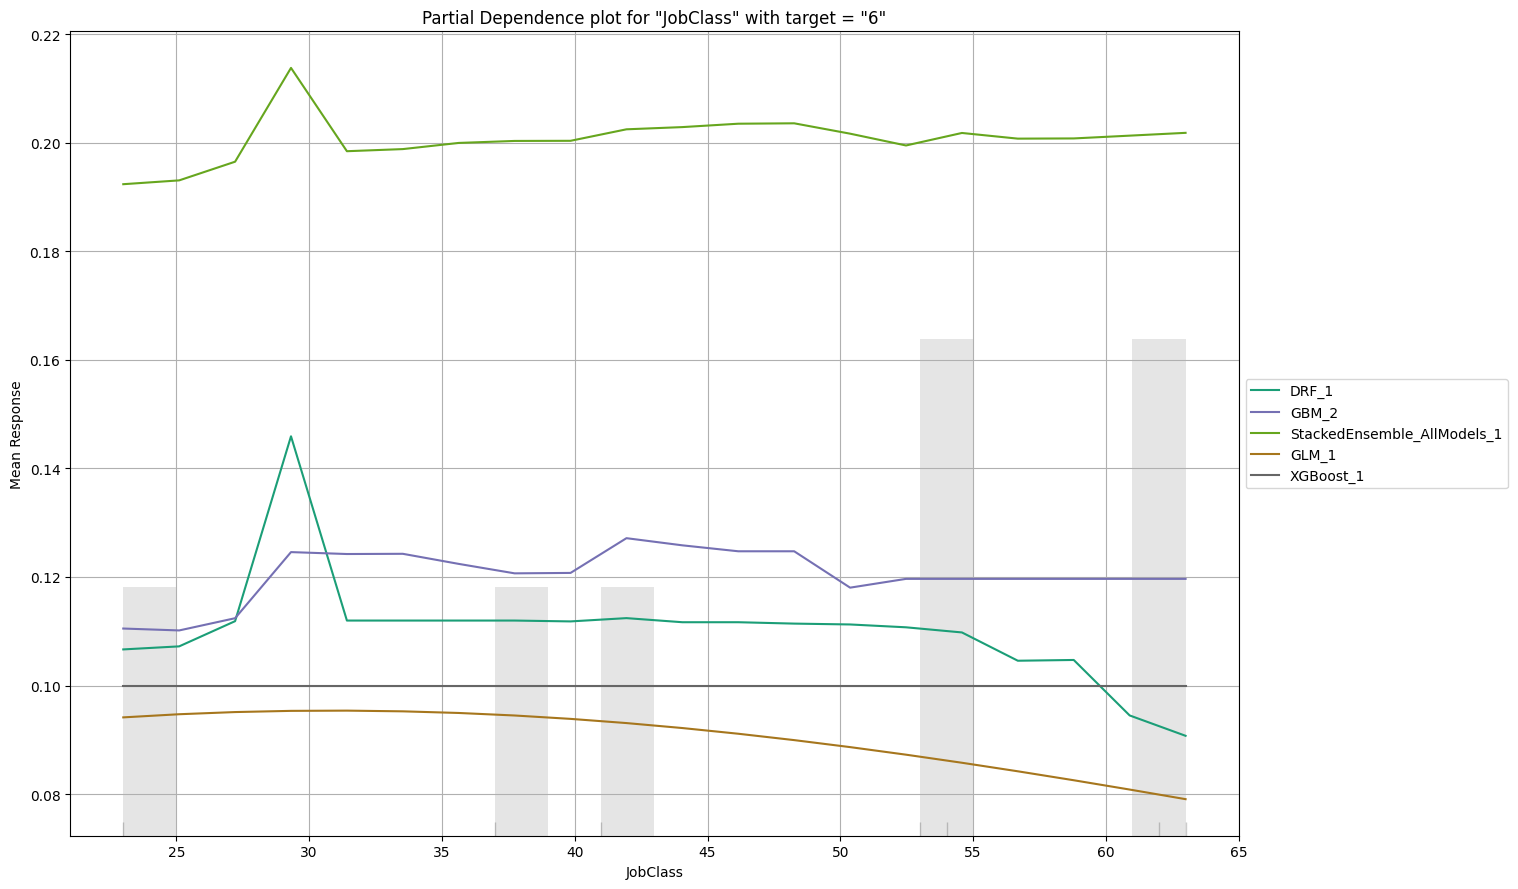

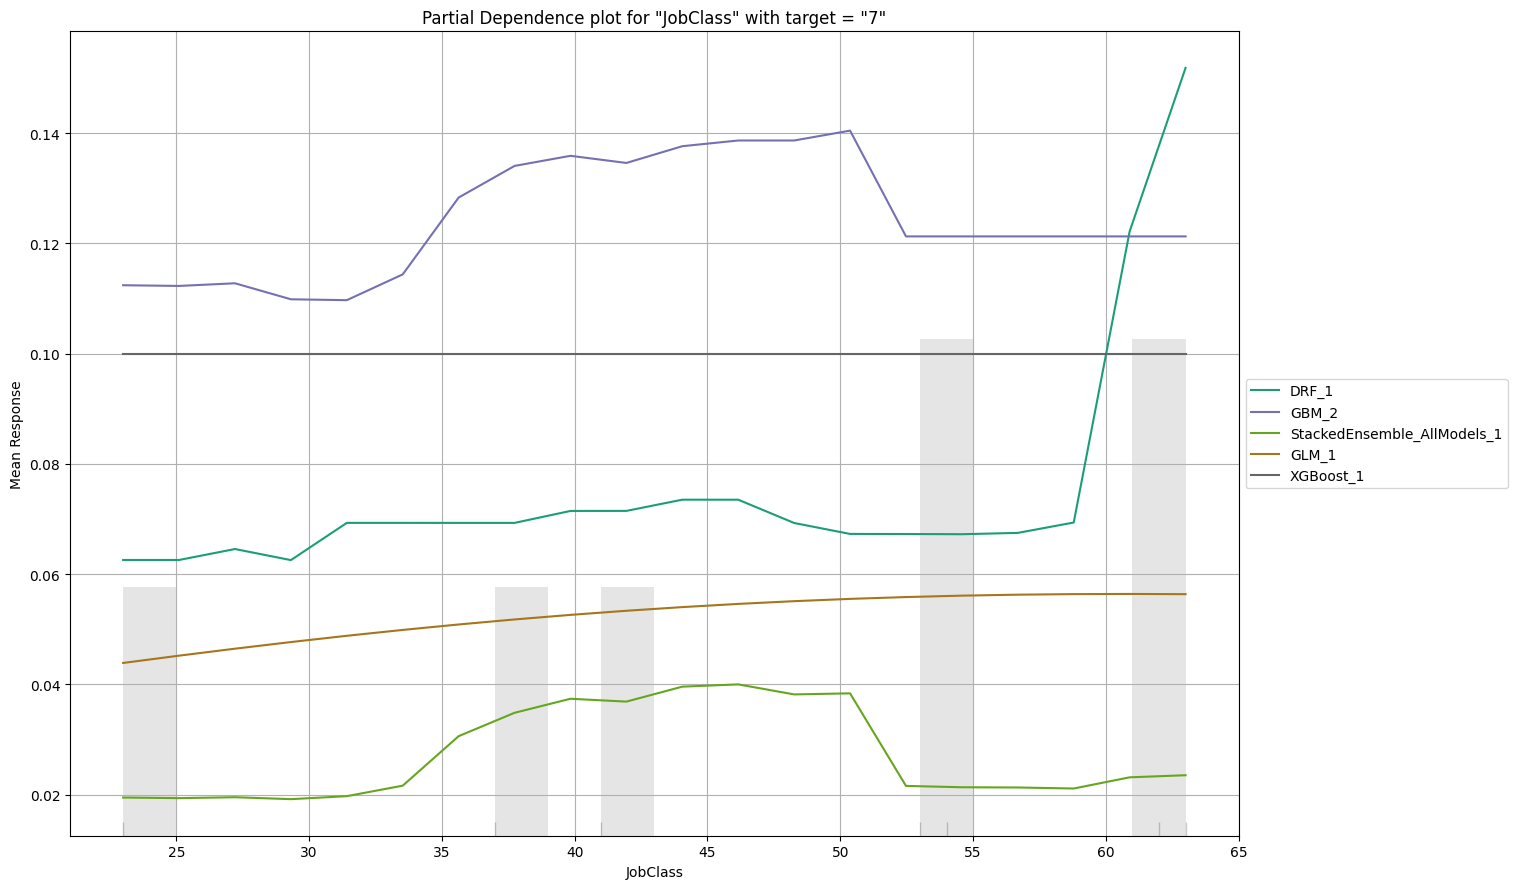

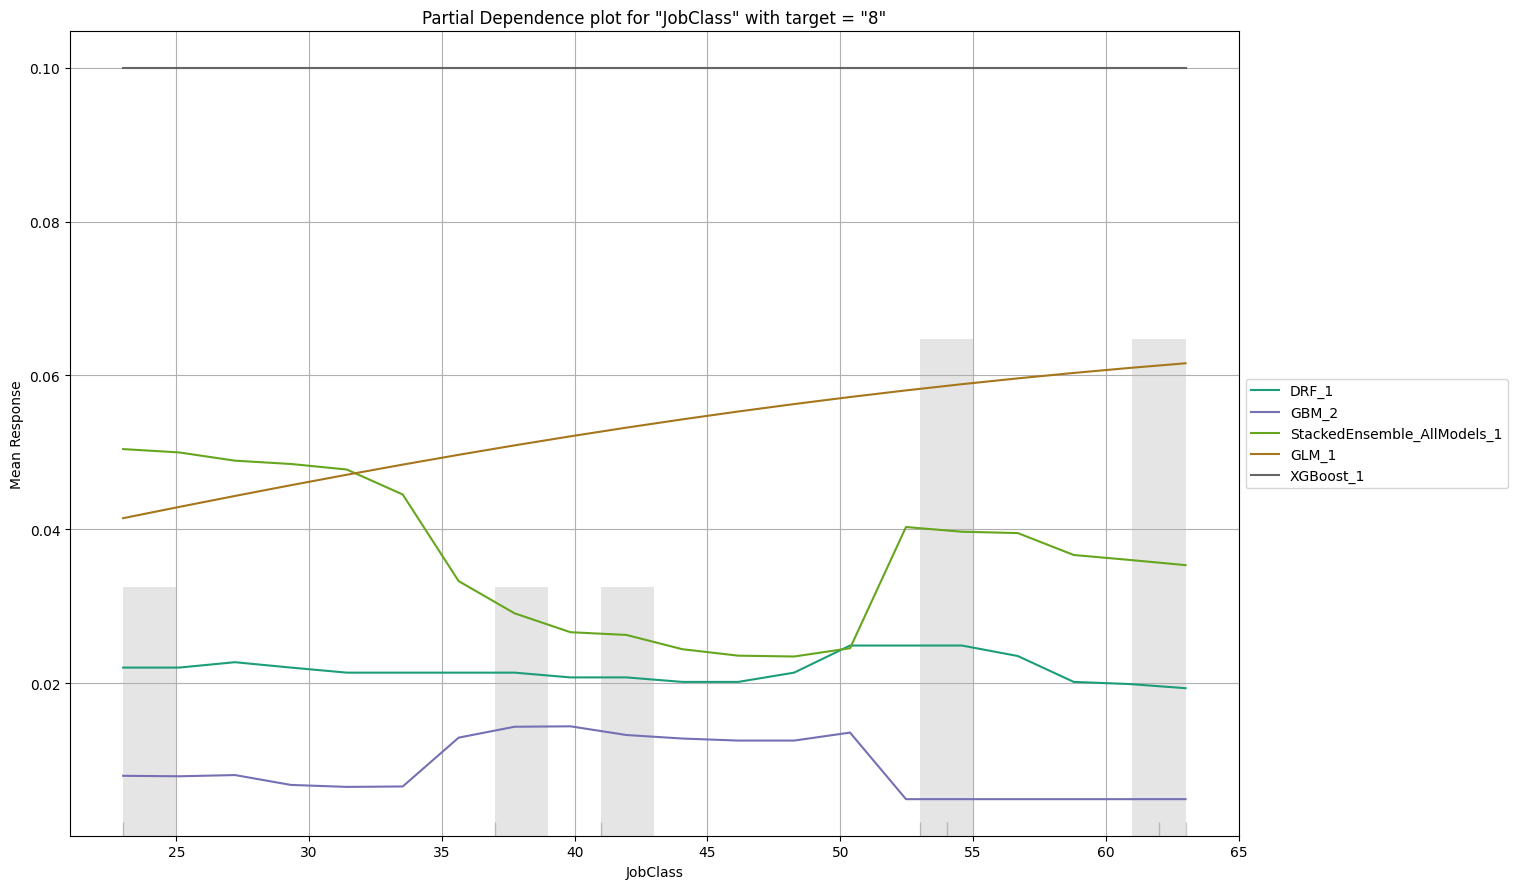

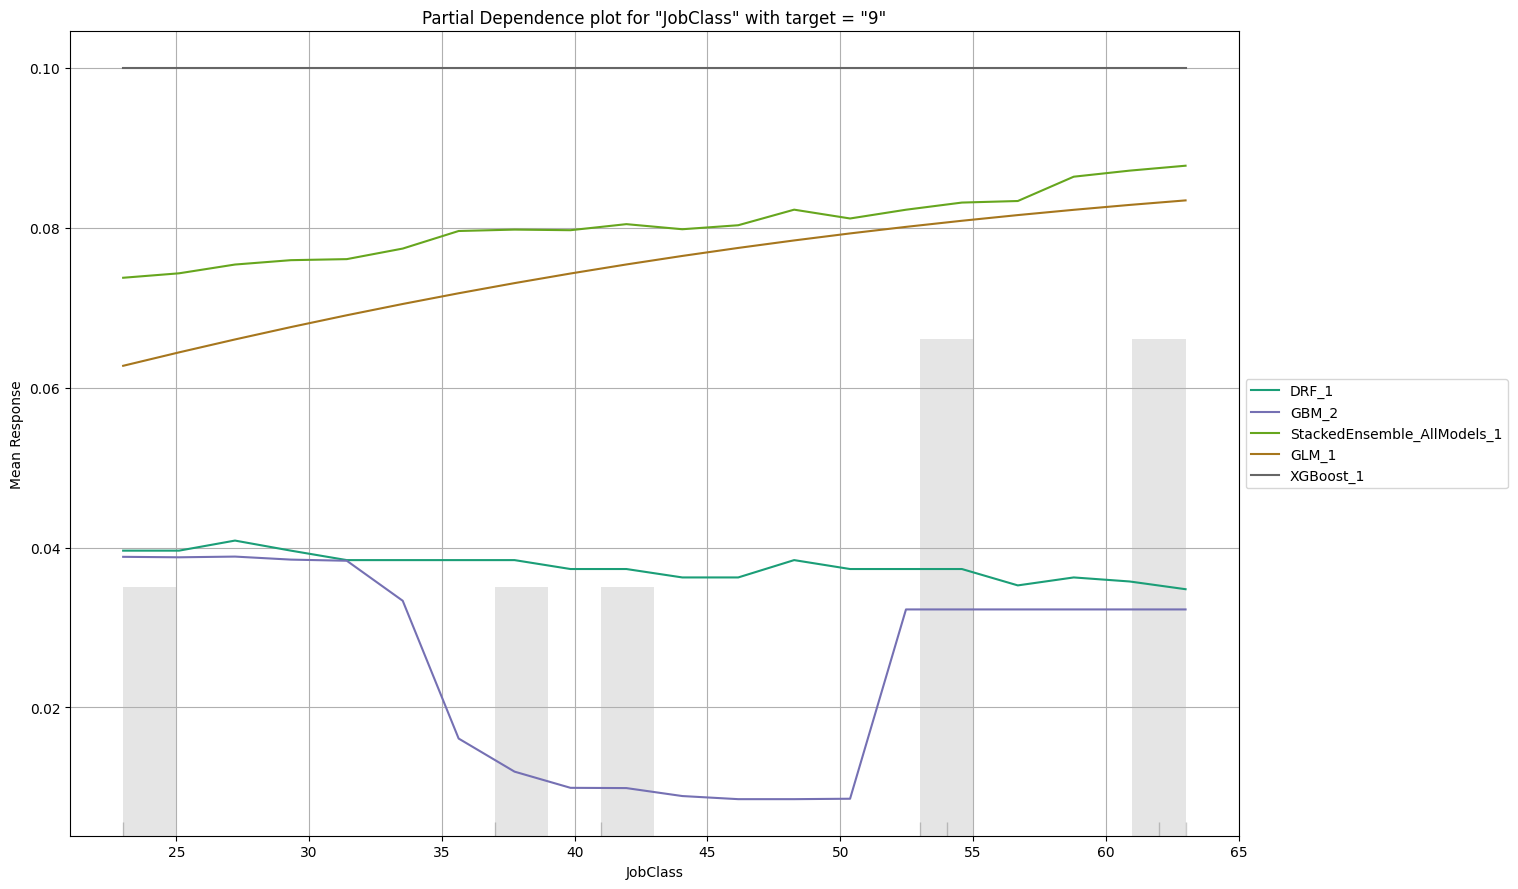

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   mean_per_class_error    logloss      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  ----------------------  ---------  --------  ---------  ------------------  -------------------------  ---------------
DRF_1_AutoML_1_20230825_200324                                              0     0.400007  0.342901  0.117581                  264                   0.262529  DRF
GBM_2_AutoML_1_20230825_200324                                              0     0.14569   0.149472  0.0223419                 730                   0.51039   GBM
StackedEnsemble_AllModels_1_AutoML_1_20230825_200324                        0.1   0.380012  0.368107  0.135503                15963                   6.91161   StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20230825_200324                     0.1   0.383766  0.36664   0.134425                18450                   1.91828   StackedEnsemble
GLM_1_AutoML_1_20230825_200324                                              0.4   1.28231   0.674959  0.45557                  1161                   0.110517  GLM
XGBoost_2_AutoML_1_20230825_200324                                          0.5   1.9606    0.820766  0.673657                  464                   0.154581  XGBoost
XGBoost_1_AutoML_1_20230825_200324                                          0.5   2.30259   0.9       0.81                     1018                   0.152027  XGBoost
[7 rows x 8 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_1_AutoML_1_20230825_200324

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1    2    3    4    5    6    7    8    9    Error    Rate
---  ---  ---  ---  ---  ---  ---  ---  ---  ---  -------  ------
0    0    0    0    0    0    0    0    0    0    nan      0 / 0
0    0    0    0    0    0    0    0    0    0    nan      0 / 0
0    0    1    0    0    0    0    0    0    0    0        0 / 1
0    0    0    1    0    0    0    0    0    0    0        0 / 1
0    0    0    0    2    0    0    0    0    0    0        0 / 2
0    0    0    0    0    1    0    0    0    0    0        0 / 1
0    0    0    0    0    0    1    0    0    0    0        0 / 1
0    0    0    0    0    0    0    1    0    0    0        0 / 1
0    0    0    0    0    0    0    0    0    0    nan      0 / 0
0    0    0    0    0    0    0    0    0    0    nan      0 / 0
0    0    1    1    2    1    1    1    0    0    0        0 / 7

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [ ]:
# explain the model
model.explain(test)

In [ ]:
# import the libraries
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF,ConstantKernel, DotProduct, Matern,ExpSineSquared
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, log_loss,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score as ras
from sklearn.model_selection import learning_curve

In [ ]:

x = encoded_df.drop('PG', axis=1).values
y = encoded_df['PG'].values

In [ ]:
from sklearn import preprocessing
SS = preprocessing.StandardScaler()
# standardise the feature column
x = SS.fit_transform(x)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Gaussian Process Classifier using constant kernel
kernel = 1.0 * ConstantKernel()
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Train the Gaussian Process Classifier
gpc.fit(x_train, y_train)

# Make predictions on the test set
predictions = gpc.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
precision_macro = precision_score(y_test, predictions, average='macro')
recall_macro = recall_score(y_test, predictions, average='macro')
f1_macro = f1_score(y_test, predictions, average='macro')
conf_matrix = confusion_matrix(y_test, predictions)
# Calculate the log-likelihood
y_probs = gpc.predict_proba(x_test)
#log_likelihood = log_loss(y_test, y_probs)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Accuracy: 0.2857142857142857
Precision (Macro-average): 0.03571428571428571
Recall (Macro-average): 0.125
F1-Score (Macro-average): 0.05555555555555556
Confusion Matrix:
[[0 0 0 3 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 4 0 0 0 0]
 [0 0 0 2 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0]]


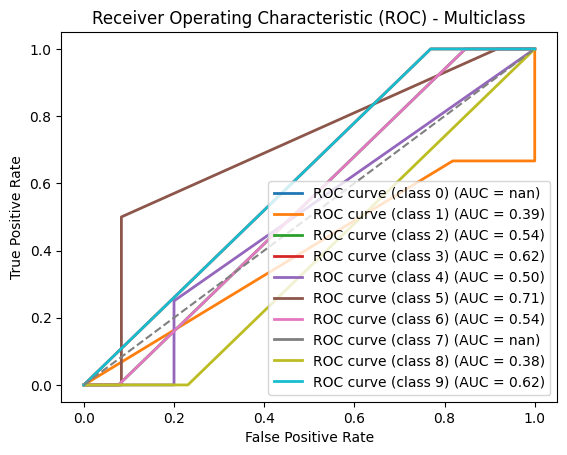

In [ ]:
# Calculate ROC curve and AUC for each class (one-vs-all)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision (Macro-average): {precision_macro}")
print(f"Recall (Macro-average): {recall_macro}")
print(f"F1-Score (Macro-average): {f1_macro}")
#print(f"Negative Log-Likelihood: {log_likelihood}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class %d) (AUC = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multiclass')
plt.legend(loc='lower right')
plt.show()